# Classification
*implemetaion of these Algorthm of classification Full Model*

*   **XGBboost**
*   **Logistic Regression**
*   **SVM**
*   **K nearest neighbors**
*   **MLP**

*implemetaion of these Algorthm of classification PCA,LDA,SFS and BE feature decomposition Model*

*   **XGBboost**
*   **Logistic Regression**
*   **SVM**
*   **K nearest neighbors**

*Ensemble all classification methods*


In [1]:
 !pip install xgboost -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 5.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [2]:
#importing libraries
from google.colab import drive
import pandas as pd # import pandas library
import numpy as np # import numpy library
import matplotlib.pyplot as plt # import matplotlib library
import seaborn as sns # import seaborn library
import os
import librosa
import math
import json 
import random
import librosa.display
import warnings
from IPython.display import Audio 
from IPython.core.display import display
import matplotlib.gridspec as gridspec
import sklearn
import numpy as np
#Library for Working with model 
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from itertools import product
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm
from tensorflow.keras import optimizers
from keras.utils.vis_utils import plot_model
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from sklearn import preprocessing
from xgboost import XGBClassifier
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,plot_confusion_matrix
from  sklearn.ensemble import  AdaBoostClassifier

In [3]:
def predictProba(clf, x_train,y_train,x_test,y_test,display_labels,labels):
    clf.fit(x_train,y_train)
    y_pred_X = clf.predict(x_train)
    conf_mat = confusion_matrix(y_train,y_pred_X)
    plt.figure(figsize = (16, 9))
    plt.title('Confusion Matrix for training set of '+labels)
    sns.heatmap(conf_mat,cmap="BuPu", annot=True, xticklabels = display_labels, yticklabels = display_labels )
    plt.show()
    print('training set accuracy for '+ labels+f': {accuracy_score(y_train,y_pred_X)}')
    print("Classification Metrics for training set of "+ labels)
    print(classification_report(y_train, y_pred_X, digits=3))
    print("=====================================================")
    y_pred_X = clf.predict(x_test)
    conf_mat = confusion_matrix(y_test,y_pred_X)
    plt.figure(figsize = (16, 9))
    plt.title('Confusion Matrix for'+labels)
    sns.heatmap(conf_mat,cmap="BuPu", annot=True, xticklabels = display_labels, yticklabels = display_labels )
    plt.show()
    print('training set accuracy for '+ labels+f': {accuracy_score(y_test,y_pred_X)}')
    print("Classification Metrics for testing set of "+ labels)
    print(classification_report(y_test, y_pred_X, digits=3))
    print("=====================================================")

In [4]:
def ROC_plot(clf,x_train,y_train,x_test,y_test,display_labels,ax = None):
  clf.fit(x_train,y_train)
  ROC_plot = ROCAUC(clf, classes = display_labels ,ax = ax)

  ROC_plot.fit(x_train,y_train)        # Fit the training data to the visualizer
  ROC_plot.score(x_test,y_test)       # Evaluate the model on the test data
  ROC_plot.finalize()
  return ROC_plot.draw()

In [6]:
Dastagh_names=['Shour', 'Segah','Mahoor','Homayoun','Rast Panjgah','Nava','Chargah']

### load datasets

In [214]:
!cp -r /content/drive/MyDrive/FinalDF /content

#### Dataset

In [215]:
li = []
all_files=['/content/FinalDF/chroma_stft.csv','/content/FinalDF/rms.csv',
           '/content/FinalDF/zerocrossing.csv','/content/FinalDF/mfcc.csv','/content/FinalDF/labels.csv']
for filename in all_files:
    df = pd.read_csv(filename,index_col=[0])
    df = df.reset_index(drop=True)
    li.append(df)


Dataset = pd.concat(li, axis=1)

In [216]:
Labels = Dataset['Dastgah']
ploting_df=Dataset[['Dastgah','Instrument']]
Dataset = Dataset.drop('Dastgah',axis = 1)

ploting_df['Dastgah'].replace([0, 1,2,3,4,5,6], ['Shour', 'Segah','Mahoor','Homayoun','Rast Panjgah','Nava','Chargah'], inplace=True)
ploting_df['Instrument'].replace([0, 1,2,3,4,5],['Tar','Kamanche','Santoor','Setar','Ney','Combinative'], inplace=True)

In [217]:
# Normalizing data
x = Dataset.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
Normalized_Dataset = pd.DataFrame(x_scaled)

#### spectrum

In [218]:
li = []
all_files=['/content/FinalDF/magnitude_spectrum.csv','/content/FinalDF/labels.csv']
for filename in all_files:
    df = pd.read_csv(filename,index_col=[0])
    df = df.reset_index(drop=True)
    li.append(df)


Dataset_spectrum = pd.concat(li, axis=1)

In [219]:
ploting_df=Dataset_spectrum[['Dastgah','Instrument']]
Dataset_spectrum = Dataset_spectrum.drop('Dastgah',axis = 1)

ploting_df['Dastgah'].replace([0, 1,2,3,4,5,6], ['Shour', 'Segah','Mahoor','Homayoun','Rast Panjgah','Nava','Chargah'], inplace=True)
ploting_df['Instrument'].replace([0, 1,2,3,4,5],['Tar','Kamanche','Santoor','Setar','Ney','Combinative'], inplace=True)

In [220]:
x = Dataset_spectrum.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
Normalized_Dataset_spectrum = pd.DataFrame(x_scaled)

#### load dataset of PCA

In [221]:
li = []
all_files=['/content/FinalDF/PCA_dataset_80_70.csv']
for filename in all_files:
    df = pd.read_csv(filename,index_col=[0])
    df = df.reset_index(drop=True)
    li.append(df)


PCA_Dataset = pd.concat(li, axis=1)

In [222]:
li = []
all_files=['/content/FinalDF/PCA_dataset_spectrum_3077_300.csv']
for filename in all_files:
    df = pd.read_csv(filename,index_col=[0])
    df = df.reset_index(drop=True)
    li.append(df)


PCA_Dataset_spectrum = pd.concat(li, axis=1)

#### load dataset of LDA

In [223]:
li = []
all_files=['/content/FinalDF/LDA_dataset.csv']
for filename in all_files:
    df = pd.read_csv(filename,index_col=[0])
    df = df.reset_index(drop=True)
    li.append(df)


LDA_Dataset = pd.concat(li, axis=1)

In [224]:
li = []
all_files=['/content/FinalDF/LDA_dataset_spectrum.csv']
for filename in all_files:
    df = pd.read_csv(filename,index_col=[0])
    df = df.reset_index(drop=True)
    li.append(df)


LDA_Dataset_spectrum = pd.concat(li, axis=1)

#### split DATAs

##### Dateset

###### Normalize 

In [225]:
input_Normal_train, input_Normal_test, target_Normal_train, target_Normal_test = train_test_split(Normalized_Dataset.values, Labels.values, test_size=0.3,random_state=42)

###### unNormalize

In [226]:
input_train, input_test, target_train, target_test = train_test_split(Dataset.values, Labels.values, test_size=0.3,random_state=42)

##### dataset spectrum

###### Normalize

In [227]:
input_spectrum_Normal_train, input_spectrum_Normal_test, target_spectrum_Normal_train, target_spectrum_Normal_test = train_test_split(Normalized_Dataset_spectrum.values, Labels.values, test_size=0.3)

###### unNormalize

In [228]:
input_spectrum_train, input_spectrum_test, target_spectrum_train, target_spectrum_test = train_test_split(Dataset_spectrum.values, Labels.values, test_size=0.3)

##### PCA_Dataset

In [229]:
input_PCA_train, input_PCA_test, target_PCA_train, target_PCA_test = train_test_split(PCA_Dataset.values, Labels.values, test_size=0.3)

##### PCA_Dataset_spectrum

In [230]:
input_PCA_spectrum_train, input_PCA_spectrum_test, target_PCA_spectrum_train, target_PCA_spectrum_test = train_test_split(PCA_Dataset_spectrum.values, Labels.values, test_size=0.3)

##### LDA_Dataset

In [231]:
input_LDA_train, input_LDA_test, target_LDA_train, target_LDA_test = train_test_split(LDA_Dataset.values, Labels.values, test_size=0.3)

##### LDA_Dataset_spectrum

In [232]:
input_LDA_spectrum_train, input_LDA_spectrum_test, target_LDA_spectrum_train, target_LDA_spectrum_test = train_test_split(LDA_Dataset_spectrum.values, Labels.values, test_size=0.3)

---
### XGBoosted

XGBoost for dataset 80 feature

In [ ]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('XGBoost for normalize and unNomalize Dataset')
model = XGBClassifier(n_estimators=100,eval_metric='merror')
ax1 = ROC_plot(model ,input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model ,input_train, target_train,input_test, target_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model , input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names,labels = 'Normal dataset')
predictProba(model , input_train, target_train,input_test, target_test,display_labels = Dastagh_names,labels = 'UnNormal dataset')

XGboost for spectrum Dataset

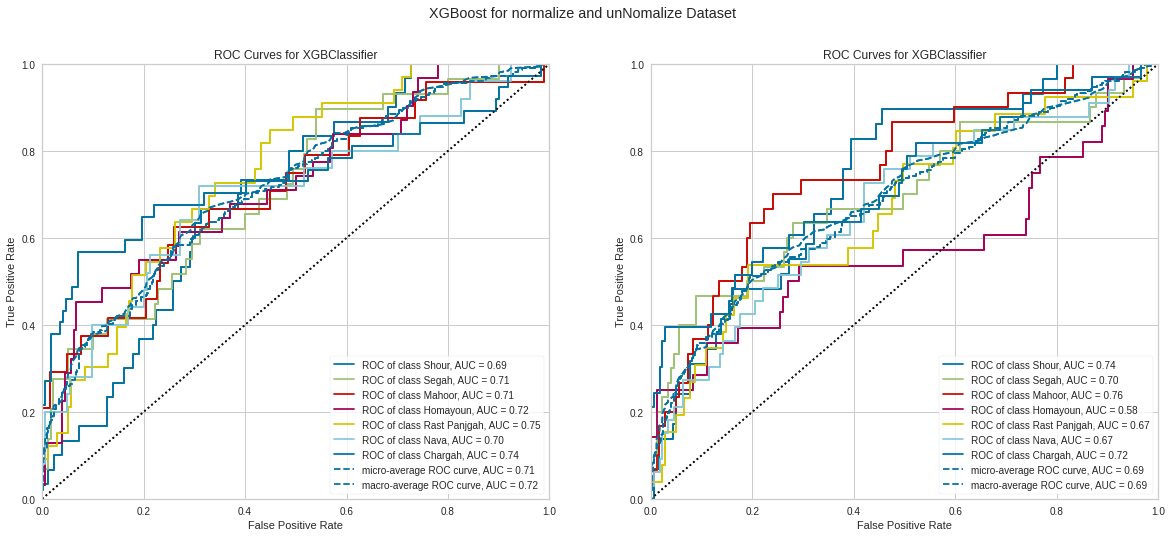

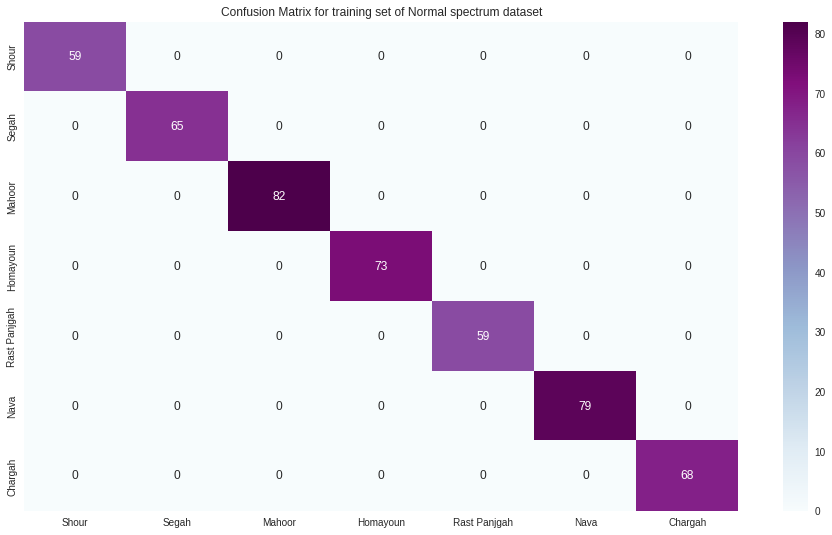

training set accuracy for Normal spectrum dataset: 1.0
Classification Metrics for training set of Normal spectrum dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        59
           1      1.000     1.000     1.000        65
           2      1.000     1.000     1.000        82
           3      1.000     1.000     1.000        73
           4      1.000     1.000     1.000        59
           5      1.000     1.000     1.000        79
           6      1.000     1.000     1.000        68

    accuracy                          1.000       485
   macro avg      1.000     1.000     1.000       485
weighted avg      1.000     1.000     1.000       485



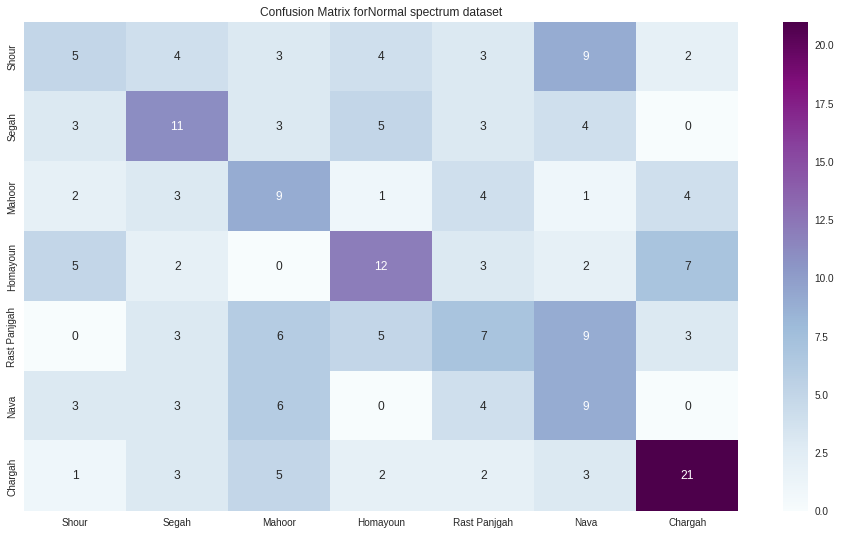

training set accuracy for Normal spectrum dataset: 0.35406698564593303
Classification Metrics for testing set of Normal spectrum dataset
              precision    recall  f1-score   support

           0      0.263     0.167     0.204        30
           1      0.379     0.379     0.379        29
           2      0.281     0.375     0.321        24
           3      0.414     0.387     0.400        31
           4      0.269     0.212     0.237        33
           5      0.243     0.360     0.290        25
           6      0.568     0.568     0.568        37

    accuracy                          0.354       209
   macro avg      0.345     0.350     0.343       209
weighted avg      0.356     0.354     0.351       209



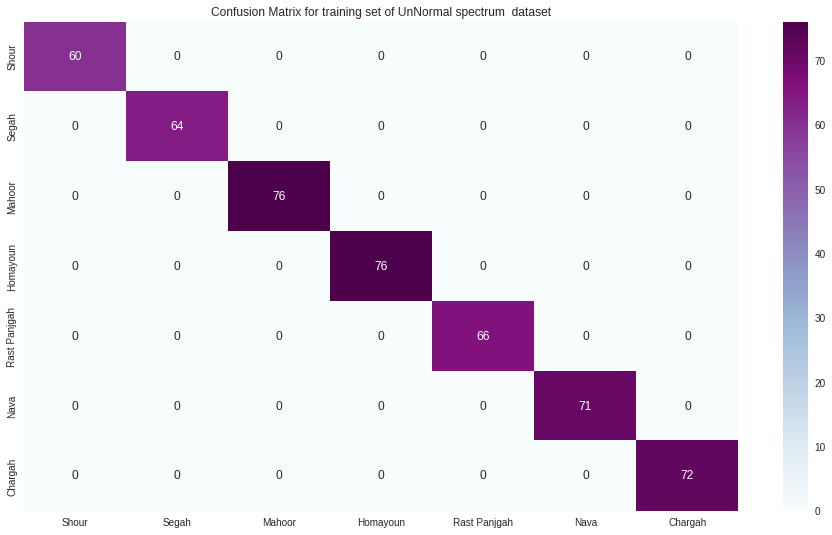

training set accuracy for UnNormal spectrum  dataset: 1.0
Classification Metrics for training set of UnNormal spectrum  dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        60
           1      1.000     1.000     1.000        64
           2      1.000     1.000     1.000        76
           3      1.000     1.000     1.000        76
           4      1.000     1.000     1.000        66
           5      1.000     1.000     1.000        71
           6      1.000     1.000     1.000        72

    accuracy                          1.000       485
   macro avg      1.000     1.000     1.000       485
weighted avg      1.000     1.000     1.000       485



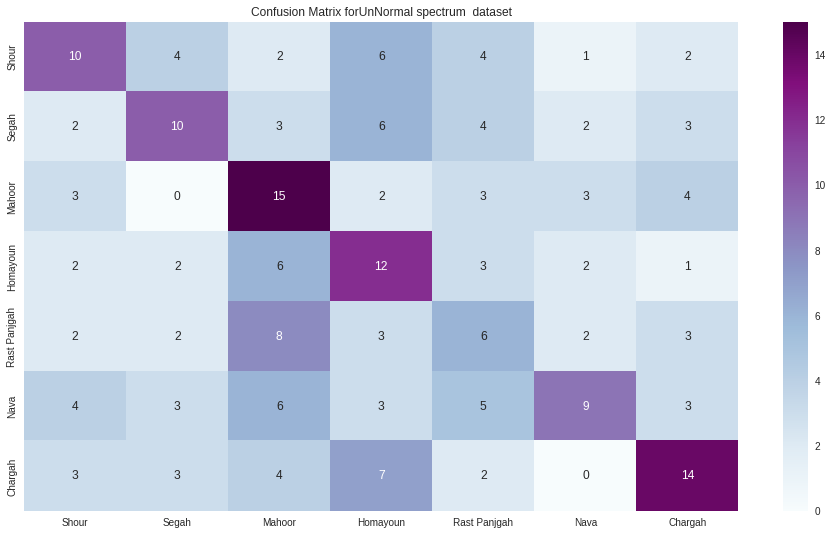

training set accuracy for UnNormal spectrum  dataset: 0.36363636363636365
Classification Metrics for testing set of UnNormal spectrum  dataset
              precision    recall  f1-score   support

           0      0.385     0.345     0.364        29
           1      0.417     0.333     0.370        30
           2      0.341     0.500     0.405        30
           3      0.308     0.429     0.358        28
           4      0.222     0.231     0.226        26
           5      0.474     0.273     0.346        33
           6      0.467     0.424     0.444        33

    accuracy                          0.364       209
   macro avg      0.373     0.362     0.359       209
weighted avg      0.379     0.364     0.363       209



In [63]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('XGBoost for normalize and unNomalize Dataset')
model = XGBClassifier(n_estimators=100,eval_metric='merror')
ax1 = ROC_plot(model,input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model,input_spectrum_Normal_train, target_spectrum_Normal_train,input_spectrum_Normal_test, target_spectrum_Normal_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')
predictProba(model, input_spectrum_Normal_train, target_spectrum_Normal_train,input_spectrum_Normal_test, target_spectrum_Normal_test, display_labels = Dastagh_names,labels = 'UnNormal spectrum  dataset')

### Logestic Regression

LR for dataset 80 feature

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

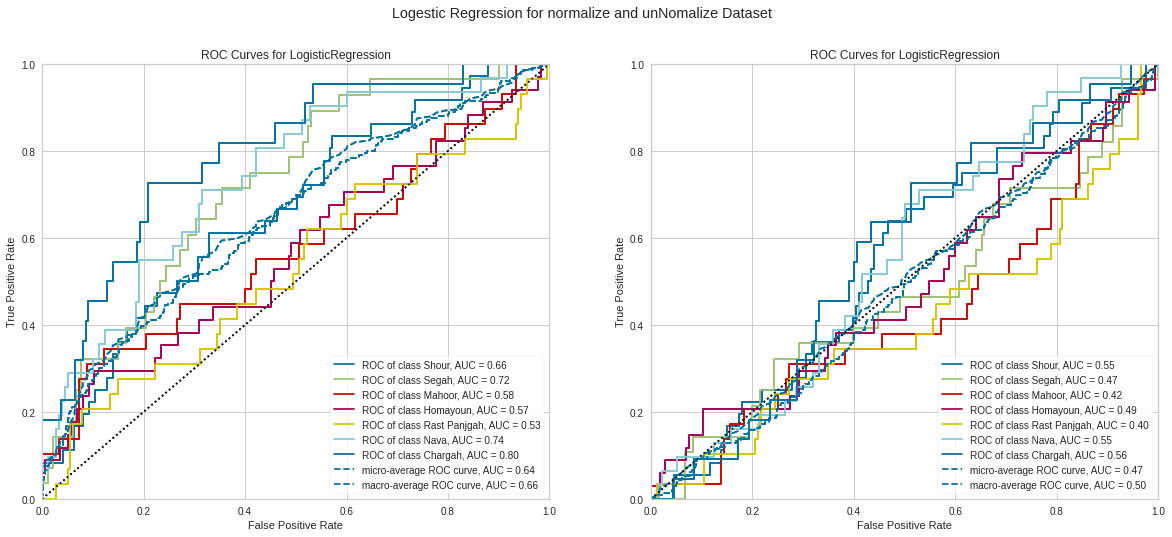

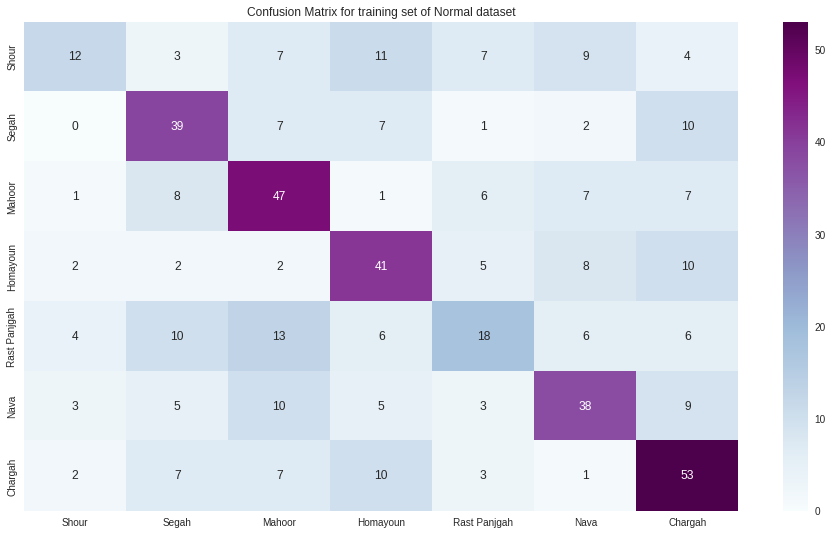

training set accuracy for Normal dataset: 0.511340206185567
Classification Metrics for training set of Normal dataset
              precision    recall  f1-score   support

           0      0.500     0.226     0.312        53
           1      0.527     0.591     0.557        66
           2      0.505     0.610     0.553        77
           3      0.506     0.586     0.543        70
           4      0.419     0.286     0.340        63
           5      0.535     0.521     0.528        73
           6      0.535     0.639     0.582        83

    accuracy                          0.511       485
   macro avg      0.504     0.494     0.488       485
weighted avg      0.506     0.511     0.499       485



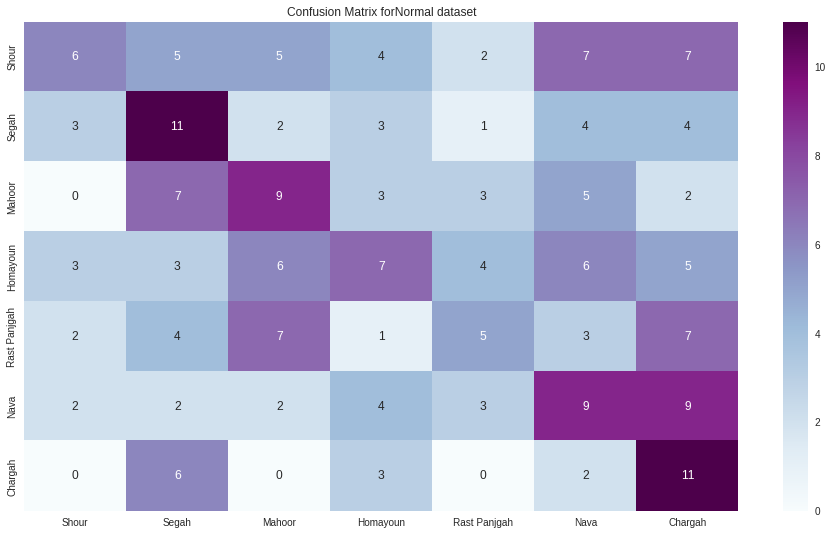

training set accuracy for Normal dataset: 0.27751196172248804
Classification Metrics for testing set of Normal dataset
              precision    recall  f1-score   support

           0      0.375     0.167     0.231        36
           1      0.289     0.393     0.333        28
           2      0.290     0.310     0.300        29
           3      0.280     0.206     0.237        34
           4      0.278     0.172     0.213        29
           5      0.250     0.290     0.269        31
           6      0.244     0.500     0.328        22

    accuracy                          0.278       209
   macro avg      0.287     0.291     0.273       209
weighted avg      0.291     0.278     0.269       209



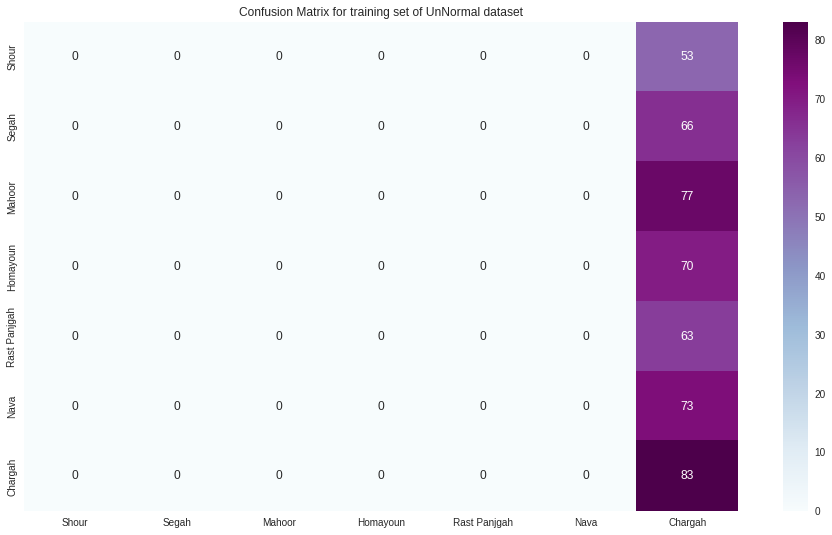

training set accuracy for UnNormal dataset: 0.1711340206185567
Classification Metrics for training set of UnNormal dataset
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        53
           1      0.000     0.000     0.000        66
           2      0.000     0.000     0.000        77
           3      0.000     0.000     0.000        70
           4      0.000     0.000     0.000        63
           5      0.000     0.000     0.000        73
           6      0.171     1.000     0.292        83

    accuracy                          0.171       485
   macro avg      0.024     0.143     0.042       485
weighted avg      0.029     0.171     0.050       485



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


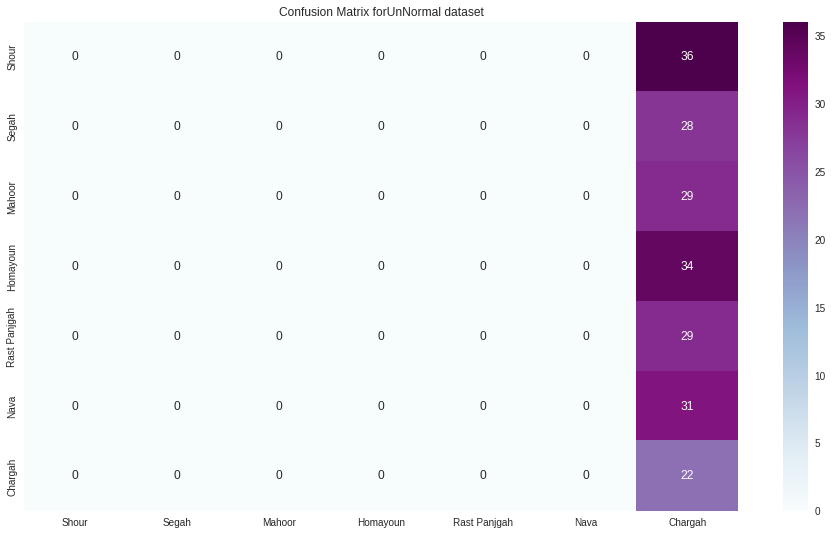

training set accuracy for UnNormal dataset: 0.10526315789473684
Classification Metrics for testing set of UnNormal dataset
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        36
           1      0.000     0.000     0.000        28
           2      0.000     0.000     0.000        29
           3      0.000     0.000     0.000        34
           4      0.000     0.000     0.000        29
           5      0.000     0.000     0.000        31
           6      0.105     1.000     0.190        22

    accuracy                          0.105       209
   macro avg      0.015     0.143     0.027       209
weighted avg      0.011     0.105     0.020       209



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('Logestic Regression for normalize and unNomalize Dataset')
model  = LogisticRegression(random_state=0)
ax1 = ROC_plot(model ,input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model ,input_train, target_train,input_test, target_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model , input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names,labels = 'Normal dataset')
predictProba(model , input_train, target_train,input_test, target_test,display_labels = Dastagh_names,labels = 'UnNormal dataset')

LR for spectrum dataset

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

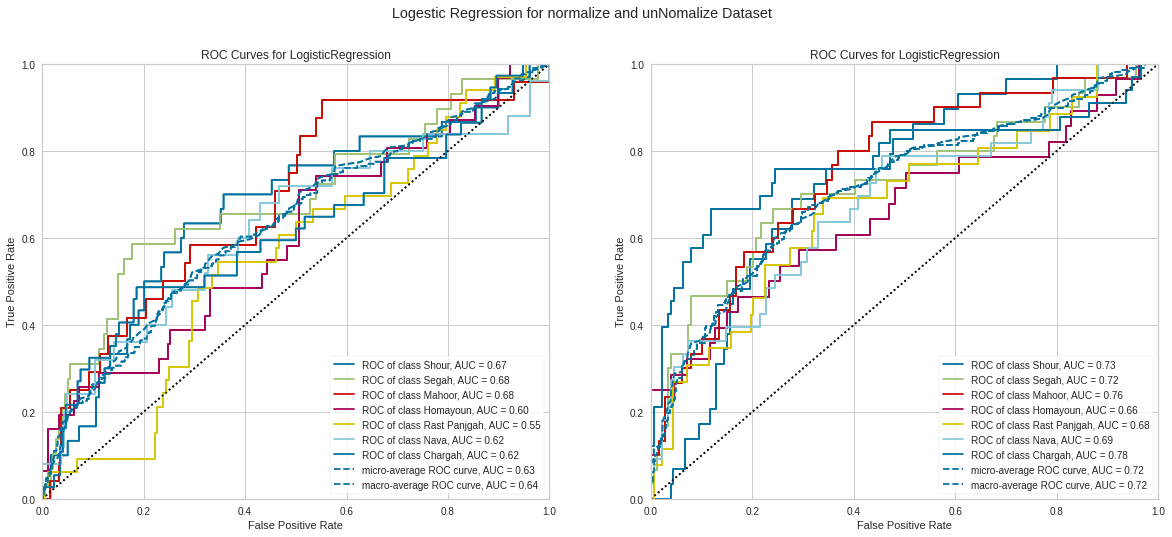

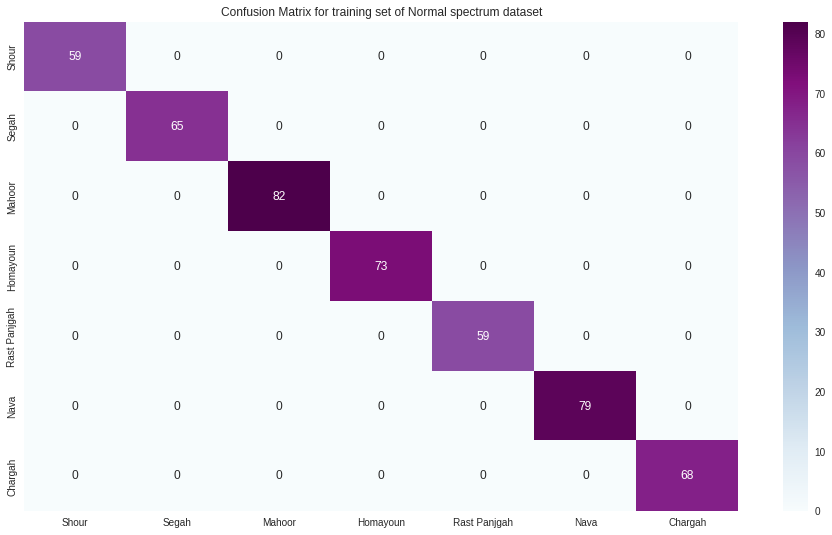

training set accuracy for Normal spectrum dataset: 1.0
Classification Metrics for training set of Normal spectrum dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        59
           1      1.000     1.000     1.000        65
           2      1.000     1.000     1.000        82
           3      1.000     1.000     1.000        73
           4      1.000     1.000     1.000        59
           5      1.000     1.000     1.000        79
           6      1.000     1.000     1.000        68

    accuracy                          1.000       485
   macro avg      1.000     1.000     1.000       485
weighted avg      1.000     1.000     1.000       485



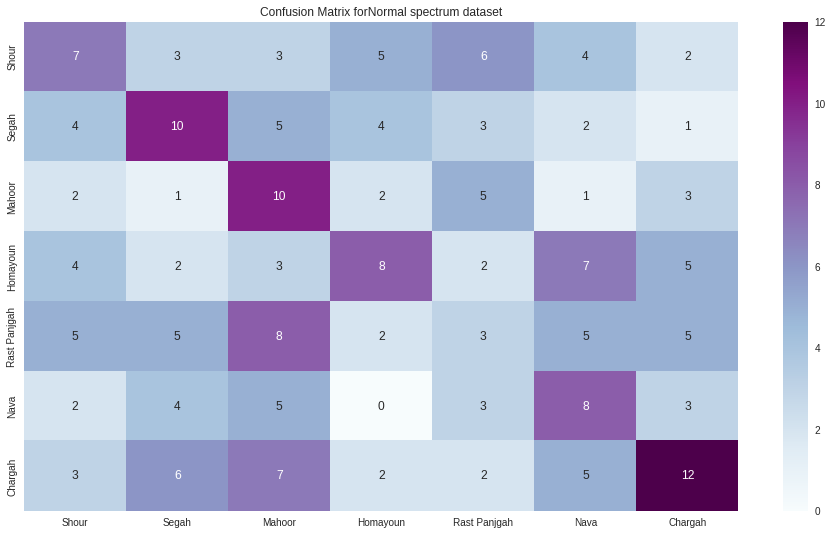

training set accuracy for Normal spectrum dataset: 0.27751196172248804
Classification Metrics for testing set of Normal spectrum dataset
              precision    recall  f1-score   support

           0      0.259     0.233     0.246        30
           1      0.323     0.345     0.333        29
           2      0.244     0.417     0.308        24
           3      0.348     0.258     0.296        31
           4      0.125     0.091     0.105        33
           5      0.250     0.320     0.281        25
           6      0.387     0.324     0.353        37

    accuracy                          0.278       209
   macro avg      0.277     0.284     0.275       209
weighted avg      0.280     0.278     0.273       209



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


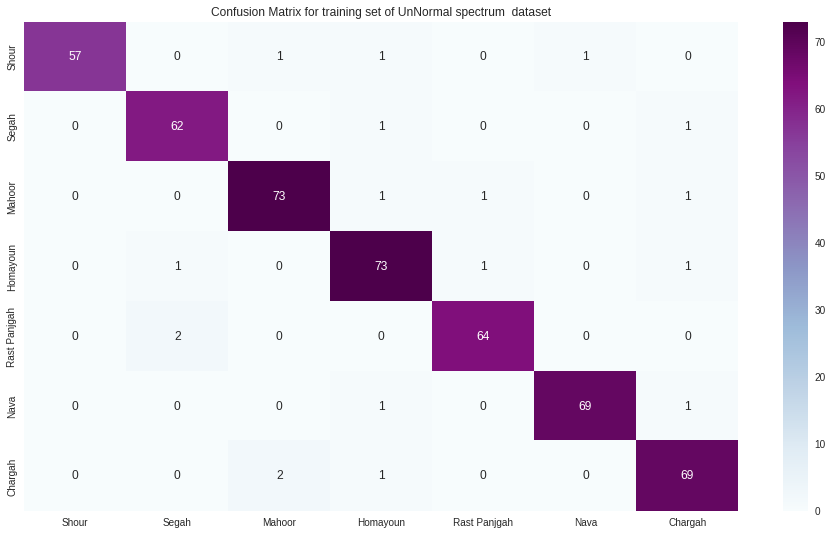

training set accuracy for UnNormal spectrum  dataset: 0.9628865979381444
Classification Metrics for training set of UnNormal spectrum  dataset
              precision    recall  f1-score   support

           0      1.000     0.950     0.974        60
           1      0.954     0.969     0.961        64
           2      0.961     0.961     0.961        76
           3      0.936     0.961     0.948        76
           4      0.970     0.970     0.970        66
           5      0.986     0.972     0.979        71
           6      0.945     0.958     0.952        72

    accuracy                          0.963       485
   macro avg      0.964     0.963     0.963       485
weighted avg      0.963     0.963     0.963       485



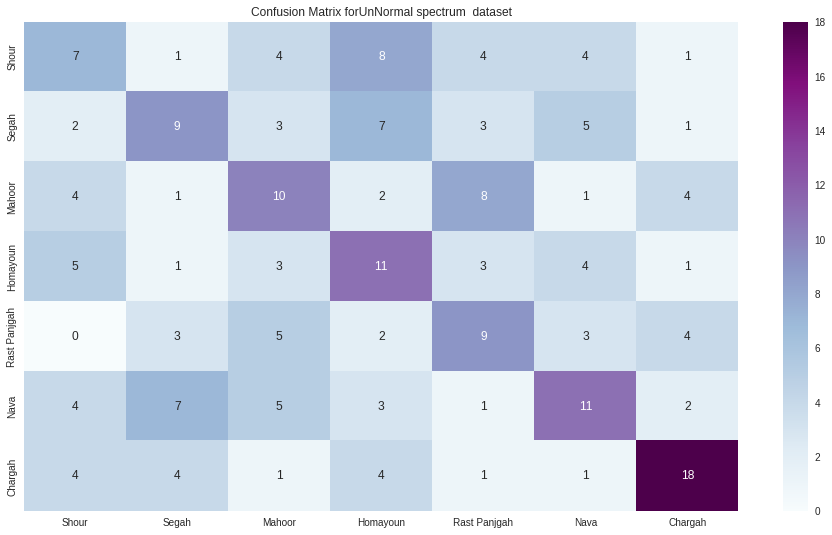

training set accuracy for UnNormal spectrum  dataset: 0.3588516746411483
Classification Metrics for testing set of UnNormal spectrum  dataset
              precision    recall  f1-score   support

           0      0.269     0.241     0.255        29
           1      0.346     0.300     0.321        30
           2      0.323     0.333     0.328        30
           3      0.297     0.393     0.338        28
           4      0.310     0.346     0.327        26
           5      0.379     0.333     0.355        33
           6      0.581     0.545     0.562        33

    accuracy                          0.359       209
   macro avg      0.358     0.356     0.355       209
weighted avg      0.363     0.359     0.359       209



In [68]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('Logestic Regression for normalize and unNomalize Dataset')
model =  LogisticRegression(random_state=0)
ax1 = ROC_plot(model,input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model,input_spectrum_Normal_train, target_spectrum_Normal_train,input_spectrum_Normal_test, target_spectrum_Normal_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')
predictProba(model, input_spectrum_Normal_train, target_spectrum_Normal_train,input_spectrum_Normal_test, target_spectrum_Normal_test, display_labels = Dastagh_names,labels = 'UnNormal spectrum  dataset')

### KNN

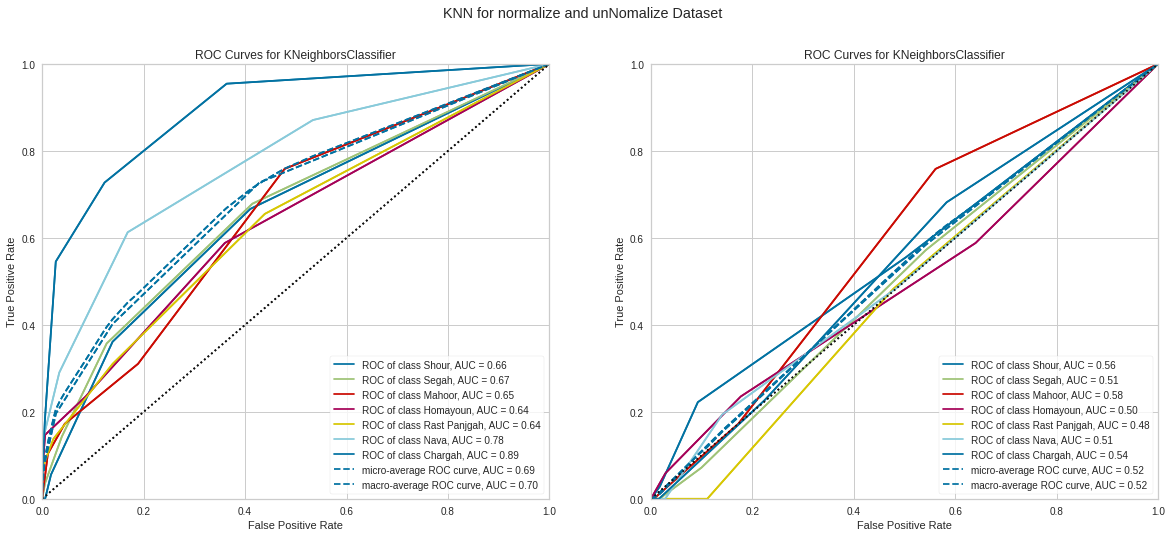

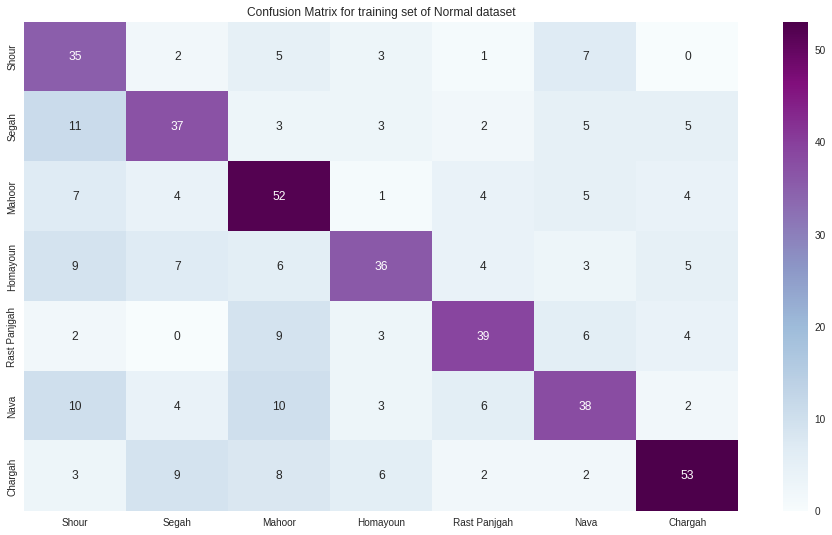

training set accuracy for Normal dataset: 0.5979381443298969
Classification Metrics for training set of Normal dataset
              precision    recall  f1-score   support

           0      0.455     0.660     0.538        53
           1      0.587     0.561     0.574        66
           2      0.559     0.675     0.612        77
           3      0.655     0.514     0.576        70
           4      0.672     0.619     0.645        63
           5      0.576     0.521     0.547        73
           6      0.726     0.639     0.679        83

    accuracy                          0.598       485
   macro avg      0.604     0.598     0.596       485
weighted avg      0.611     0.598     0.599       485



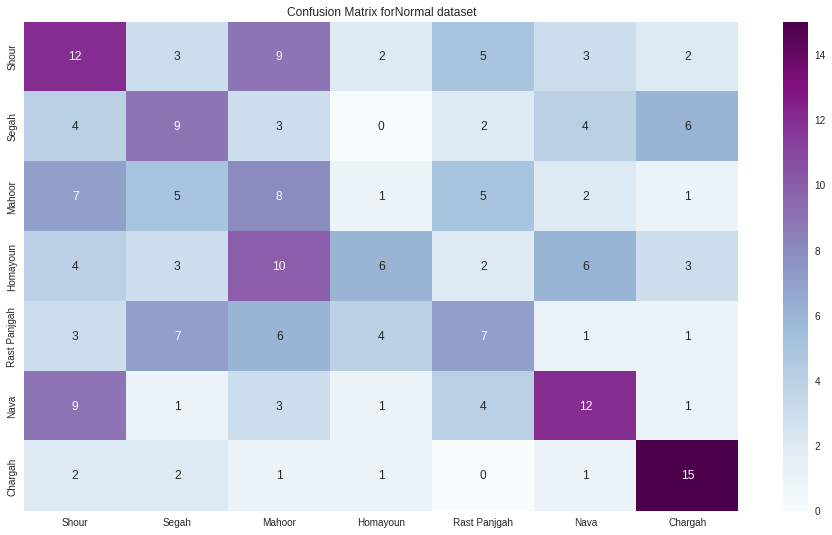

training set accuracy for Normal dataset: 0.33014354066985646
Classification Metrics for testing set of Normal dataset
              precision    recall  f1-score   support

           0      0.293     0.333     0.312        36
           1      0.300     0.321     0.310        28
           2      0.200     0.276     0.232        29
           3      0.400     0.176     0.245        34
           4      0.280     0.241     0.259        29
           5      0.414     0.387     0.400        31
           6      0.517     0.682     0.588        22

    accuracy                          0.330       209
   macro avg      0.343     0.345     0.335       209
weighted avg      0.338     0.330     0.325       209



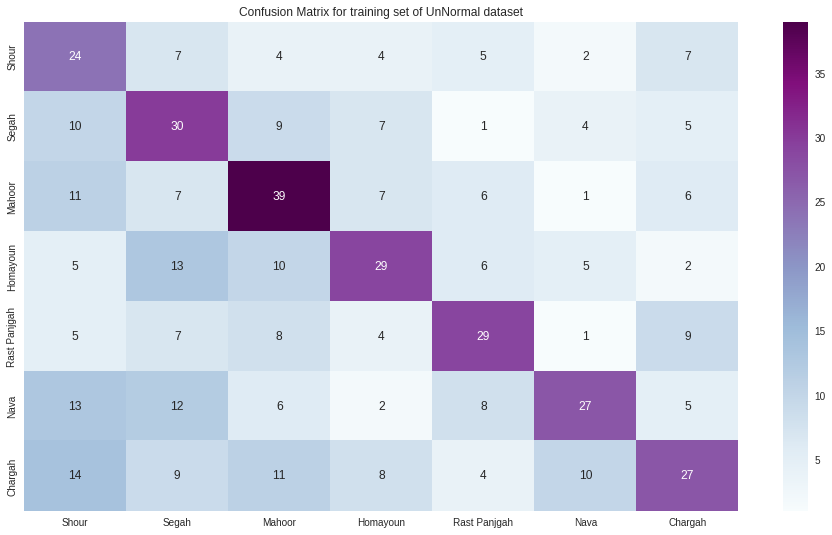

training set accuracy for UnNormal dataset: 0.422680412371134
Classification Metrics for training set of UnNormal dataset
              precision    recall  f1-score   support

           0      0.293     0.453     0.356        53
           1      0.353     0.455     0.397        66
           2      0.448     0.506     0.476        77
           3      0.475     0.414     0.443        70
           4      0.492     0.460     0.475        63
           5      0.540     0.370     0.439        73
           6      0.443     0.325     0.375        83

    accuracy                          0.423       485
   macro avg      0.435     0.426     0.423       485
weighted avg      0.441     0.423     0.424       485



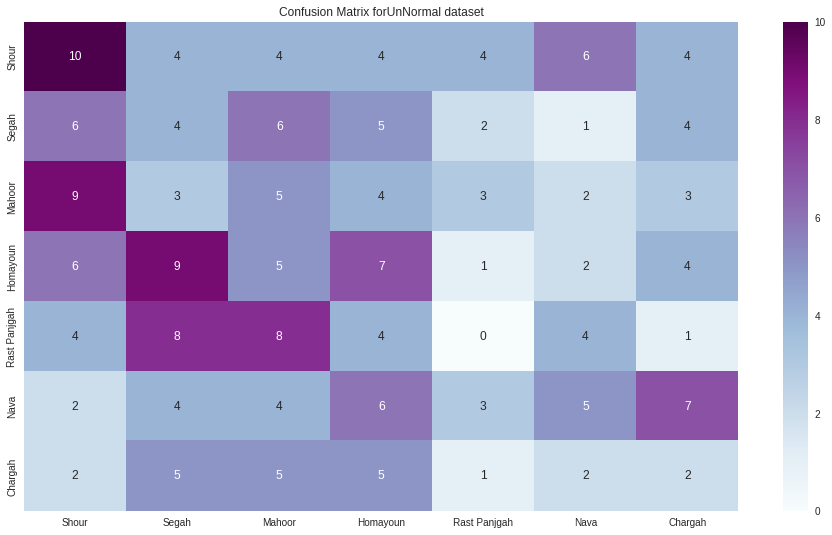

training set accuracy for UnNormal dataset: 0.15789473684210525
Classification Metrics for testing set of UnNormal dataset
              precision    recall  f1-score   support

           0      0.256     0.278     0.267        36
           1      0.108     0.143     0.123        28
           2      0.135     0.172     0.152        29
           3      0.200     0.206     0.203        34
           4      0.000     0.000     0.000        29
           5      0.227     0.161     0.189        31
           6      0.080     0.091     0.085        22

    accuracy                          0.158       209
   macro avg      0.144     0.150     0.145       209
weighted avg      0.152     0.158     0.153       209



In [69]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('KNN for normalize and unNomalize Dataset')
model  = KNeighborsClassifier(n_neighbors=5)
ax1 = ROC_plot(model ,input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model ,input_train, target_train,input_test, target_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model , input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names,labels = 'Normal dataset')
predictProba(model , input_train, target_train,input_test, target_test,display_labels = Dastagh_names,labels = 'UnNormal dataset')

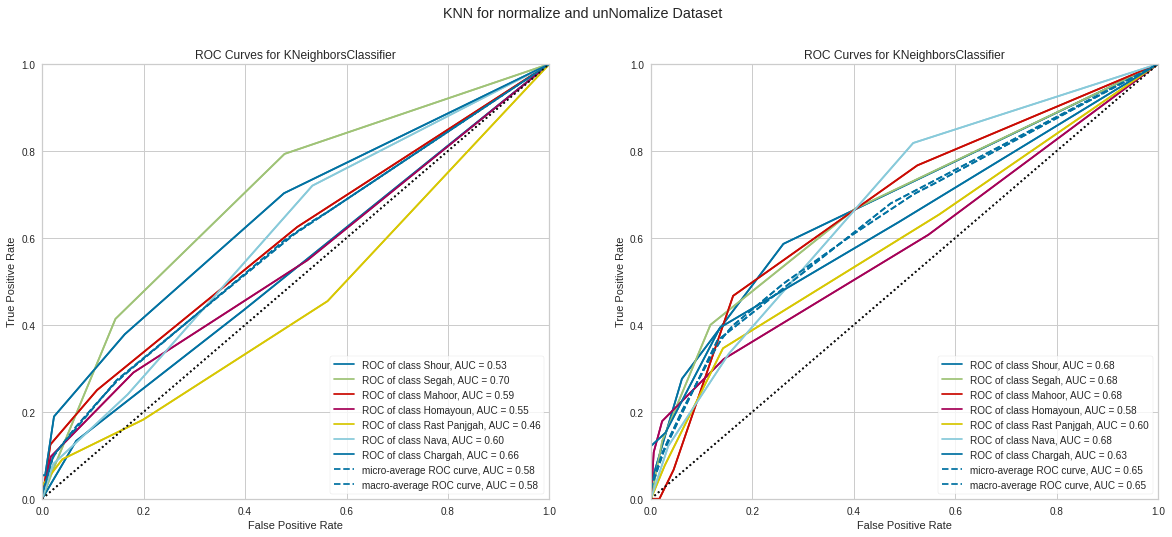

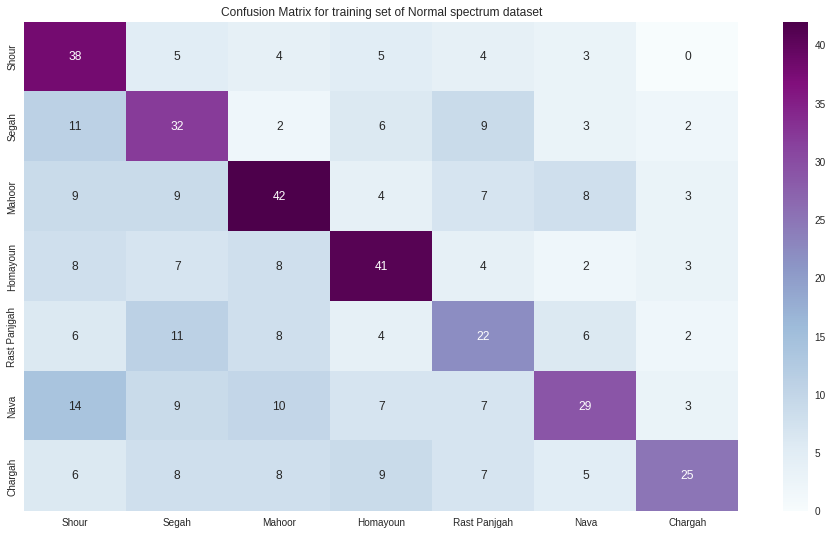

training set accuracy for Normal spectrum dataset: 0.47216494845360824
Classification Metrics for training set of Normal spectrum dataset
              precision    recall  f1-score   support

           0      0.413     0.644     0.503        59
           1      0.395     0.492     0.438        65
           2      0.512     0.512     0.512        82
           3      0.539     0.562     0.550        73
           4      0.367     0.373     0.370        59
           5      0.518     0.367     0.430        79
           6      0.658     0.368     0.472        68

    accuracy                          0.472       485
   macro avg      0.486     0.474     0.468       485
weighted avg      0.492     0.472     0.471       485



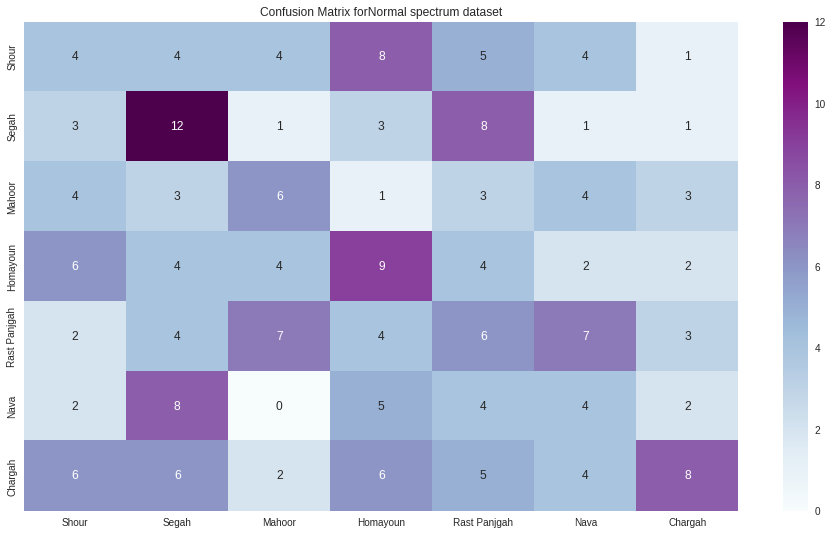

training set accuracy for Normal spectrum dataset: 0.23444976076555024
Classification Metrics for testing set of Normal spectrum dataset
              precision    recall  f1-score   support

           0      0.148     0.133     0.140        30
           1      0.293     0.414     0.343        29
           2      0.250     0.250     0.250        24
           3      0.250     0.290     0.269        31
           4      0.171     0.182     0.176        33
           5      0.154     0.160     0.157        25
           6      0.400     0.216     0.281        37

    accuracy                          0.234       209
   macro avg      0.238     0.235     0.231       209
weighted avg      0.244     0.234     0.233       209



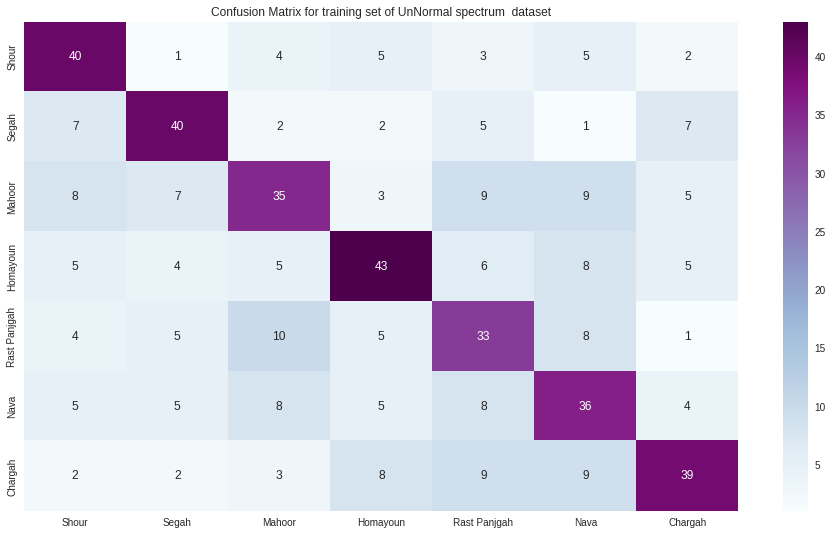

training set accuracy for UnNormal spectrum  dataset: 0.5484536082474227
Classification Metrics for training set of UnNormal spectrum  dataset
              precision    recall  f1-score   support

           0      0.563     0.667     0.611        60
           1      0.625     0.625     0.625        64
           2      0.522     0.461     0.490        76
           3      0.606     0.566     0.585        76
           4      0.452     0.500     0.475        66
           5      0.474     0.507     0.490        71
           6      0.619     0.542     0.578        72

    accuracy                          0.548       485
   macro avg      0.552     0.552     0.550       485
weighted avg      0.552     0.548     0.548       485



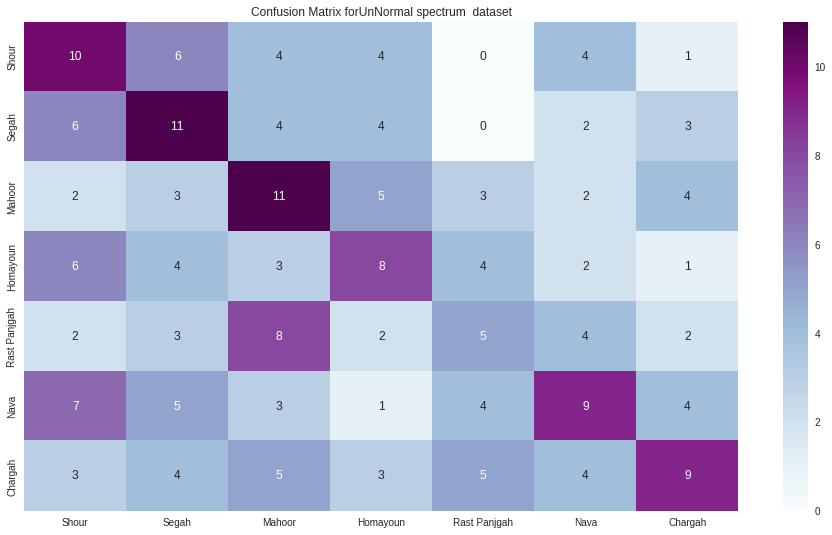

training set accuracy for UnNormal spectrum  dataset: 0.3014354066985646
Classification Metrics for testing set of UnNormal spectrum  dataset
              precision    recall  f1-score   support

           0      0.278     0.345     0.308        29
           1      0.306     0.367     0.333        30
           2      0.289     0.367     0.324        30
           3      0.296     0.286     0.291        28
           4      0.238     0.192     0.213        26
           5      0.333     0.273     0.300        33
           6      0.375     0.273     0.316        33

    accuracy                          0.301       209
   macro avg      0.302     0.300     0.298       209
weighted avg      0.305     0.301     0.300       209



In [70]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('KNN for normalize and unNomalize Dataset')
model =  KNeighborsClassifier(n_neighbors=5)
ax1 = ROC_plot(model,input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model,input_spectrum_Normal_train, target_spectrum_Normal_train,input_spectrum_Normal_test, target_spectrum_Normal_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')
predictProba(model, input_spectrum_Normal_train, target_spectrum_Normal_train,input_spectrum_Normal_test, target_spectrum_Normal_test, display_labels = Dastagh_names,labels = 'UnNormal spectrum  dataset')

### SVM

##### linear svm OVR

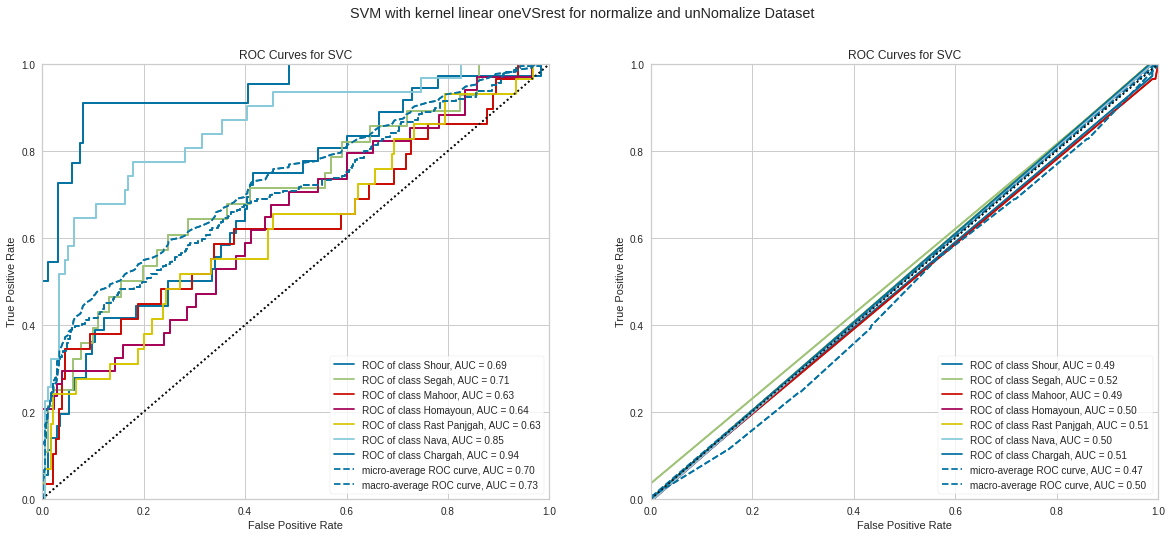

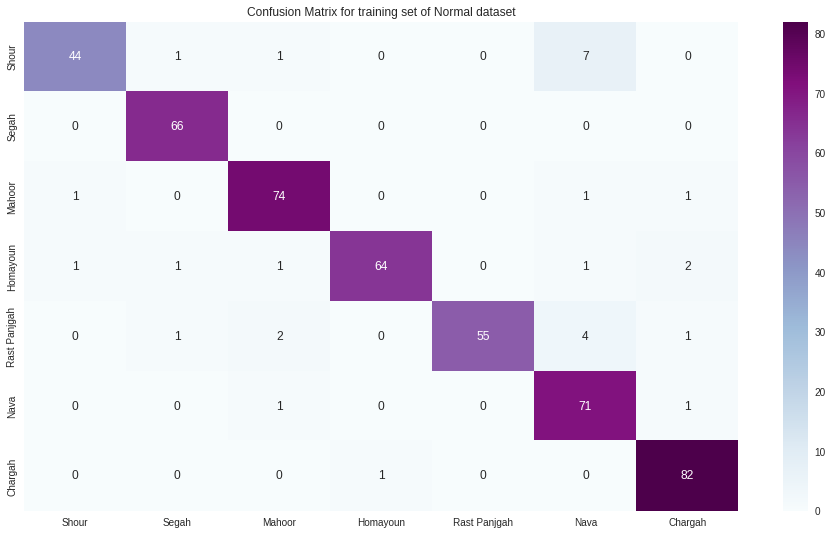

training set accuracy for Normal dataset: 0.9402061855670103
Classification Metrics for training set of Normal dataset
              precision    recall  f1-score   support

           0      0.957     0.830     0.889        53
           1      0.957     1.000     0.978        66
           2      0.937     0.961     0.949        77
           3      0.985     0.914     0.948        70
           4      1.000     0.873     0.932        63
           5      0.845     0.973     0.904        73
           6      0.943     0.988     0.965        83

    accuracy                          0.940       485
   macro avg      0.946     0.934     0.938       485
weighted avg      0.944     0.940     0.940       485



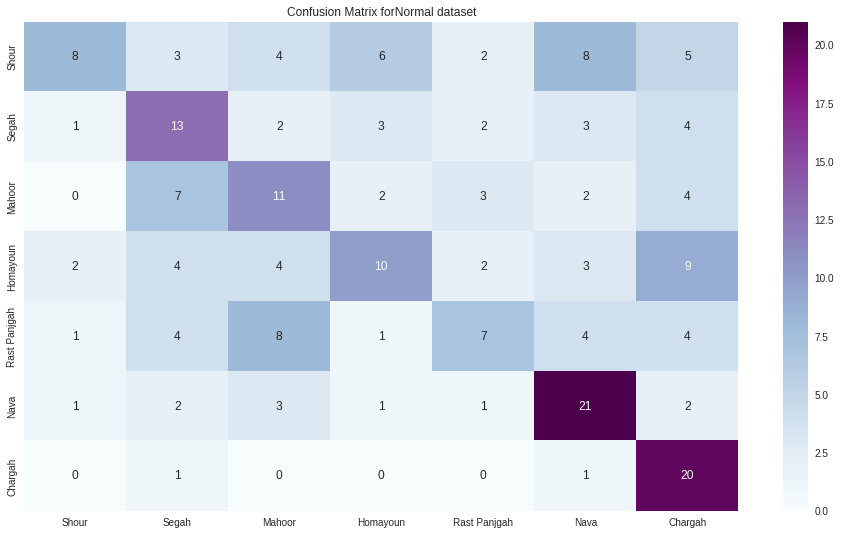

training set accuracy for Normal dataset: 0.430622009569378
Classification Metrics for testing set of Normal dataset
              precision    recall  f1-score   support

           0      0.615     0.222     0.327        36
           1      0.382     0.464     0.419        28
           2      0.344     0.379     0.361        29
           3      0.435     0.294     0.351        34
           4      0.412     0.241     0.304        29
           5      0.500     0.677     0.575        31
           6      0.417     0.909     0.571        22

    accuracy                          0.431       209
   macro avg      0.444     0.455     0.416       209
weighted avg      0.451     0.431     0.407       209



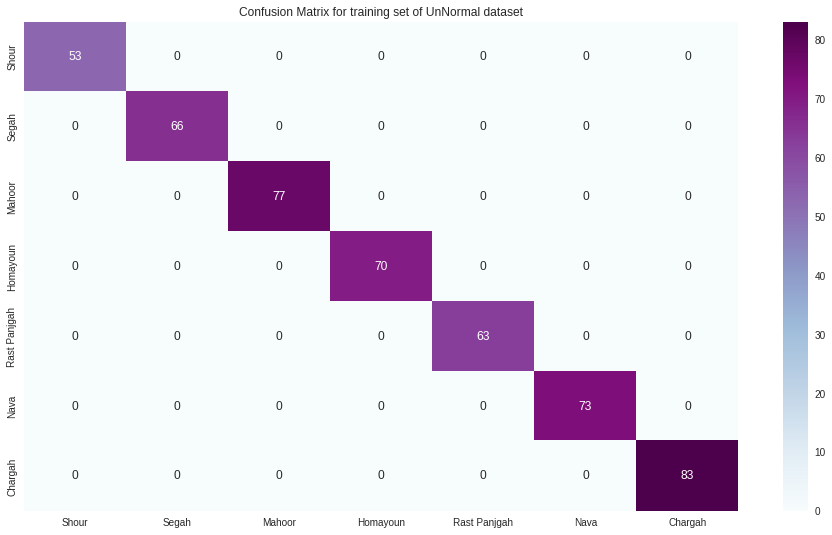

training set accuracy for UnNormal dataset: 1.0
Classification Metrics for training set of UnNormal dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        53
           1      1.000     1.000     1.000        66
           2      1.000     1.000     1.000        77
           3      1.000     1.000     1.000        70
           4      1.000     1.000     1.000        63
           5      1.000     1.000     1.000        73
           6      1.000     1.000     1.000        83

    accuracy                          1.000       485
   macro avg      1.000     1.000     1.000       485
weighted avg      1.000     1.000     1.000       485



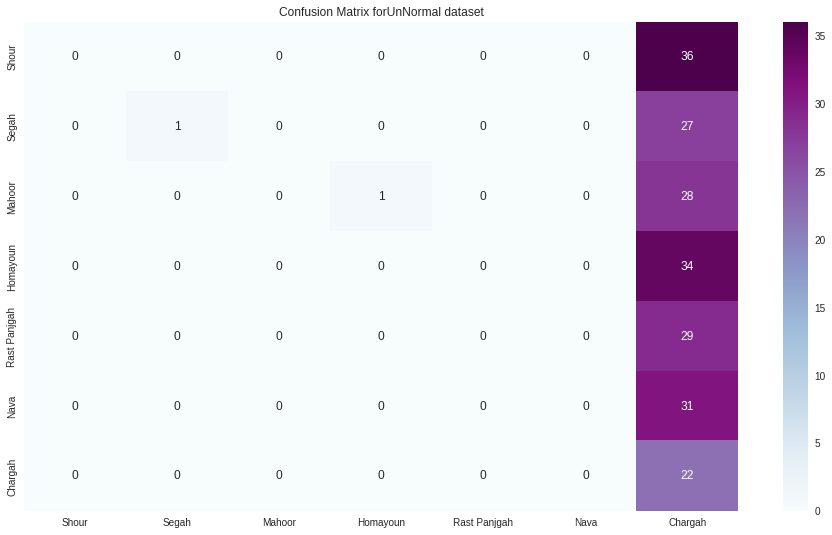

training set accuracy for UnNormal dataset: 0.11004784688995216
Classification Metrics for testing set of UnNormal dataset
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        36
           1      1.000     0.036     0.069        28
           2      0.000     0.000     0.000        29
           3      0.000     0.000     0.000        34
           4      0.000     0.000     0.000        29
           5      0.000     0.000     0.000        31
           6      0.106     1.000     0.192        22

    accuracy                          0.110       209
   macro avg      0.158     0.148     0.037       209
weighted avg      0.145     0.110     0.029       209



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('SVM with kernel linear oneVSrest for normalize and unNomalize Dataset')
model  = svm.SVC(kernel="linear", C=1)
ax1 = ROC_plot(model ,input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model ,input_train, target_train,input_test, target_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model , input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names,labels = 'Normal dataset')
predictProba(model , input_train, target_train,input_test, target_test,display_labels = Dastagh_names,labels = 'UnNormal dataset')

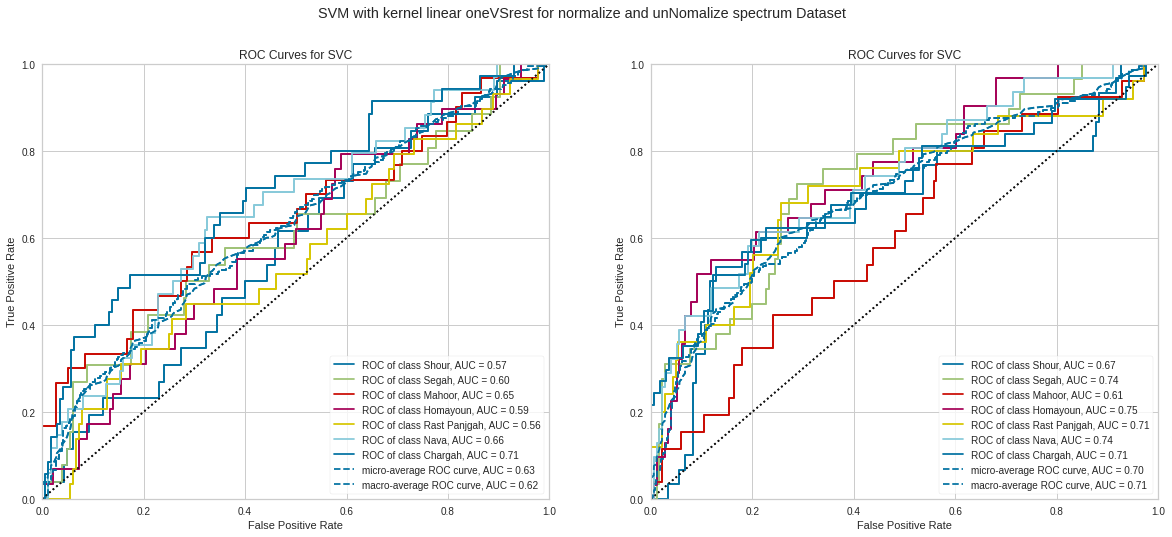

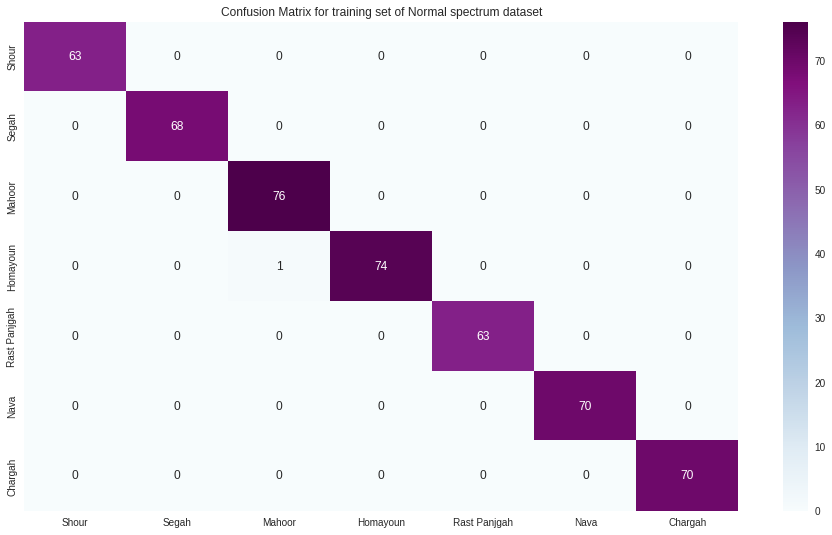

training set accuracy for Normal spectrum dataset: 0.9979381443298969
Classification Metrics for training set of Normal spectrum dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        63
           1      1.000     1.000     1.000        68
           2      0.987     1.000     0.993        76
           3      1.000     0.987     0.993        75
           4      1.000     1.000     1.000        63
           5      1.000     1.000     1.000        70
           6      1.000     1.000     1.000        70

    accuracy                          0.998       485
   macro avg      0.998     0.998     0.998       485
weighted avg      0.998     0.998     0.998       485



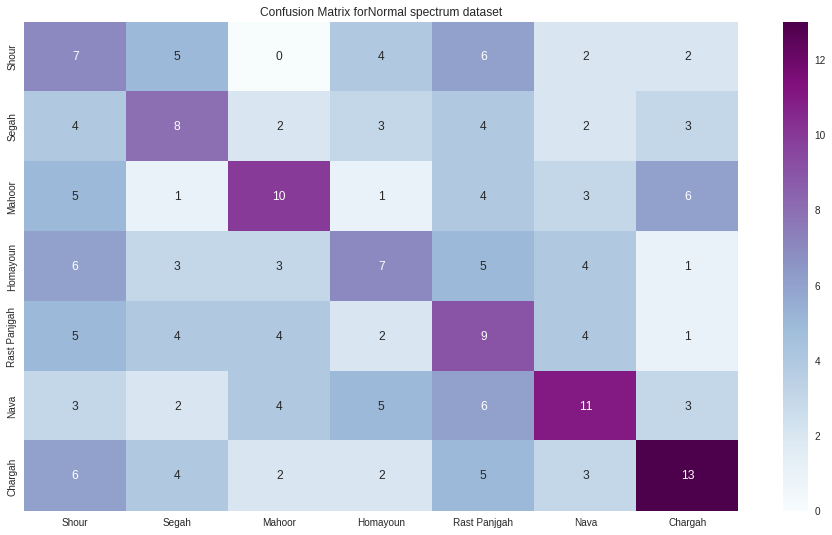

training set accuracy for Normal spectrum dataset: 0.31100478468899523
Classification Metrics for testing set of Normal spectrum dataset
              precision    recall  f1-score   support

           0      0.194     0.269     0.226        26
           1      0.296     0.308     0.302        26
           2      0.400     0.333     0.364        30
           3      0.292     0.241     0.264        29
           4      0.231     0.310     0.265        29
           5      0.379     0.324     0.349        34
           6      0.448     0.371     0.406        35

    accuracy                          0.311       209
   macro avg      0.320     0.308     0.311       209
weighted avg      0.328     0.311     0.316       209



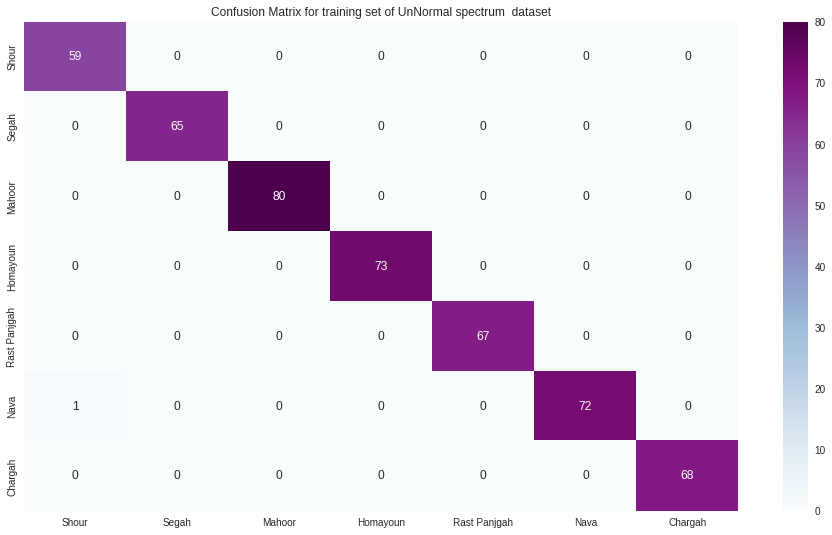

training set accuracy for UnNormal spectrum  dataset: 0.9979381443298969
Classification Metrics for training set of UnNormal spectrum  dataset
              precision    recall  f1-score   support

           0      0.983     1.000     0.992        59
           1      1.000     1.000     1.000        65
           2      1.000     1.000     1.000        80
           3      1.000     1.000     1.000        73
           4      1.000     1.000     1.000        67
           5      1.000     0.986     0.993        73
           6      1.000     1.000     1.000        68

    accuracy                          0.998       485
   macro avg      0.998     0.998     0.998       485
weighted avg      0.998     0.998     0.998       485



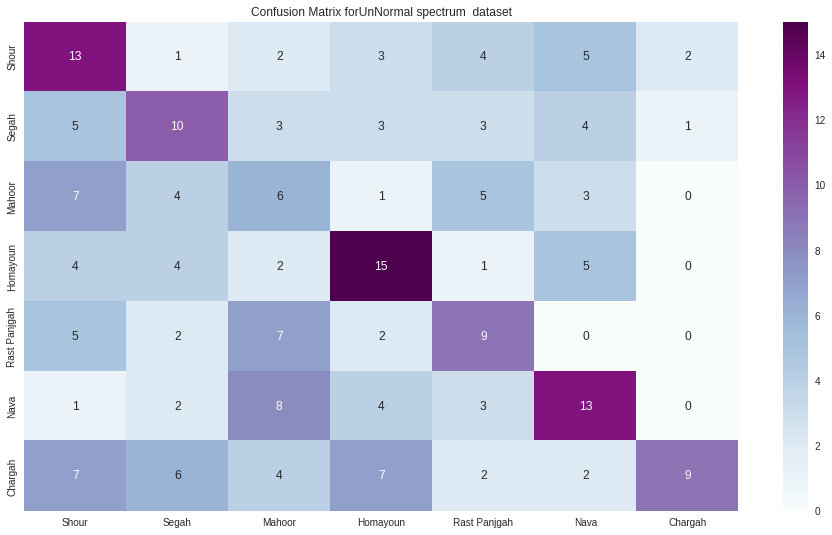

training set accuracy for UnNormal spectrum  dataset: 0.3588516746411483
Classification Metrics for testing set of UnNormal spectrum  dataset
              precision    recall  f1-score   support

           0      0.310     0.433     0.361        30
           1      0.345     0.345     0.345        29
           2      0.188     0.231     0.207        26
           3      0.429     0.484     0.455        31
           4      0.333     0.360     0.346        25
           5      0.406     0.419     0.413        31
           6      0.750     0.243     0.367        37

    accuracy                          0.359       209
   macro avg      0.394     0.359     0.356       209
weighted avg      0.412     0.359     0.360       209



In [33]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('SVM with kernel linear oneVSrest for normalize and unNomalize spectrum Dataset')
model =  svm.SVC(kernel="linear", C=1)
ax1 = ROC_plot(model,input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model,input_spectrum_Normal_train, target_spectrum_Normal_train,input_spectrum_Normal_test, target_spectrum_Normal_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')
predictProba(model, input_spectrum_Normal_train, target_spectrum_Normal_train,input_spectrum_Normal_test, target_spectrum_Normal_test, display_labels = Dastagh_names,labels = 'UnNormal spectrum  dataset')

##### Linear svm oVo

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


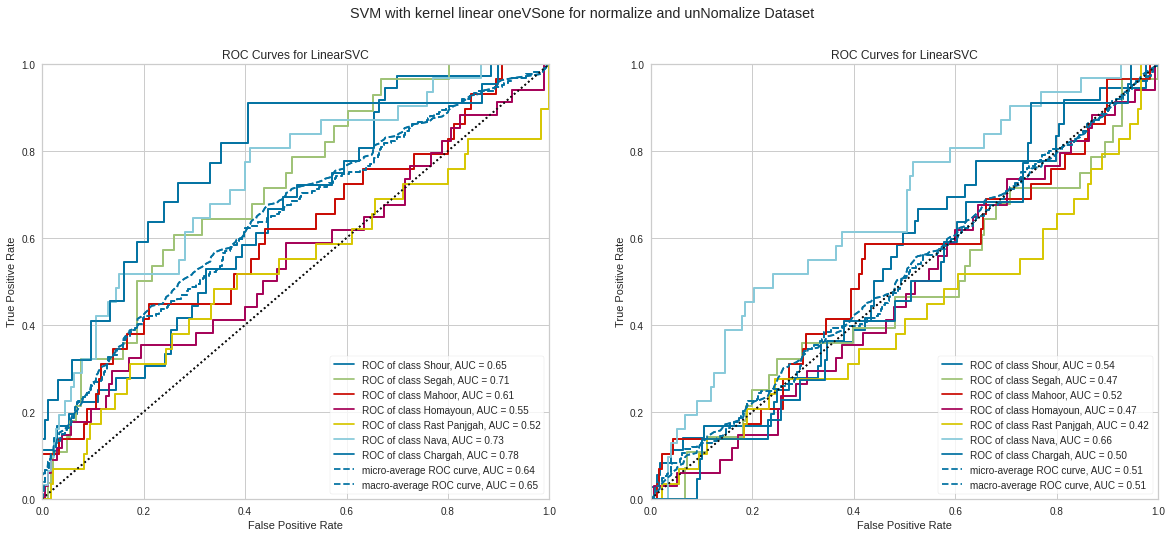

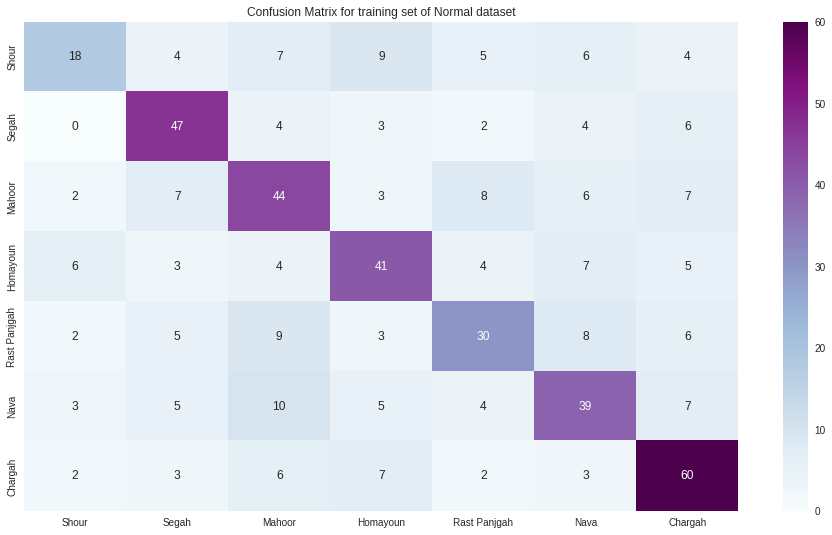

training set accuracy for Normal dataset: 0.5752577319587628
Classification Metrics for training set of Normal dataset
              precision    recall  f1-score   support

           0      0.545     0.340     0.419        53
           1      0.635     0.712     0.671        66
           2      0.524     0.571     0.547        77
           3      0.577     0.586     0.582        70
           4      0.545     0.476     0.508        63
           5      0.534     0.534     0.534        73
           6      0.632     0.723     0.674        83

    accuracy                          0.575       485
   macro avg      0.570     0.563     0.562       485
weighted avg      0.572     0.575     0.570       485



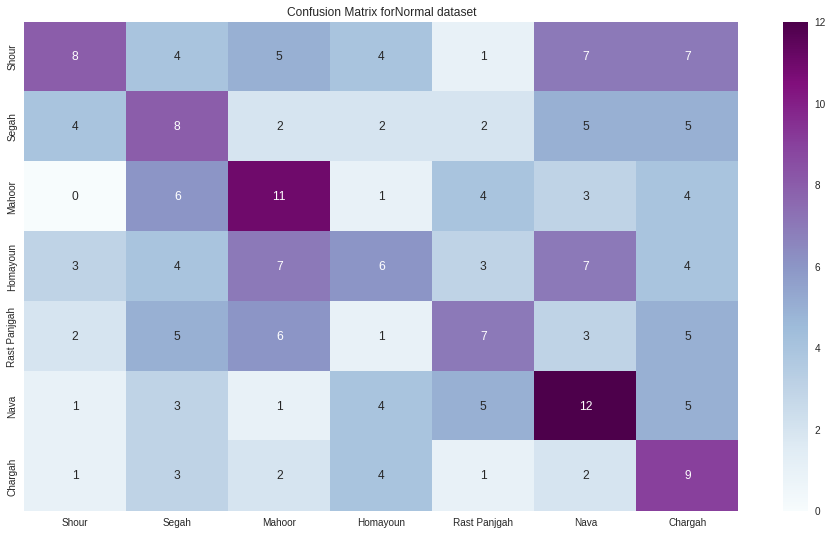

training set accuracy for Normal dataset: 0.291866028708134
Classification Metrics for testing set of Normal dataset
              precision    recall  f1-score   support

           0      0.421     0.222     0.291        36
           1      0.242     0.286     0.262        28
           2      0.324     0.379     0.349        29
           3      0.273     0.176     0.214        34
           4      0.304     0.241     0.269        29
           5      0.308     0.387     0.343        31
           6      0.231     0.409     0.295        22

    accuracy                          0.292       209
   macro avg      0.300     0.300     0.289       209
weighted avg      0.306     0.292     0.288       209



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


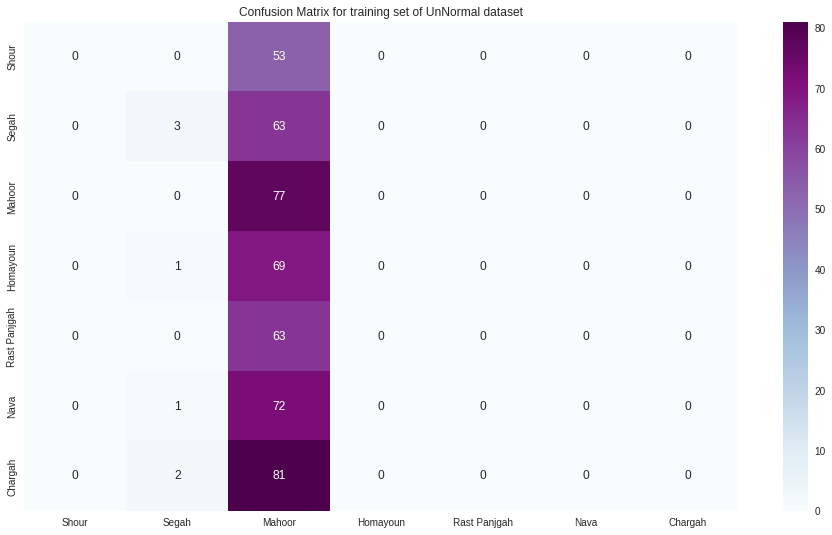

training set accuracy for UnNormal dataset: 0.16494845360824742
Classification Metrics for training set of UnNormal dataset
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        53
           1      0.429     0.045     0.082        66
           2      0.161     1.000     0.277        77
           3      0.000     0.000     0.000        70
           4      0.000     0.000     0.000        63
           5      0.000     0.000     0.000        73
           6      0.000     0.000     0.000        83

    accuracy                          0.165       485
   macro avg      0.084     0.149     0.051       485
weighted avg      0.084     0.165     0.055       485



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


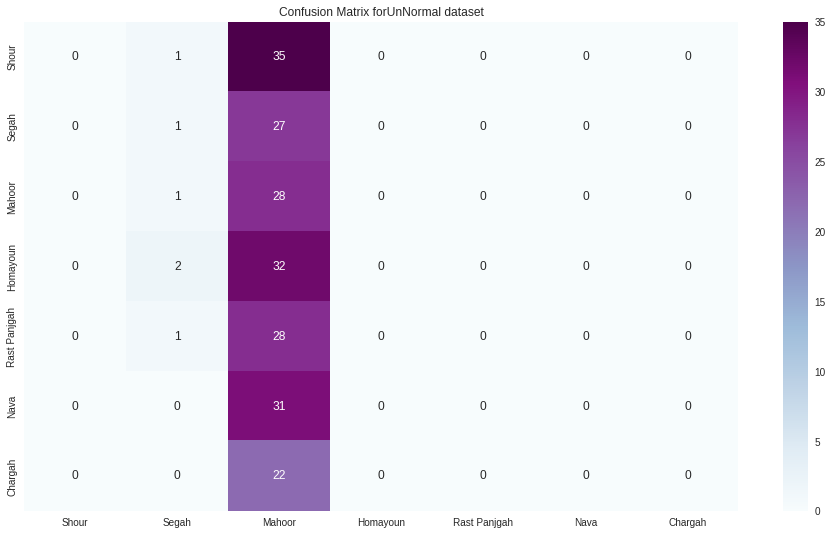

training set accuracy for UnNormal dataset: 0.13875598086124402
Classification Metrics for testing set of UnNormal dataset
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        36
           1      0.167     0.036     0.059        28
           2      0.138     0.966     0.241        29
           3      0.000     0.000     0.000        34
           4      0.000     0.000     0.000        29
           5      0.000     0.000     0.000        31
           6      0.000     0.000     0.000        22

    accuracy                          0.139       209
   macro avg      0.044     0.143     0.043       209
weighted avg      0.041     0.139     0.041       209



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('SVM with kernel linear oneVSone for normalize and unNomalize Dataset')
model  = svm.LinearSVC(C=1, max_iter=10000)
ax1 = ROC_plot(model ,input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model ,input_train, target_train,input_test, target_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model , input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names,labels = 'Normal dataset')
predictProba(model , input_train, target_train,input_test, target_test,display_labels = Dastagh_names,labels = 'UnNormal dataset')

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


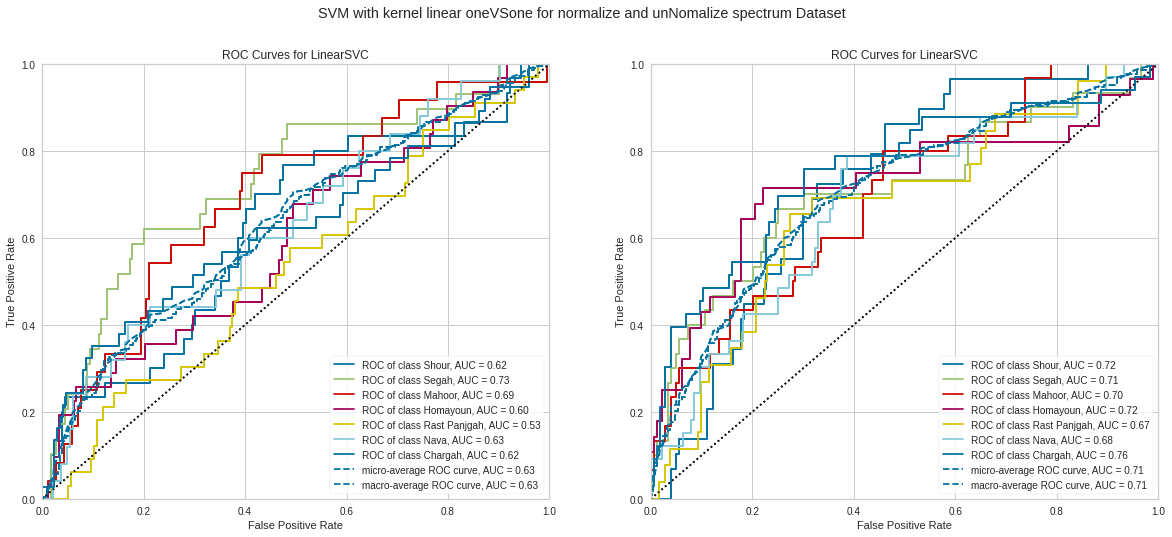

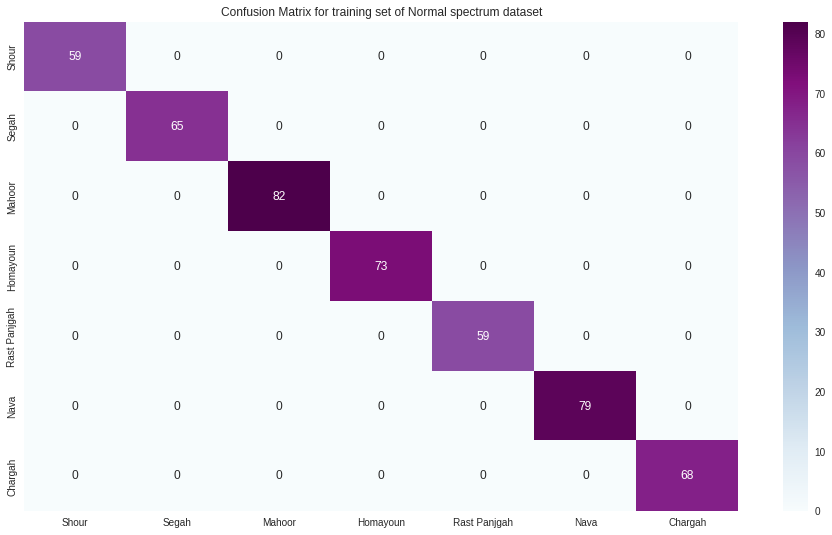

training set accuracy for Normal spectrum dataset: 1.0
Classification Metrics for training set of Normal spectrum dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        59
           1      1.000     1.000     1.000        65
           2      1.000     1.000     1.000        82
           3      1.000     1.000     1.000        73
           4      1.000     1.000     1.000        59
           5      1.000     1.000     1.000        79
           6      1.000     1.000     1.000        68

    accuracy                          1.000       485
   macro avg      1.000     1.000     1.000       485
weighted avg      1.000     1.000     1.000       485



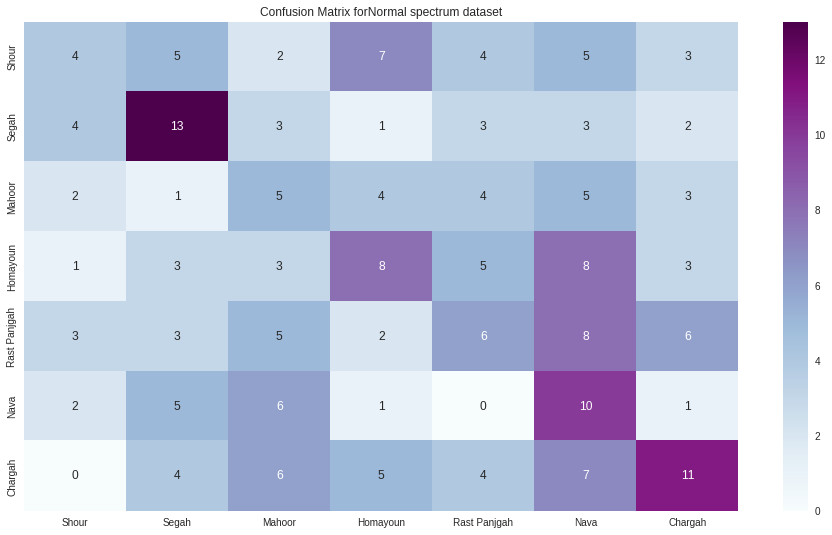

training set accuracy for Normal spectrum dataset: 0.2727272727272727
Classification Metrics for testing set of Normal spectrum dataset
              precision    recall  f1-score   support

           0      0.250     0.133     0.174        30
           1      0.382     0.448     0.413        29
           2      0.167     0.208     0.185        24
           3      0.286     0.258     0.271        31
           4      0.231     0.182     0.203        33
           5      0.217     0.400     0.282        25
           6      0.379     0.297     0.333        37

    accuracy                          0.273       209
   macro avg      0.273     0.275     0.266       209
weighted avg      0.280     0.273     0.269       209



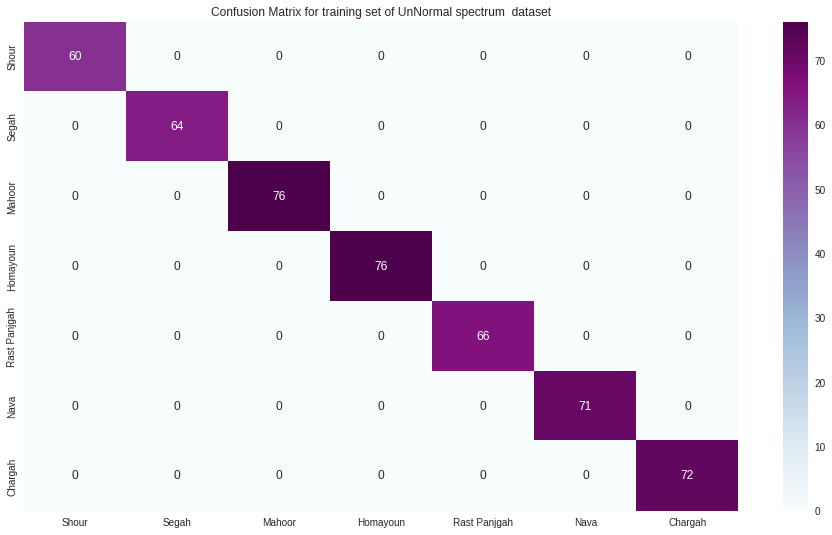

training set accuracy for UnNormal spectrum  dataset: 1.0
Classification Metrics for training set of UnNormal spectrum  dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        60
           1      1.000     1.000     1.000        64
           2      1.000     1.000     1.000        76
           3      1.000     1.000     1.000        76
           4      1.000     1.000     1.000        66
           5      1.000     1.000     1.000        71
           6      1.000     1.000     1.000        72

    accuracy                          1.000       485
   macro avg      1.000     1.000     1.000       485
weighted avg      1.000     1.000     1.000       485



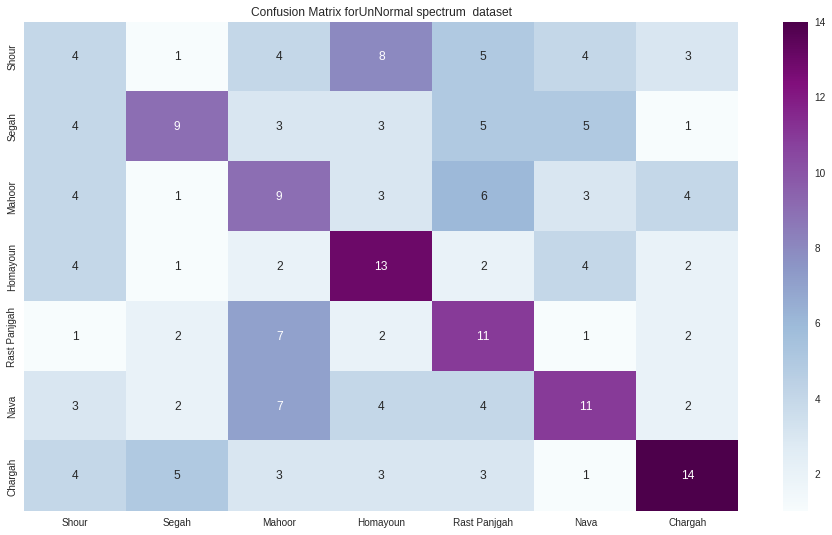

training set accuracy for UnNormal spectrum  dataset: 0.3397129186602871
Classification Metrics for testing set of UnNormal spectrum  dataset
              precision    recall  f1-score   support

           0      0.167     0.138     0.151        29
           1      0.429     0.300     0.353        30
           2      0.257     0.300     0.277        30
           3      0.361     0.464     0.406        28
           4      0.306     0.423     0.355        26
           5      0.379     0.333     0.355        33
           6      0.500     0.424     0.459        33

    accuracy                          0.340       209
   macro avg      0.343     0.340     0.337       209
weighted avg      0.347     0.340     0.338       209



In [77]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('SVM with kernel linear oneVSone for normalize and unNomalize spectrum Dataset')
model =  svm.LinearSVC(C=1, max_iter=10000)
ax1 = ROC_plot(model,input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model,input_spectrum_Normal_train, target_spectrum_Normal_train,input_spectrum_Normal_test, target_spectrum_Normal_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')
predictProba(model, input_spectrum_Normal_train, target_spectrum_Normal_train,input_spectrum_Normal_test, target_spectrum_Normal_test, display_labels = Dastagh_names,labels = 'UnNormal spectrum  dataset')

##### RBF svm 

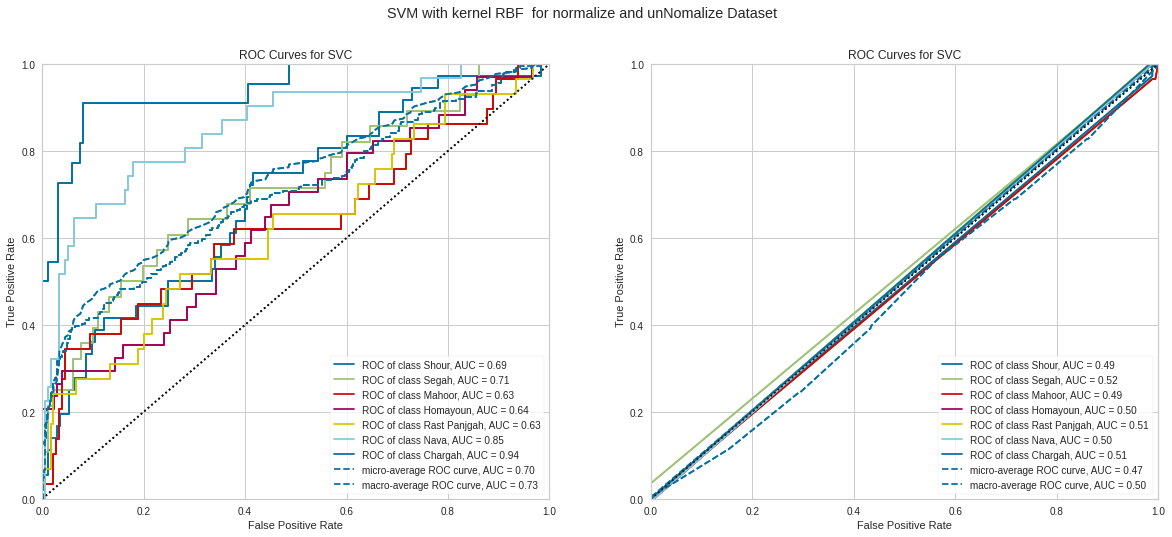

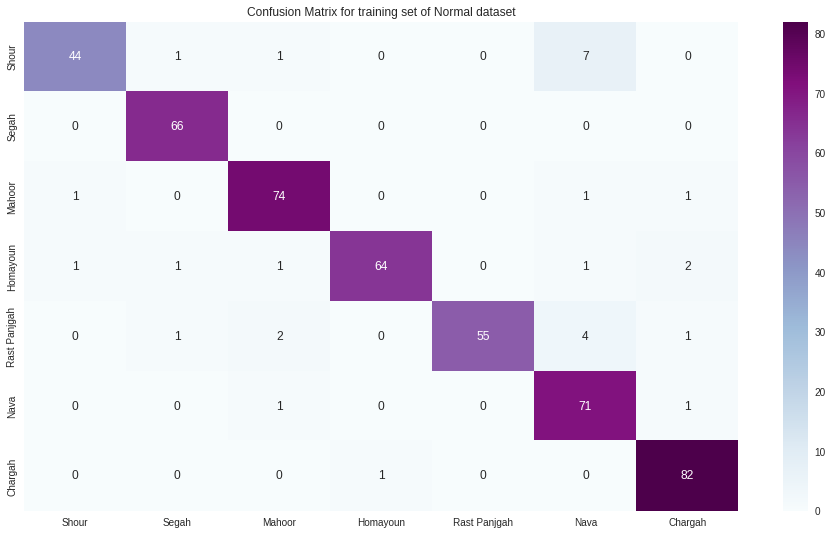

training set accuracy for Normal dataset: 0.9402061855670103
Classification Metrics for training set of Normal dataset
              precision    recall  f1-score   support

           0      0.957     0.830     0.889        53
           1      0.957     1.000     0.978        66
           2      0.937     0.961     0.949        77
           3      0.985     0.914     0.948        70
           4      1.000     0.873     0.932        63
           5      0.845     0.973     0.904        73
           6      0.943     0.988     0.965        83

    accuracy                          0.940       485
   macro avg      0.946     0.934     0.938       485
weighted avg      0.944     0.940     0.940       485



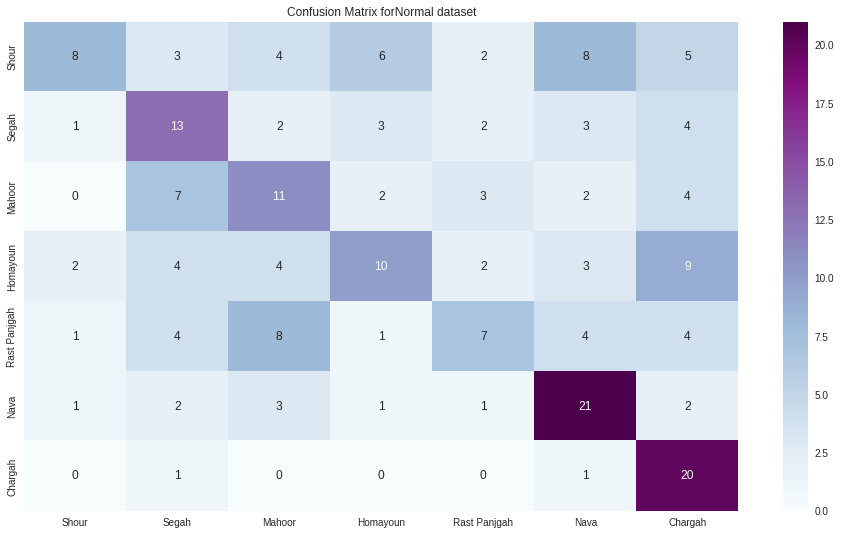

training set accuracy for Normal dataset: 0.430622009569378
Classification Metrics for testing set of Normal dataset
              precision    recall  f1-score   support

           0      0.615     0.222     0.327        36
           1      0.382     0.464     0.419        28
           2      0.344     0.379     0.361        29
           3      0.435     0.294     0.351        34
           4      0.412     0.241     0.304        29
           5      0.500     0.677     0.575        31
           6      0.417     0.909     0.571        22

    accuracy                          0.431       209
   macro avg      0.444     0.455     0.416       209
weighted avg      0.451     0.431     0.407       209



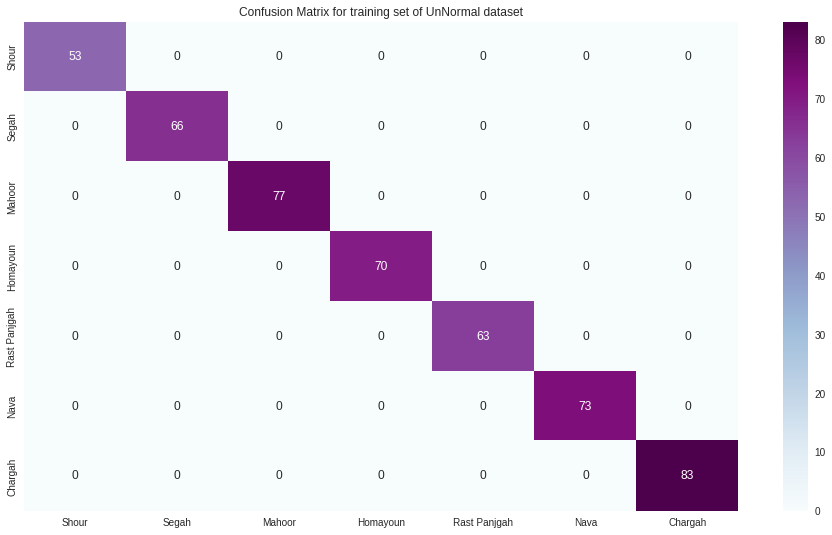

training set accuracy for UnNormal dataset: 1.0
Classification Metrics for training set of UnNormal dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        53
           1      1.000     1.000     1.000        66
           2      1.000     1.000     1.000        77
           3      1.000     1.000     1.000        70
           4      1.000     1.000     1.000        63
           5      1.000     1.000     1.000        73
           6      1.000     1.000     1.000        83

    accuracy                          1.000       485
   macro avg      1.000     1.000     1.000       485
weighted avg      1.000     1.000     1.000       485



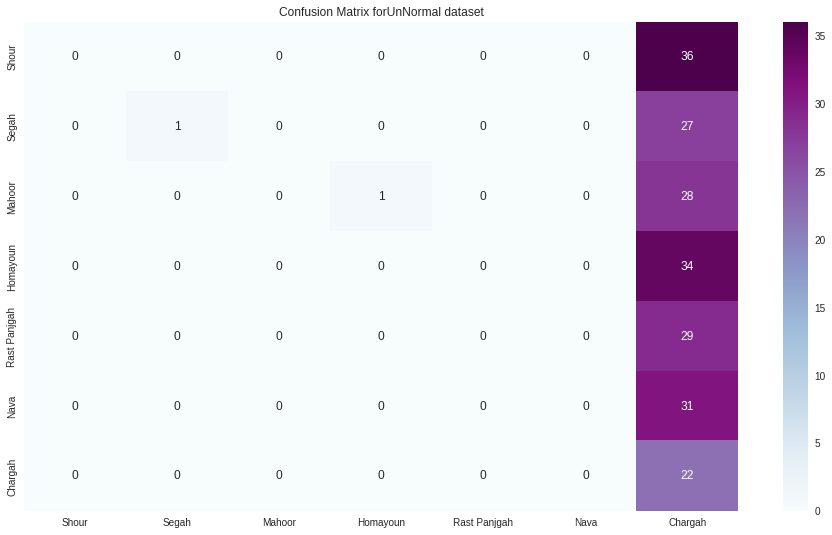

training set accuracy for UnNormal dataset: 0.11004784688995216
Classification Metrics for testing set of UnNormal dataset
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        36
           1      1.000     0.036     0.069        28
           2      0.000     0.000     0.000        29
           3      0.000     0.000     0.000        34
           4      0.000     0.000     0.000        29
           5      0.000     0.000     0.000        31
           6      0.106     1.000     0.192        22

    accuracy                          0.110       209
   macro avg      0.158     0.148     0.037       209
weighted avg      0.145     0.110     0.029       209



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('SVM with kernel RBF  for normalize and unNomalize Dataset')
model  = svm.SVC(kernel="rbf", gamma=0.7, C=1)
ax1 = ROC_plot(model ,input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model ,input_train, target_train,input_test, target_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model , input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names,labels = 'Normal dataset')
predictProba(model , input_train, target_train,input_test, target_test,display_labels = Dastagh_names,labels = 'UnNormal dataset')

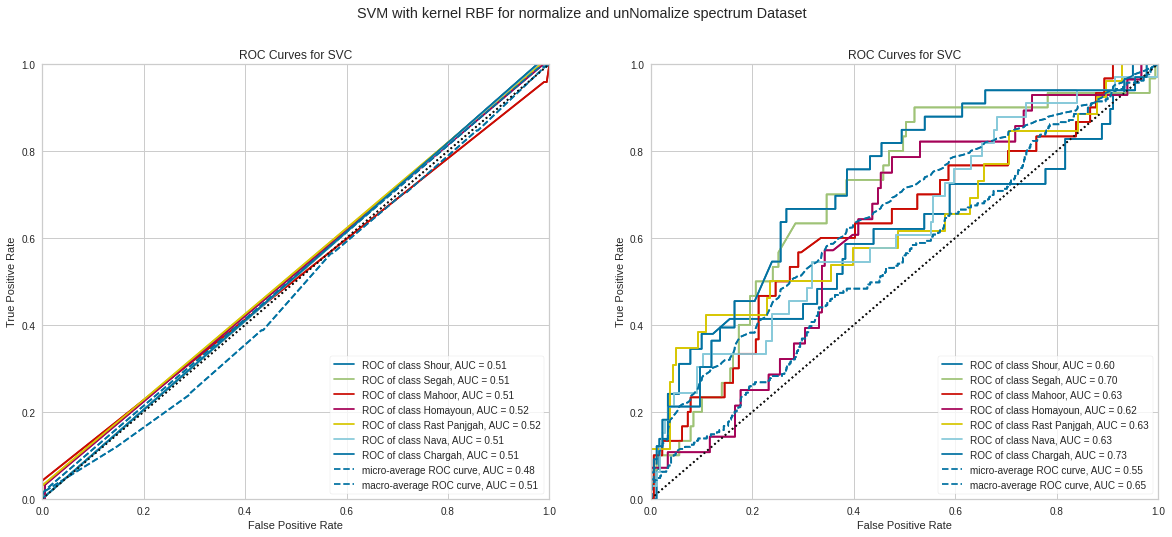

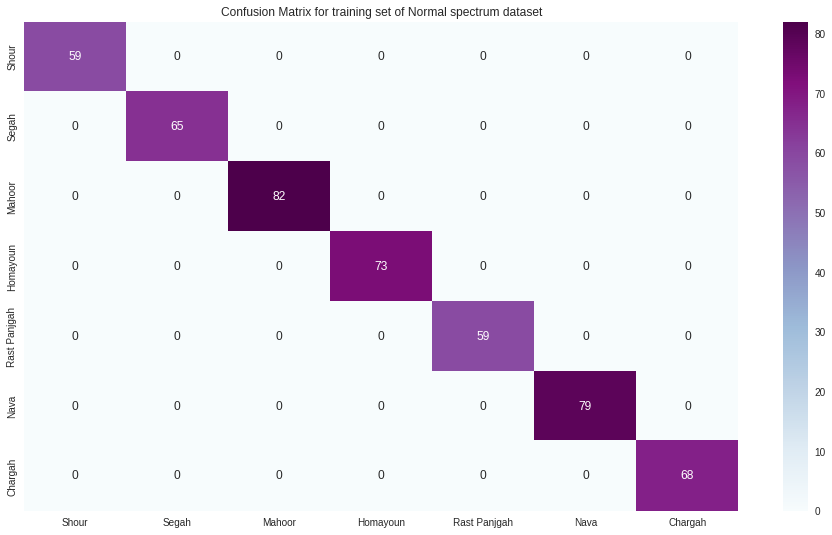

training set accuracy for Normal spectrum dataset: 1.0
Classification Metrics for training set of Normal spectrum dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        59
           1      1.000     1.000     1.000        65
           2      1.000     1.000     1.000        82
           3      1.000     1.000     1.000        73
           4      1.000     1.000     1.000        59
           5      1.000     1.000     1.000        79
           6      1.000     1.000     1.000        68

    accuracy                          1.000       485
   macro avg      1.000     1.000     1.000       485
weighted avg      1.000     1.000     1.000       485



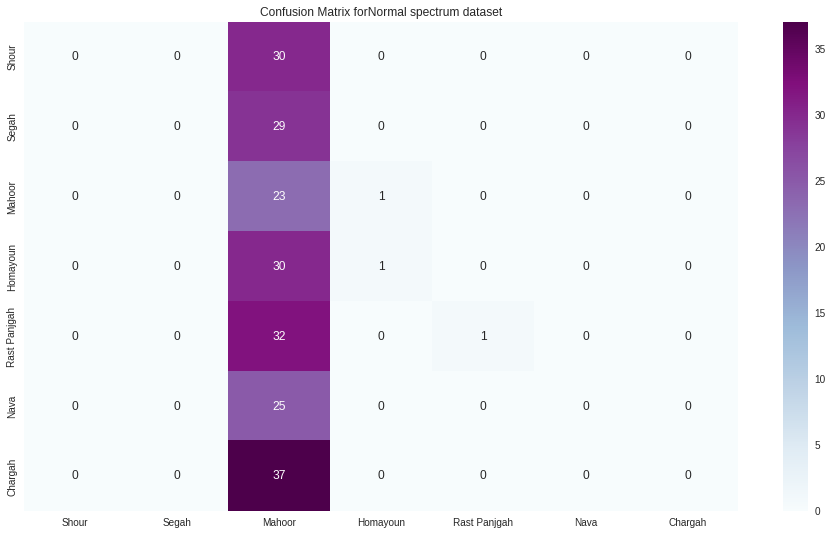

training set accuracy for Normal spectrum dataset: 0.11961722488038277
Classification Metrics for testing set of Normal spectrum dataset
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        30
           1      0.000     0.000     0.000        29
           2      0.112     0.958     0.200        24
           3      0.500     0.032     0.061        31
           4      1.000     0.030     0.059        33
           5      0.000     0.000     0.000        25
           6      0.000     0.000     0.000        37

    accuracy                          0.120       209
   macro avg      0.230     0.146     0.046       209
weighted avg      0.245     0.120     0.041       209



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


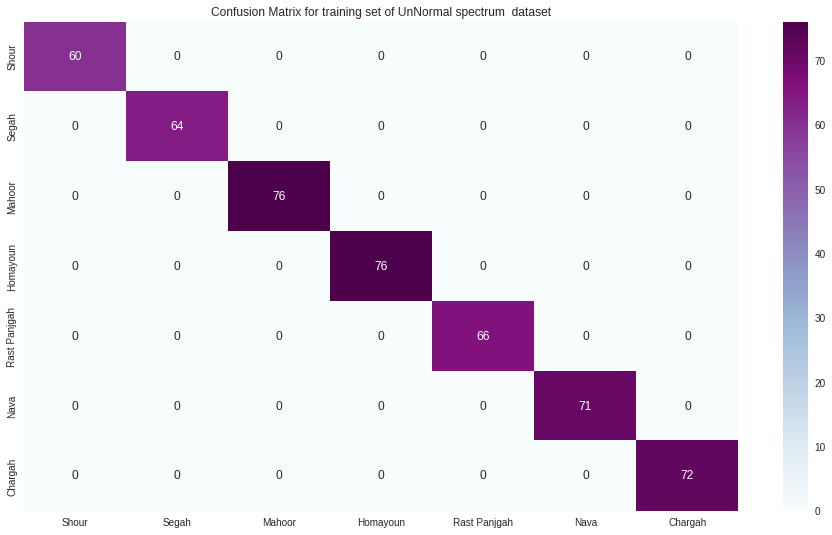

training set accuracy for UnNormal spectrum  dataset: 1.0
Classification Metrics for training set of UnNormal spectrum  dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        60
           1      1.000     1.000     1.000        64
           2      1.000     1.000     1.000        76
           3      1.000     1.000     1.000        76
           4      1.000     1.000     1.000        66
           5      1.000     1.000     1.000        71
           6      1.000     1.000     1.000        72

    accuracy                          1.000       485
   macro avg      1.000     1.000     1.000       485
weighted avg      1.000     1.000     1.000       485



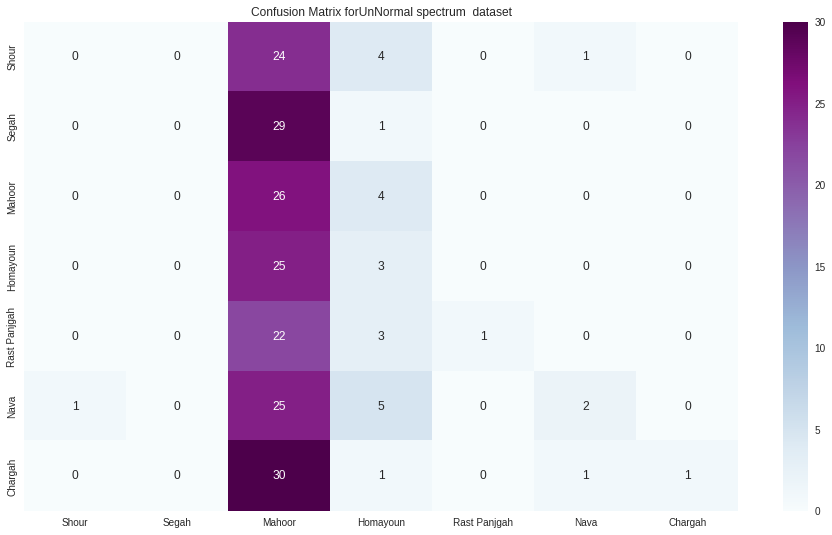

training set accuracy for UnNormal spectrum  dataset: 0.15789473684210525
Classification Metrics for testing set of UnNormal spectrum  dataset
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        29
           1      0.000     0.000     0.000        30
           2      0.144     0.867     0.246        30
           3      0.143     0.107     0.122        28
           4      1.000     0.038     0.074        26
           5      0.500     0.061     0.108        33
           6      1.000     0.030     0.059        33

    accuracy                          0.158       209
   macro avg      0.398     0.158     0.087       209
weighted avg      0.401     0.158     0.087       209



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('SVM with kernel RBF for normalize and unNomalize spectrum Dataset')
model =  svm.SVC(kernel="rbf", gamma=0.7, C=1)
ax1 = ROC_plot(model,input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model,input_spectrum_Normal_train, target_spectrum_Normal_train,input_spectrum_Normal_test, target_spectrum_Normal_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')
predictProba(model, input_spectrum_Normal_train, target_spectrum_Normal_train,input_spectrum_Normal_test, target_spectrum_Normal_test, display_labels = Dastagh_names,labels = 'UnNormal spectrum  dataset')

polynomial SVM

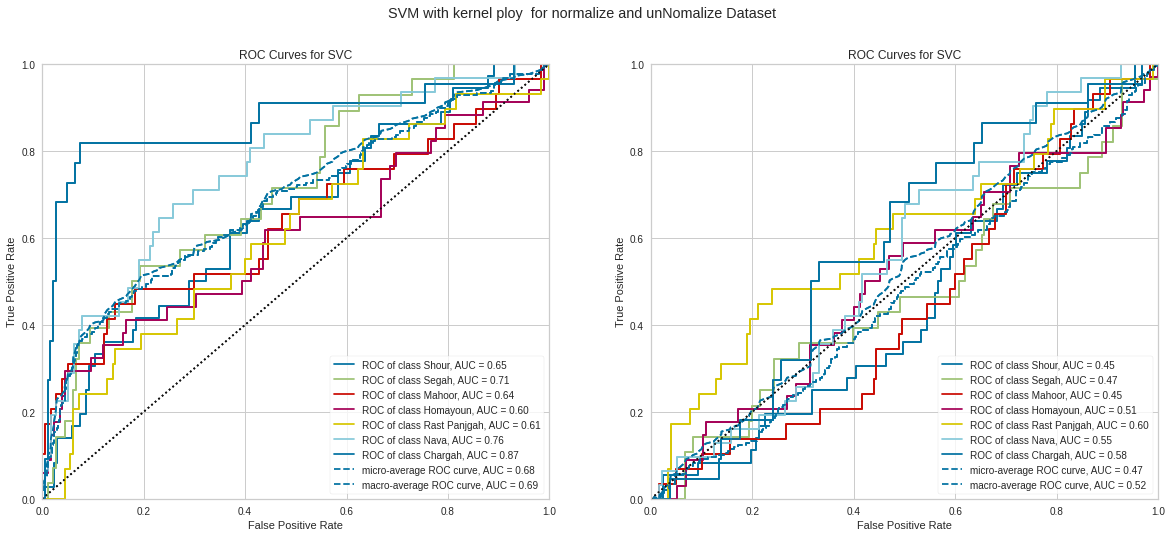

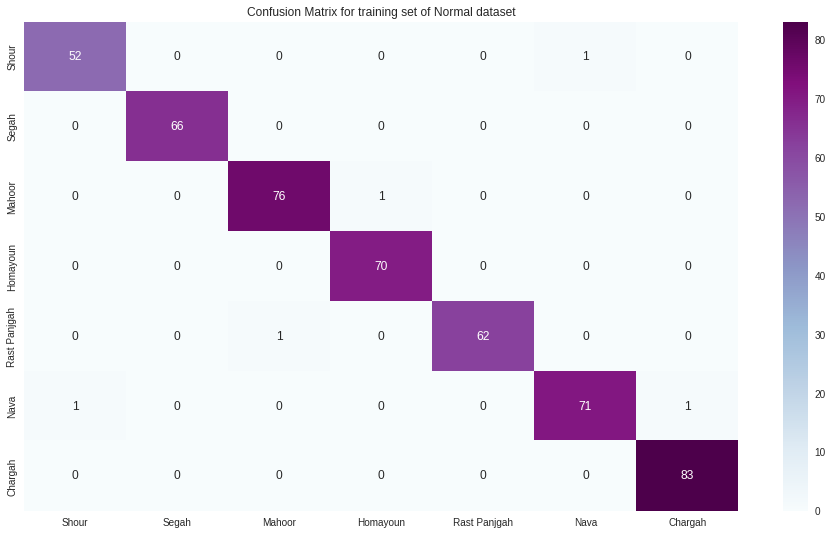

training set accuracy for Normal dataset: 0.9896907216494846
Classification Metrics for training set of Normal dataset
              precision    recall  f1-score   support

           0      0.981     0.981     0.981        53
           1      1.000     1.000     1.000        66
           2      0.987     0.987     0.987        77
           3      0.986     1.000     0.993        70
           4      1.000     0.984     0.992        63
           5      0.986     0.973     0.979        73
           6      0.988     1.000     0.994        83

    accuracy                          0.990       485
   macro avg      0.990     0.989     0.989       485
weighted avg      0.990     0.990     0.990       485



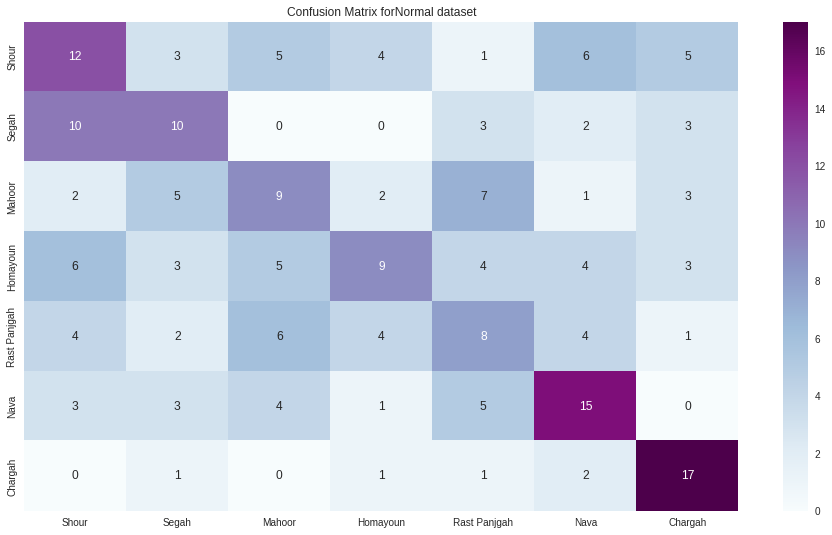

training set accuracy for Normal dataset: 0.3827751196172249
Classification Metrics for testing set of Normal dataset
              precision    recall  f1-score   support

           0      0.324     0.333     0.329        36
           1      0.370     0.357     0.364        28
           2      0.310     0.310     0.310        29
           3      0.429     0.265     0.327        34
           4      0.276     0.276     0.276        29
           5      0.441     0.484     0.462        31
           6      0.531     0.773     0.630        22

    accuracy                          0.383       209
   macro avg      0.383     0.400     0.385       209
weighted avg      0.378     0.383     0.375       209



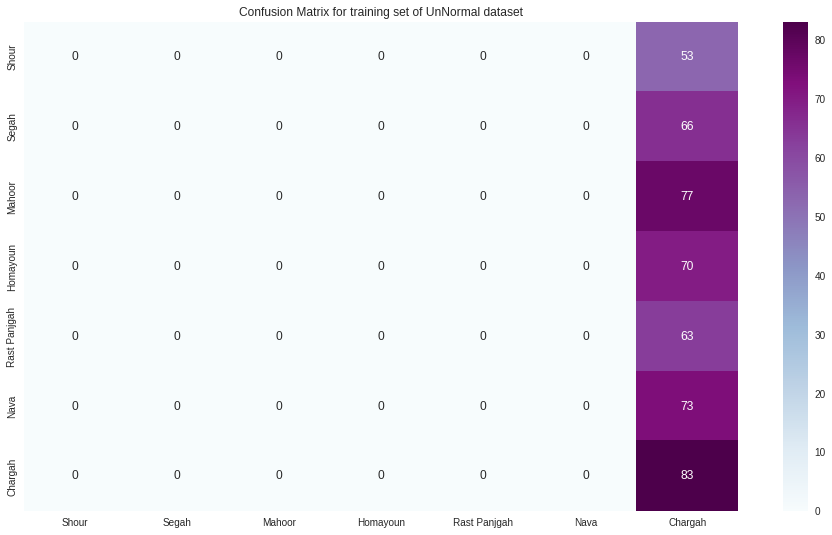

training set accuracy for UnNormal dataset: 0.1711340206185567
Classification Metrics for training set of UnNormal dataset
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        53
           1      0.000     0.000     0.000        66
           2      0.000     0.000     0.000        77
           3      0.000     0.000     0.000        70
           4      0.000     0.000     0.000        63
           5      0.000     0.000     0.000        73
           6      0.171     1.000     0.292        83

    accuracy                          0.171       485
   macro avg      0.024     0.143     0.042       485
weighted avg      0.029     0.171     0.050       485



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


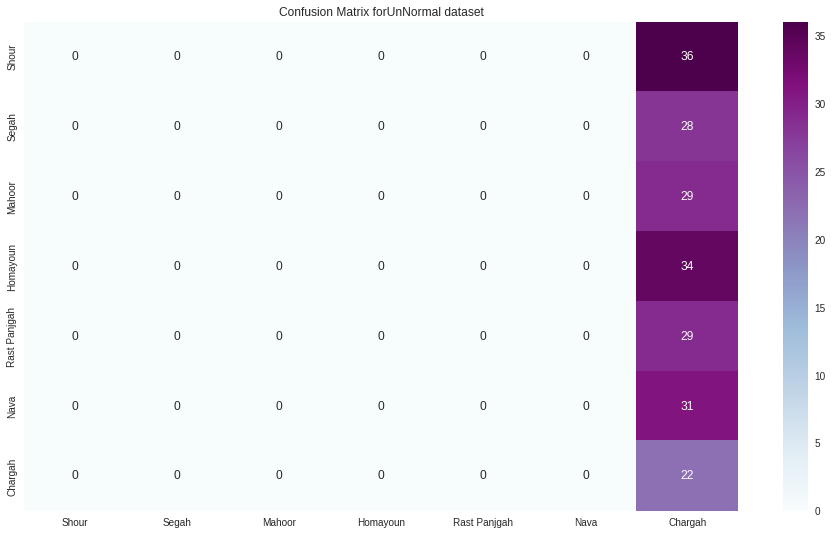

training set accuracy for UnNormal dataset: 0.10526315789473684
Classification Metrics for testing set of UnNormal dataset
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        36
           1      0.000     0.000     0.000        28
           2      0.000     0.000     0.000        29
           3      0.000     0.000     0.000        34
           4      0.000     0.000     0.000        29
           5      0.000     0.000     0.000        31
           6      0.105     1.000     0.190        22

    accuracy                          0.105       209
   macro avg      0.015     0.143     0.027       209
weighted avg      0.011     0.105     0.020       209



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('SVM with kernel ploy  for normalize and unNomalize Dataset')
model  = poly_Svm=svm.SVC(kernel="poly", degree=3, C=1)
ax1 = ROC_plot(model ,input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model ,input_train, target_train,input_test, target_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model , input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names,labels = 'Normal dataset')
predictProba(model , input_train, target_train,input_test, target_test,display_labels = Dastagh_names,labels = 'UnNormal dataset')

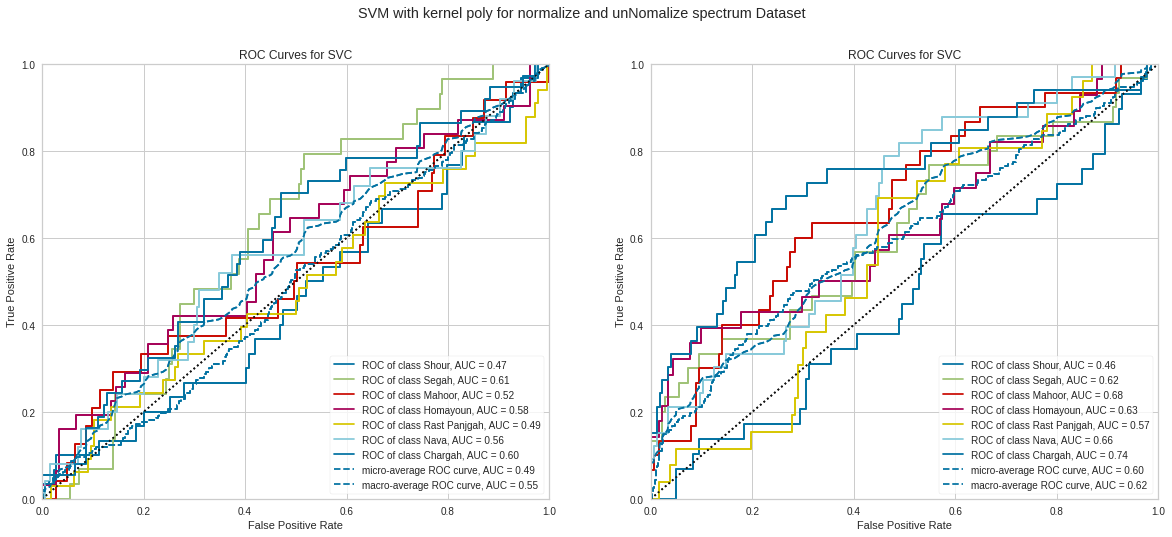

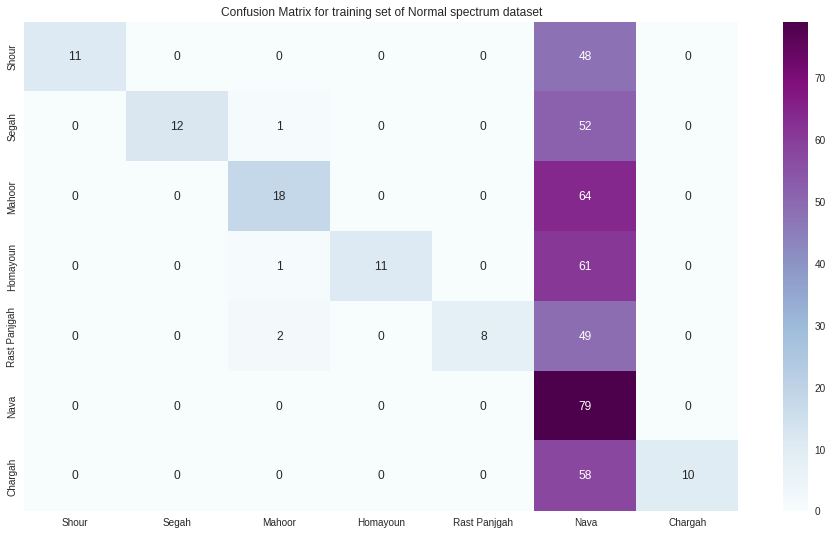

training set accuracy for Normal spectrum dataset: 0.30721649484536084
Classification Metrics for training set of Normal spectrum dataset
              precision    recall  f1-score   support

           0      1.000     0.186     0.314        59
           1      1.000     0.185     0.312        65
           2      0.818     0.220     0.346        82
           3      1.000     0.151     0.262        73
           4      1.000     0.136     0.239        59
           5      0.192     1.000     0.322        79
           6      1.000     0.147     0.256        68

    accuracy                          0.307       485
   macro avg      0.859     0.289     0.293       485
weighted avg      0.838     0.307     0.295       485



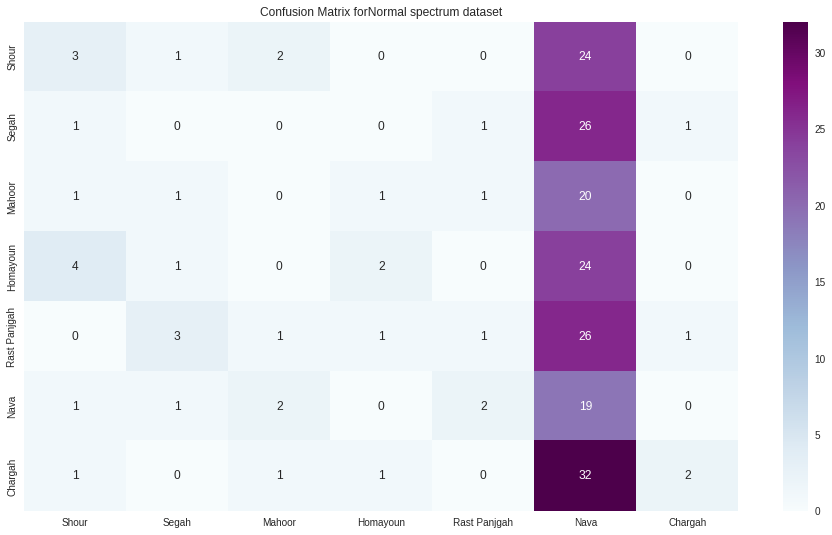

training set accuracy for Normal spectrum dataset: 0.1291866028708134
Classification Metrics for testing set of Normal spectrum dataset
              precision    recall  f1-score   support

           0      0.273     0.100     0.146        30
           1      0.000     0.000     0.000        29
           2      0.000     0.000     0.000        24
           3      0.400     0.065     0.111        31
           4      0.200     0.030     0.053        33
           5      0.111     0.760     0.194        25
           6      0.500     0.054     0.098        37

    accuracy                          0.129       209
   macro avg      0.212     0.144     0.086       209
weighted avg      0.232     0.129     0.086       209



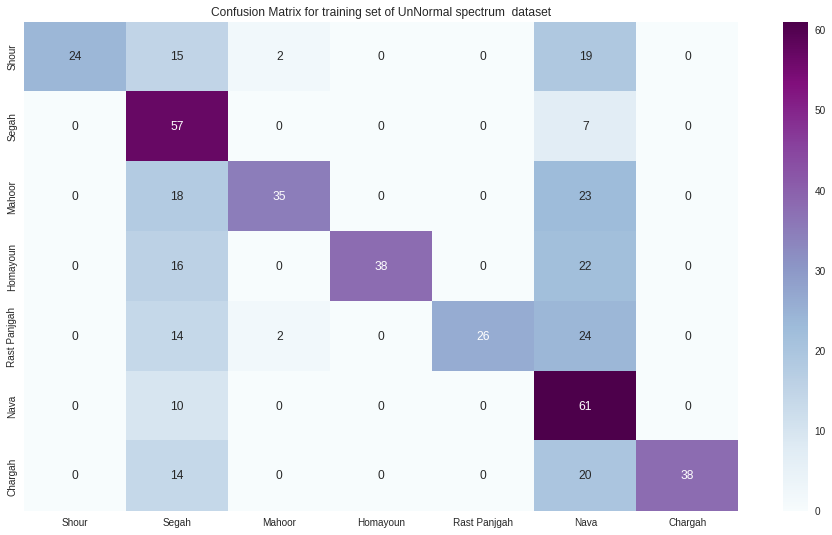

training set accuracy for UnNormal spectrum  dataset: 0.5752577319587628
Classification Metrics for training set of UnNormal spectrum  dataset
              precision    recall  f1-score   support

           0      1.000     0.400     0.571        60
           1      0.396     0.891     0.548        64
           2      0.897     0.461     0.609        76
           3      1.000     0.500     0.667        76
           4      1.000     0.394     0.565        66
           5      0.347     0.859     0.494        71
           6      1.000     0.528     0.691        72

    accuracy                          0.575       485
   macro avg      0.806     0.576     0.592       485
weighted avg      0.809     0.575     0.595       485



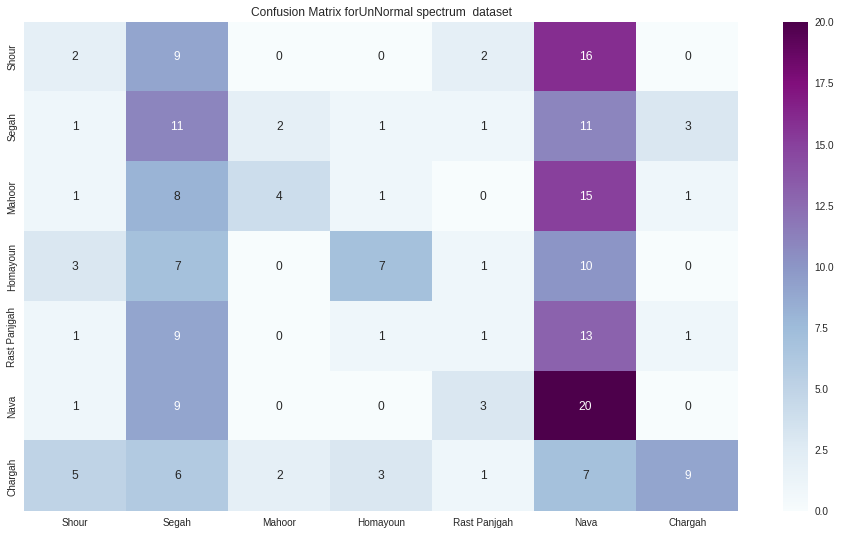

training set accuracy for UnNormal spectrum  dataset: 0.2583732057416268
Classification Metrics for testing set of UnNormal spectrum  dataset
              precision    recall  f1-score   support

           0      0.143     0.069     0.093        29
           1      0.186     0.367     0.247        30
           2      0.500     0.133     0.211        30
           3      0.538     0.250     0.341        28
           4      0.111     0.038     0.057        26
           5      0.217     0.606     0.320        33
           6      0.643     0.273     0.383        33

    accuracy                          0.258       209
   macro avg      0.334     0.248     0.236       209
weighted avg      0.340     0.258     0.242       209



In [73]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('SVM with kernel poly for normalize and unNomalize spectrum Dataset')
model =  poly_Svm=svm.SVC(kernel="poly", degree=3, C=1)
ax1 = ROC_plot(model,input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model,input_spectrum_Normal_train, target_spectrum_Normal_train,input_spectrum_Normal_test, target_spectrum_Normal_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')
predictProba(model, input_spectrum_Normal_train, target_spectrum_Normal_train,input_spectrum_Normal_test, target_spectrum_Normal_test, display_labels = Dastagh_names,labels = 'UnNormal spectrum  dataset')

### Ensemble (XGBoost,SVM kernel RBF, KNN, Logestic Regression)

#### dataset 81 feature

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

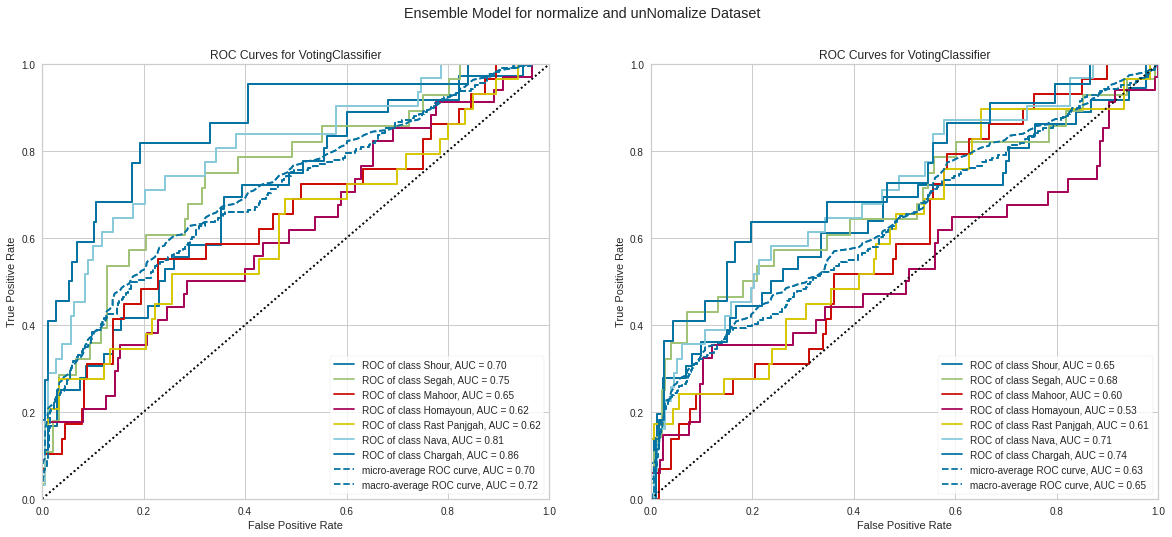

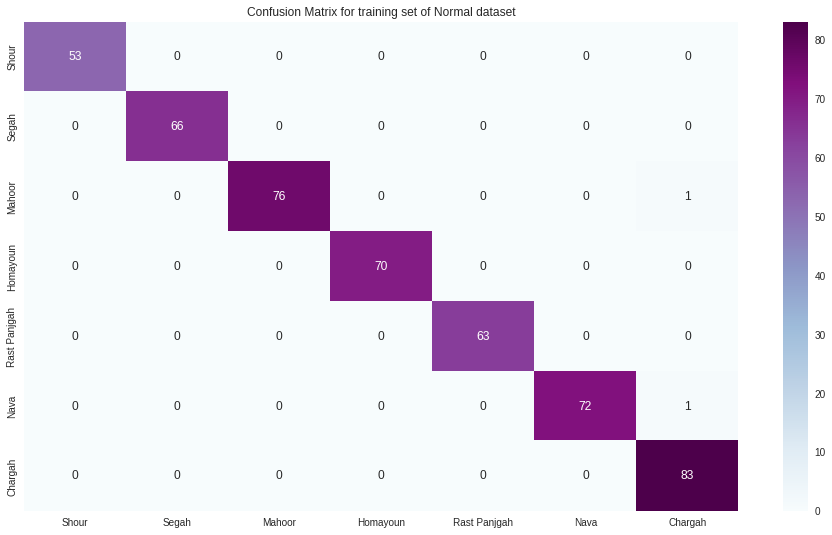

training set accuracy for Normal dataset: 0.9958762886597938
Classification Metrics for training set of Normal dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        53
           1      1.000     1.000     1.000        66
           2      1.000     0.987     0.993        77
           3      1.000     1.000     1.000        70
           4      1.000     1.000     1.000        63
           5      1.000     0.986     0.993        73
           6      0.976     1.000     0.988        83

    accuracy                          0.996       485
   macro avg      0.997     0.996     0.996       485
weighted avg      0.996     0.996     0.996       485



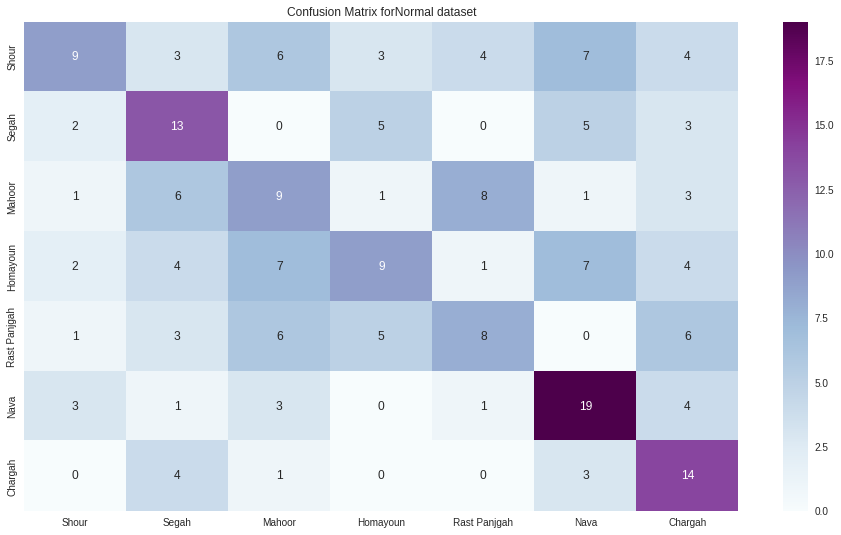

training set accuracy for Normal dataset: 0.3875598086124402
Classification Metrics for testing set of Normal dataset
              precision    recall  f1-score   support

           0      0.500     0.250     0.333        36
           1      0.382     0.464     0.419        28
           2      0.281     0.310     0.295        29
           3      0.391     0.265     0.316        34
           4      0.364     0.276     0.314        29
           5      0.452     0.613     0.521        31
           6      0.368     0.636     0.467        22

    accuracy                          0.388       209
   macro avg      0.391     0.402     0.381       209
weighted avg      0.396     0.388     0.376       209



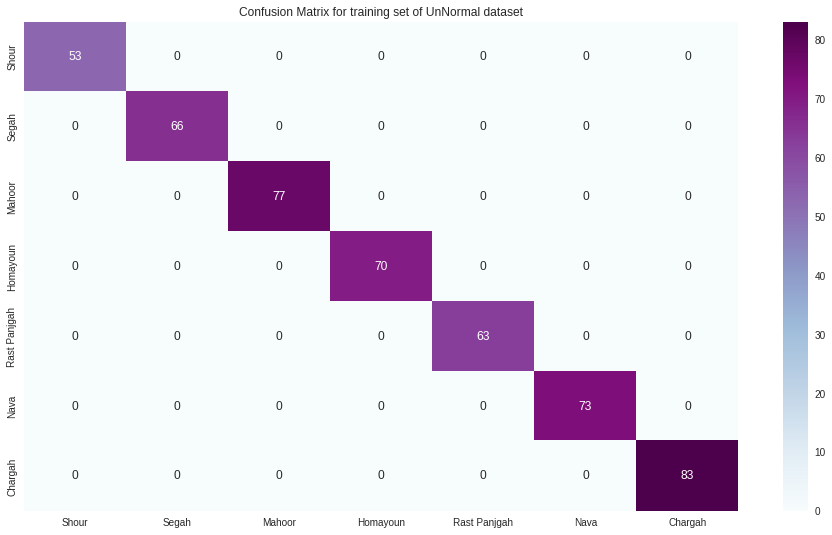

training set accuracy for UnNormal dataset: 1.0
Classification Metrics for training set of UnNormal dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        53
           1      1.000     1.000     1.000        66
           2      1.000     1.000     1.000        77
           3      1.000     1.000     1.000        70
           4      1.000     1.000     1.000        63
           5      1.000     1.000     1.000        73
           6      1.000     1.000     1.000        83

    accuracy                          1.000       485
   macro avg      1.000     1.000     1.000       485
weighted avg      1.000     1.000     1.000       485



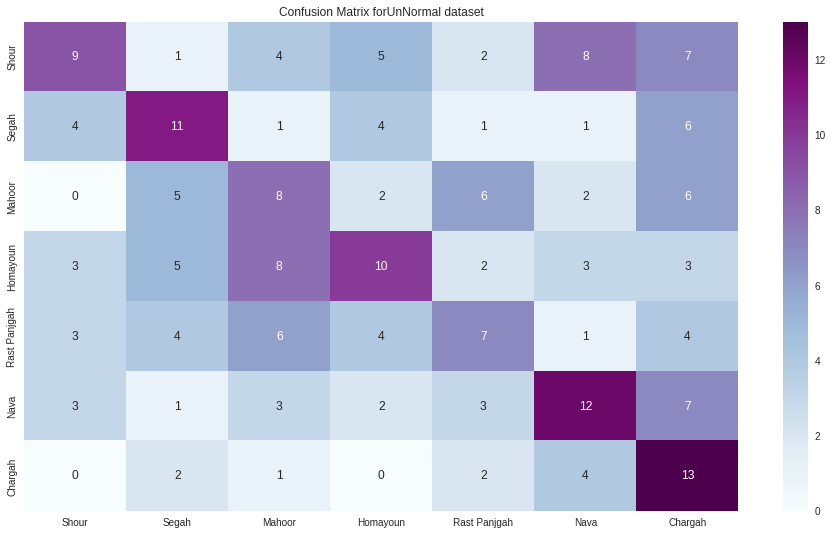

training set accuracy for UnNormal dataset: 0.3349282296650718
Classification Metrics for testing set of UnNormal dataset
              precision    recall  f1-score   support

           0      0.409     0.250     0.310        36
           1      0.379     0.393     0.386        28
           2      0.258     0.276     0.267        29
           3      0.370     0.294     0.328        34
           4      0.304     0.241     0.269        29
           5      0.387     0.387     0.387        31
           6      0.283     0.591     0.382        22

    accuracy                          0.335       209
   macro avg      0.342     0.347     0.333       209
weighted avg      0.347     0.335     0.331       209



In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data

# Training classifiers
clf1 = XGBClassifier(n_estimators=1000,eval_metric='merror')
clf3 = KNeighborsClassifier(n_neighbors=7)
clf4 = SVC(kernel='rbf', probability=True)
clf5 = LogisticRegression(multi_class='multinomial', random_state=1)
model = VotingClassifier(estimators=[('XGB', clf1), ('Knn', clf3), ('SVM_RBF', clf4), ('rl', clf5)], voting='soft' )

fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('Ensemble Model for normalize and unNomalize Dataset')
ax1 = ROC_plot(model ,input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model ,input_train, target_train,input_test, target_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model , input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names,labels = 'Normal dataset')
predictProba(model , input_train, target_train,input_test, target_test,display_labels = Dastagh_names,labels = 'UnNormal dataset')

#### spectrum dataset

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

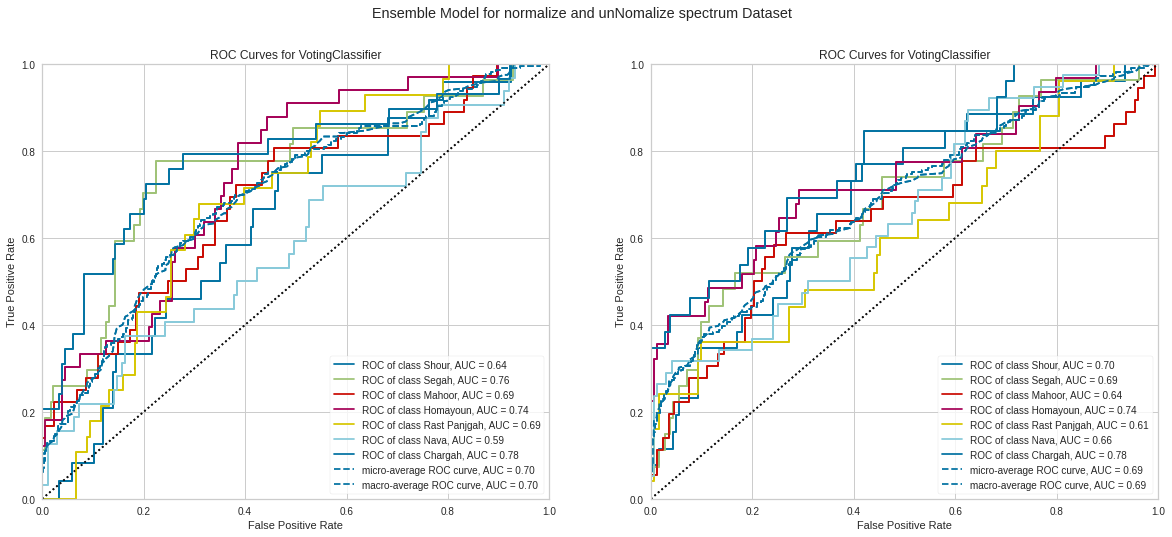

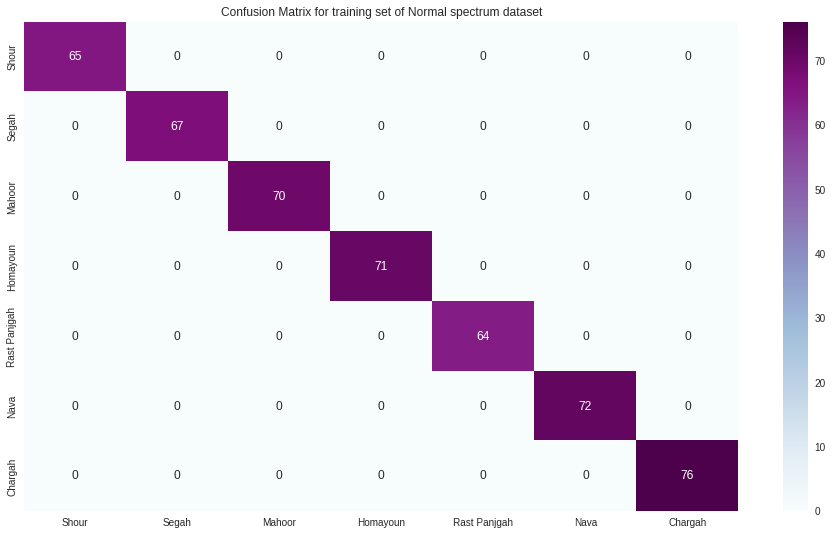

training set accuracy for Normal spectrum dataset: 1.0
Classification Metrics for training set of Normal spectrum dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        65
           1      1.000     1.000     1.000        67
           2      1.000     1.000     1.000        70
           3      1.000     1.000     1.000        71
           4      1.000     1.000     1.000        64
           5      1.000     1.000     1.000        72
           6      1.000     1.000     1.000        76

    accuracy                          1.000       485
   macro avg      1.000     1.000     1.000       485
weighted avg      1.000     1.000     1.000       485



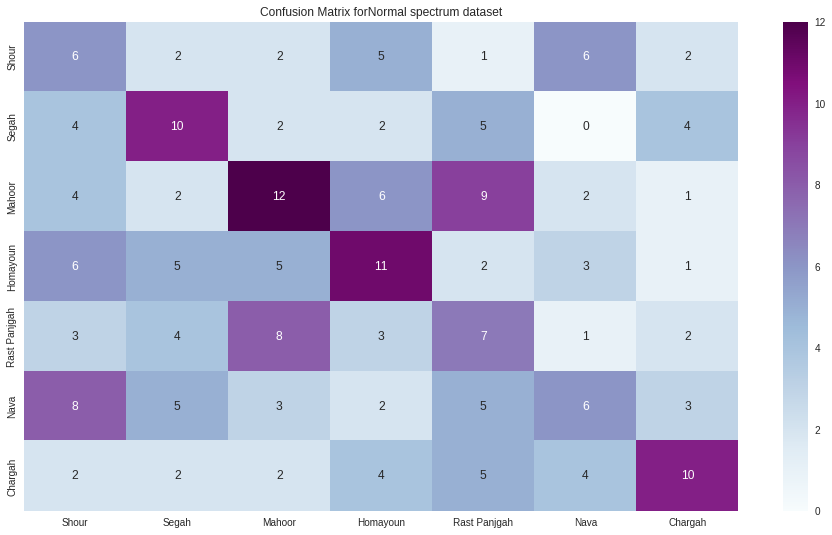

training set accuracy for Normal spectrum dataset: 0.2966507177033493
Classification Metrics for testing set of Normal spectrum dataset
              precision    recall  f1-score   support

           0      0.182     0.250     0.211        24
           1      0.333     0.370     0.351        27
           2      0.353     0.333     0.343        36
           3      0.333     0.333     0.333        33
           4      0.206     0.250     0.226        28
           5      0.273     0.188     0.222        32
           6      0.435     0.345     0.385        29

    accuracy                          0.297       209
   macro avg      0.302     0.296     0.296       209
weighted avg      0.307     0.297     0.299       209



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


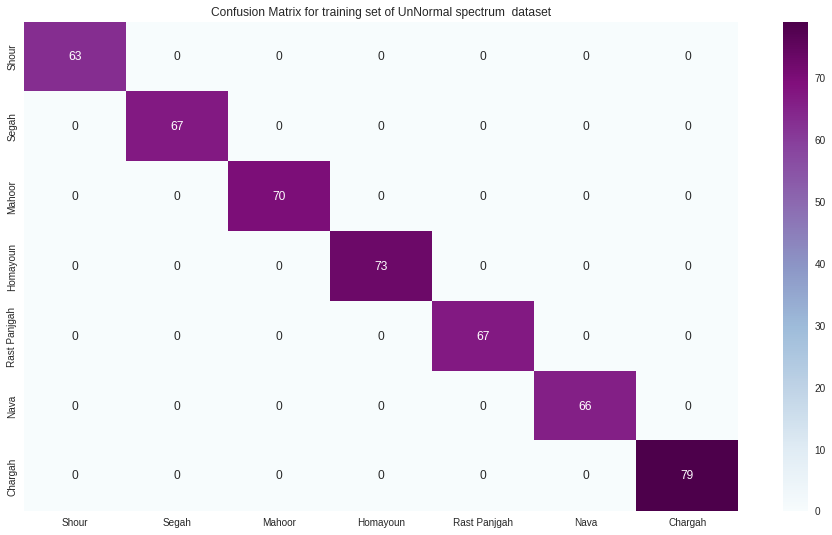

training set accuracy for UnNormal spectrum  dataset: 1.0
Classification Metrics for training set of UnNormal spectrum  dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        63
           1      1.000     1.000     1.000        67
           2      1.000     1.000     1.000        70
           3      1.000     1.000     1.000        73
           4      1.000     1.000     1.000        67
           5      1.000     1.000     1.000        66
           6      1.000     1.000     1.000        79

    accuracy                          1.000       485
   macro avg      1.000     1.000     1.000       485
weighted avg      1.000     1.000     1.000       485



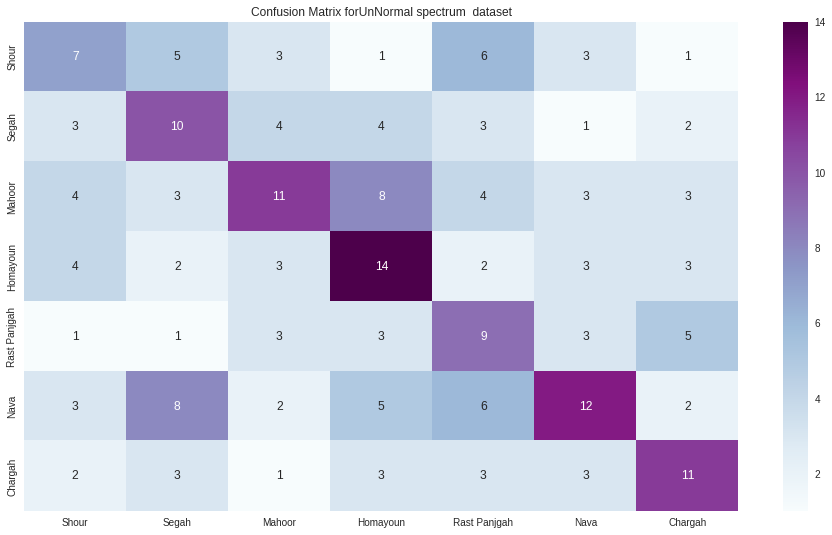

training set accuracy for UnNormal spectrum  dataset: 0.35406698564593303
Classification Metrics for testing set of UnNormal spectrum  dataset
              precision    recall  f1-score   support

           0      0.292     0.269     0.280        26
           1      0.312     0.370     0.339        27
           2      0.407     0.306     0.349        36
           3      0.368     0.452     0.406        31
           4      0.273     0.360     0.310        25
           5      0.429     0.316     0.364        38
           6      0.407     0.423     0.415        26

    accuracy                          0.354       209
   macro avg      0.356     0.357     0.352       209
weighted avg      0.363     0.354     0.354       209



In [188]:
# Training classifiers
clf1 = XGBClassifier(n_estimators=1000,eval_metric='merror')
clf3 = KNeighborsClassifier(n_neighbors=7)
clf4 = SVC(kernel='rbf', probability=True)
clf5 = LogisticRegression(multi_class='multinomial', random_state=1)
model = VotingClassifier(estimators=[('XGB', clf1), ('Knn', clf3), ('SVM_RBF', clf4), ('rl', clf5)], voting='soft' )

fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('Ensemble Model for normalize and unNomalize spectrum Dataset')
ax1 = ROC_plot(model,input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model,input_spectrum_Normal_train, target_spectrum_Normal_train,input_spectrum_Normal_test, target_spectrum_Normal_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')
predictProba(model, input_spectrum_Normal_train, target_spectrum_Normal_train,input_spectrum_Normal_test, target_spectrum_Normal_test, display_labels = Dastagh_names,labels = 'UnNormal spectrum  dataset')

### MLP

#### MLp for Normal dataset 81 features

In [141]:
# one hot vector
target=keras.utils.to_categorical(Labels.values,7)# splitting the data
input_Normal_train, input_Normal_test, target_Normal_train, target_Normal_test = train_test_split(Normalized_Dataset.values, target, test_size=0.3,random_state=42)
input_train=np.expand_dims(input_train, 2) 

In [142]:
#making the model
from keras.layers import Flatten,Dense,Dropout
model = Sequential()
model.add(Flatten(input_shape=(input_train.shape[1:])))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 81)                0         
                                                                 
 dense_84 (Dense)            (None, 512)               41984     
                                                                 
 dropout_39 (Dropout)        (None, 512)               0         
                                                                 
 dense_85 (Dense)            (None, 256)               131328    
                                                                 
 dense_86 (Dense)            (None, 64)                16448     
                                                                 
 dropout_40 (Dropout)        (None, 64)                0         
                                                                 
 dense_87 (Dense)            (None, 7)               

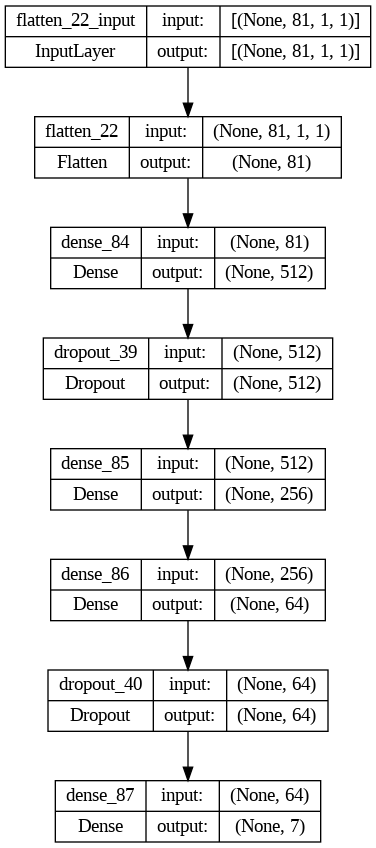

In [143]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [144]:
adam = optimizers.Adam(lr=1e-4)

In [145]:
model.compile(optimizer=adam,
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [146]:
hist = model.fit(input_Normal_train,target_Normal_train,
                 validation_data = (input_Normal_test,target_Normal_test),
                 epochs = 100,
                 batch_size = 32)

Epoch 1/100


11/16 [===================>..........] - ETA: 0s - loss: 1.9751 - accuracy: 0.1449 

16/16 [==============================] - 1s 20ms/step - loss: 1.9688 - accuracy: 0.1485 - val_loss: 1.9752 - val_accuracy: 0.1053
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 1.9375 - accuracy: 0.1711 - val_loss: 1.9534 - val_accuracy: 0.1483
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 1.9343 - accuracy: 0.1691 - val_loss: 1.9582 - val_accuracy: 0.1388
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 1.9277 - accuracy: 0.2021 - val_loss: 1.9362 - val_accuracy: 0.2057
Epoch 5/100
16/16 [==============================] - 0s 10ms/step - loss: 1.8931 - accuracy: 0.2474 - val_loss: 1.9640 - val_accuracy: 0.1770
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 1.8934 - accuracy: 0.2165 - val_loss: 1.9353 - val_accuracy: 0.1818
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 1.8725 - accuracy: 0.2227 - val_loss: 1.9301 - val_accuracy: 0.2010
Epoch 8/100
16/16 [====

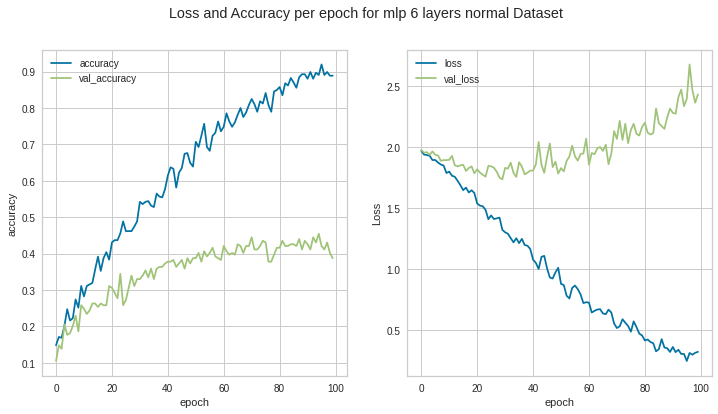

In [147]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
fig.suptitle("Loss and Accuracy per epoch for mlp 6 layers normal Dataset")
ax1.plot(hist.history['accuracy'],label= 'accuracy')
ax1.plot(hist.history['val_accuracy'],label = 'val_accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend()
ax2.plot(hist.history['loss'],label = 'loss')
ax2.plot(hist.history['val_loss'],label = 'val_loss')
_ = ax2.set_ylabel('Loss')
_ = ax2.set_xlabel('epoch')
_ =ax2.legend()

7/7 [==============================] - 0s 2ms/step


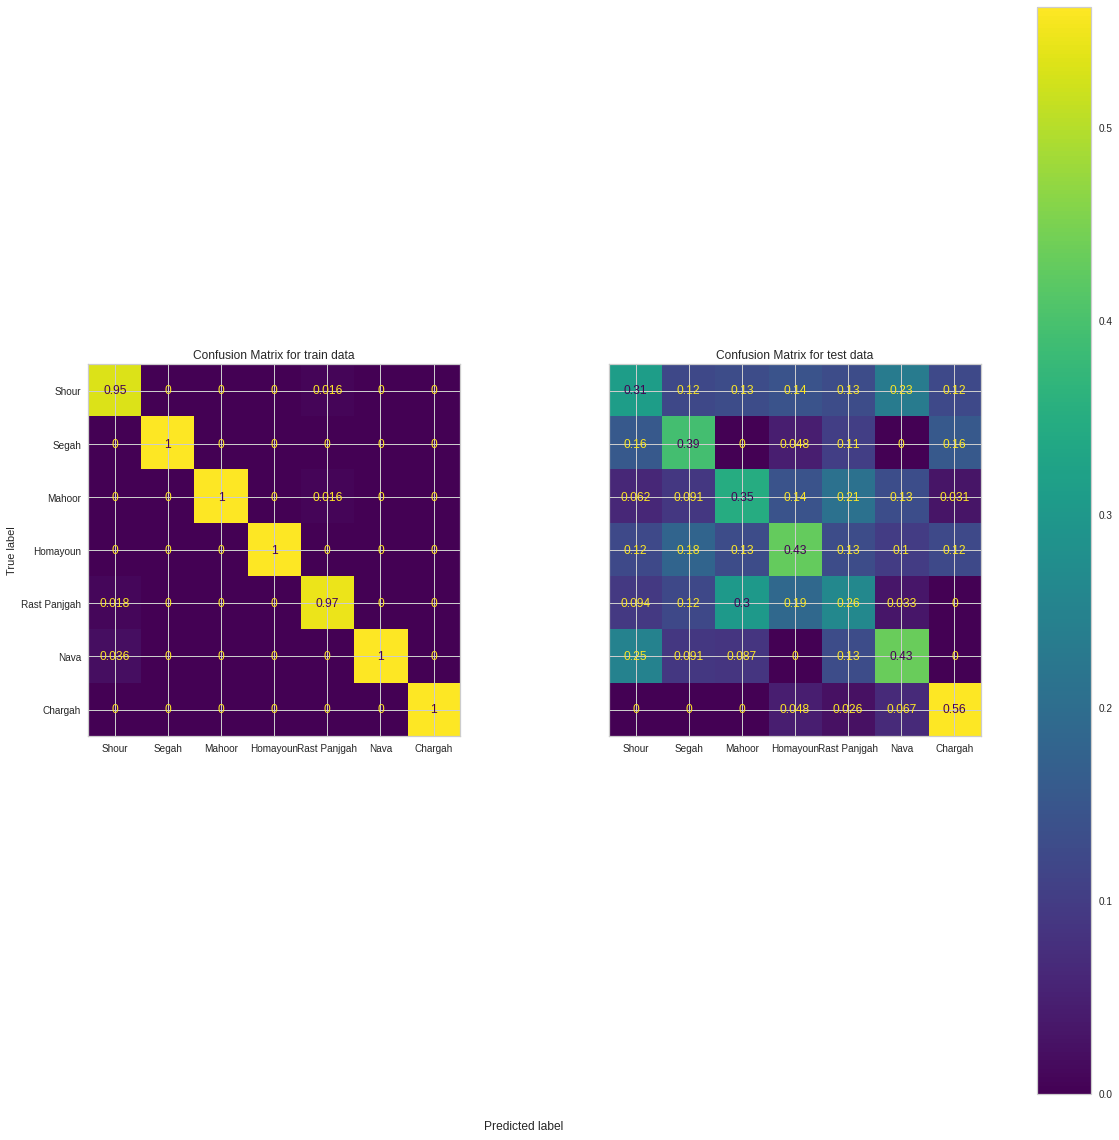

In [148]:
f, axarr = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(20, 20))
data=[input_Normal_train,input_Normal_test]
targets=[target_Normal_train,target_Normal_test]
cof=["Confusion Matrix for train data","Confusion Matrix for test data"]
for i in range(2):
    y_pred=np.argmax(model.predict(data[i]),axis=1)
    result = confusion_matrix(np.argmax(targets[i],axis=1), y_pred , normalize='pred')
    disp = ConfusionMatrixDisplay(confusion_matrix=result,display_labels=Dastagh_names)
    disp.plot(ax= axarr[i])
    disp.ax_.set_title(cof[i])
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axarr)
plt.show()

#### MLP for UnNormal dataset 81 features

In [149]:
target=keras.utils.to_categorical(Labels.values,7)# splitting the data
input_train, input_test, target_train, target_test = train_test_split(Dataset.values, target, test_size=0.3,random_state=42)
input_train=np.expand_dims(input_train, 2) 

In [150]:
#making the model
from keras.layers import Flatten,Dense,Dropout
model = Sequential()
model.add(Flatten(input_shape=(input_train.shape[1:])))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 81)                0         
                                                                 
 dense_88 (Dense)            (None, 512)               41984     
                                                                 
 dropout_41 (Dropout)        (None, 512)               0         
                                                                 
 dense_89 (Dense)            (None, 256)               131328    
                                                                 
 dense_90 (Dense)            (None, 64)                16448     
                                                                 
 dropout_42 (Dropout)        (None, 64)                0         
                                                                 
 dense_91 (Dense)            (None, 7)               

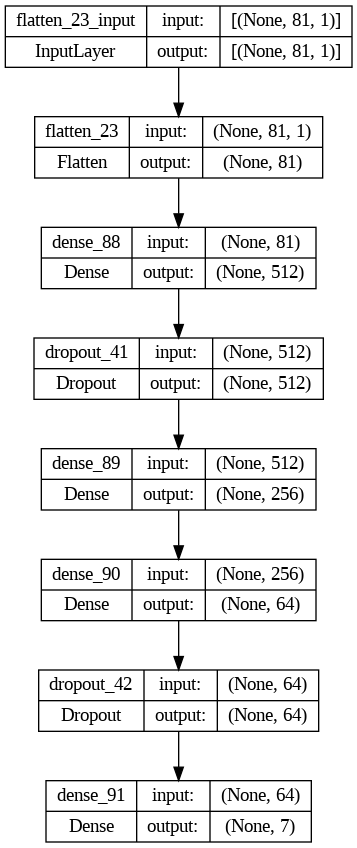

In [151]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [152]:
adam = optimizers.Adam(lr=1e-4)
model.compile(optimizer=adam,
             loss="categorical_crossentropy",
             metrics=["accuracy"])
hist = model.fit(input_train,target_train,
                 validation_data = (input_test,target_test),
                 epochs = 100,
                 batch_size = 32)

Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 18940.8281 - accuracy: 0.1381 - val_loss: 5801.3647 - val_accuracy: 0.1053
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 3504.6113 - accuracy: 0.1299 - val_loss: 1.9455 - val_accuracy: 0.1627
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 153.1717 - accuracy: 0.1423 - val_loss: 1.9456 - val_accuracy: 0.1627
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 13.1124 - accuracy: 0.1443 - val_loss: 1.9458 - val_accuracy: 0.1627
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 2.6273 - accuracy: 0.1464 - val_loss: 1.9460 - val_accuracy: 0.1627
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 1.9447 - accuracy: 0.1443 - val_loss: 1.9464 - val_accuracy: 0.1627
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 7.7231 - accuracy: 0.1443 - val_loss: 1.9468 - val_accuracy: 0.1627

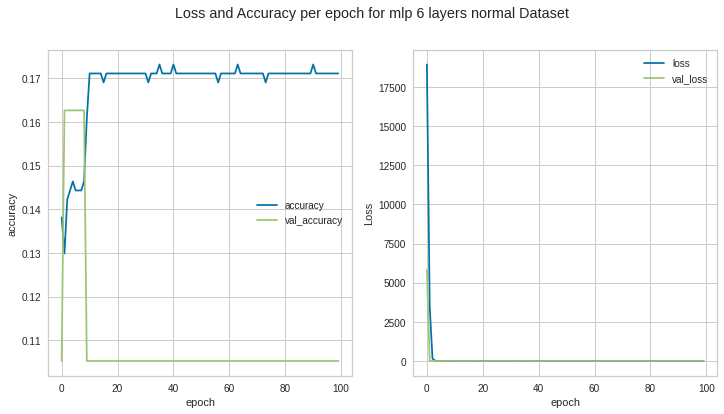

In [153]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
fig.suptitle("Loss and Accuracy per epoch for mlp 6 layers normal Dataset")
ax1.plot(hist.history['accuracy'],label= 'accuracy')
ax1.plot(hist.history['val_accuracy'],label = 'val_accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend()
ax2.plot(hist.history['loss'],label = 'loss')
ax2.plot(hist.history['val_loss'],label = 'val_loss')
_ = ax2.set_ylabel('Loss')
_ = ax2.set_xlabel('epoch')
_ =ax2.legend()

7/7 [==============================] - 0s 2ms/step


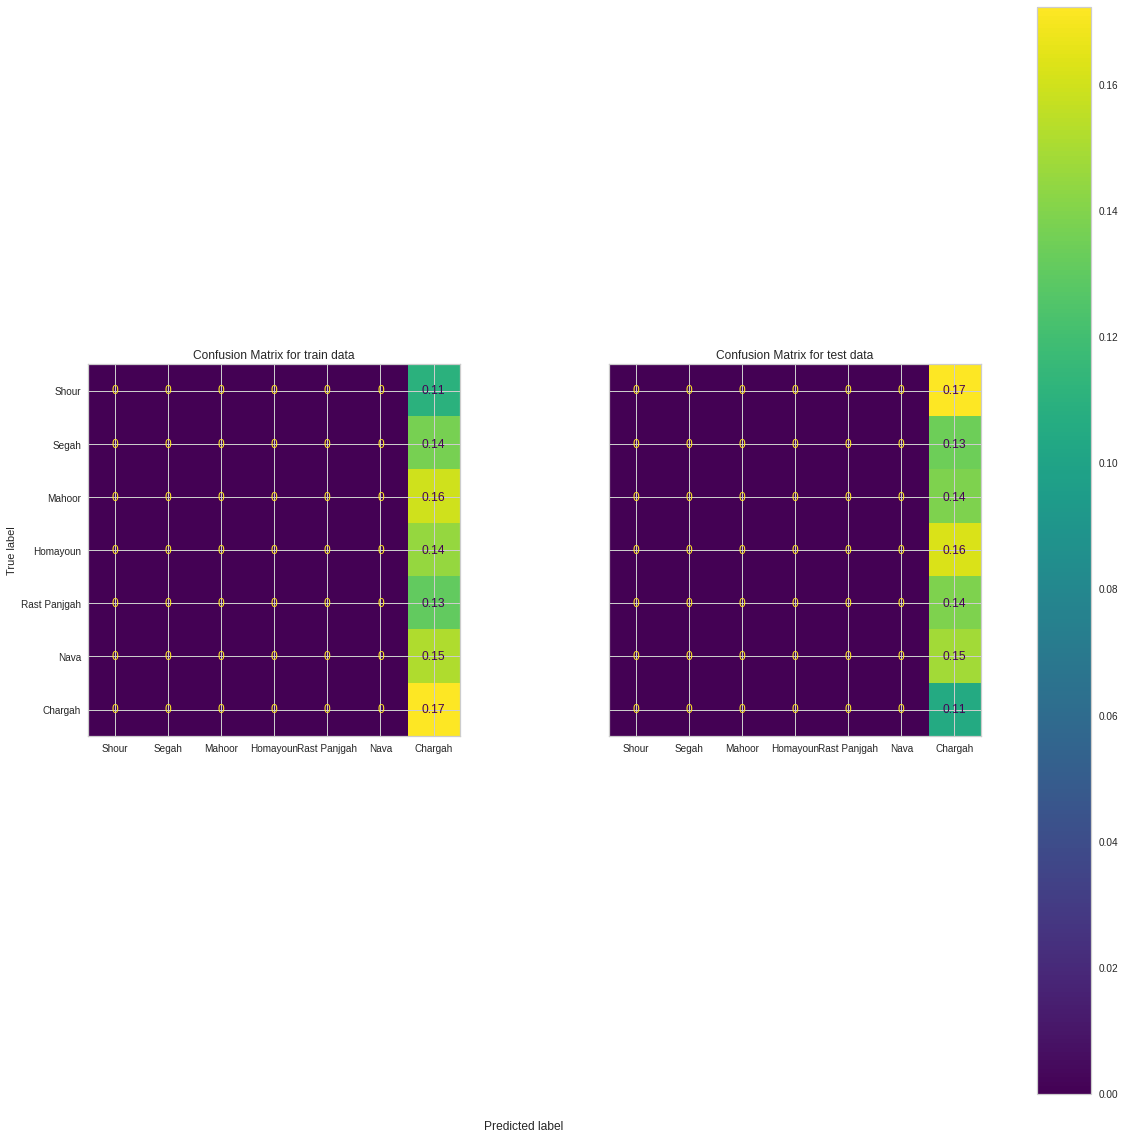

In [154]:
f, axarr = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(20, 20))
data=[input_train,input_test]
targets=[target_train,target_test]
cof=["Confusion Matrix for train data","Confusion Matrix for test data"]
for i in range(2):
    y_pred=np.argmax(model.predict(data[i]),axis=1)
    result = confusion_matrix(np.argmax(targets[i],axis=1), y_pred , normalize='pred')
    disp = ConfusionMatrixDisplay(confusion_matrix=result,display_labels=Dastagh_names)
    disp.plot(ax= axarr[i])
    disp.ax_.set_title(cof[i])
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axarr)
plt.show()

#### MLP for Normal spectrum dataset 

In [155]:
# one hot vector
target=keras.utils.to_categorical(Labels.values,7)# splitting the data
input_Normal_train, input_Normal_test, target_Normal_train, target_Normal_test= train_test_split(Normalized_Dataset_spectrum.values, target, test_size=0.3,random_state=42)


In [156]:
#making the model
from keras.layers import Flatten,Dense,Dropout
model = Sequential()
model.add(Flatten(input_shape=(input_Normal_train.shape[1:])))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 3076)              0         
                                                                 
 dense_92 (Dense)            (None, 512)               1575424   
                                                                 
 dropout_43 (Dropout)        (None, 512)               0         
                                                                 
 dense_93 (Dense)            (None, 256)               131328    
                                                                 
 dense_94 (Dense)            (None, 64)                16448     
                                                                 
 dropout_44 (Dropout)        (None, 64)                0         
                                                                 
 dense_95 (Dense)            (None, 7)               

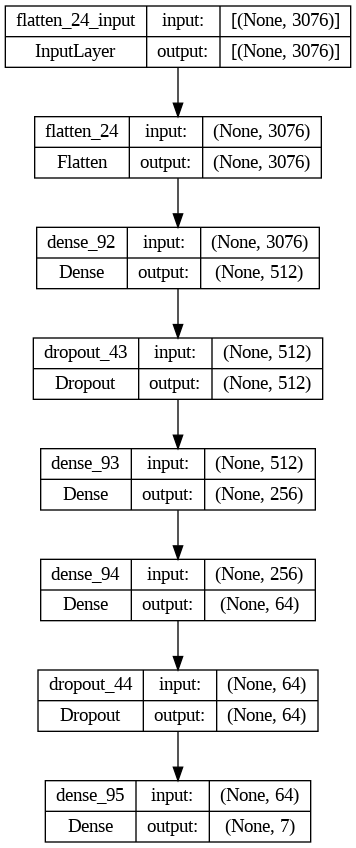

In [157]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [158]:
adam = optimizers.Adam(lr=1e-4)
model.compile(optimizer=adam,
             loss="categorical_crossentropy",
             metrics=["accuracy"])
hist = model.fit(input_Normal_train,target_Normal_train,
                 validation_data = (input_Normal_test,target_Normal_test),
                 epochs = 100,
                 batch_size = 32)

Epoch 1/100
16/16 [==============================] - 1s 36ms/step - loss: 2.0080 - accuracy: 0.1835 - val_loss: 1.9656 - val_accuracy: 0.1483
Epoch 2/100
16/16 [==============================] - 0s 20ms/step - loss: 1.9598 - accuracy: 0.1546 - val_loss: 1.9553 - val_accuracy: 0.1770
Epoch 3/100
16/16 [==============================] - 0s 21ms/step - loss: 1.9484 - accuracy: 0.1423 - val_loss: 1.9767 - val_accuracy: 0.1627
Epoch 4/100
16/16 [==============================] - 0s 24ms/step - loss: 1.9148 - accuracy: 0.1938 - val_loss: 1.9480 - val_accuracy: 0.1770
Epoch 5/100
16/16 [==============================] - 0s 24ms/step - loss: 1.8794 - accuracy: 0.2247 - val_loss: 1.9803 - val_accuracy: 0.1866
Epoch 6/100
16/16 [==============================] - 0s 26ms/step - loss: 1.8680 - accuracy: 0.2495 - val_loss: 1.9736 - val_accuracy: 0.1962
Epoch 7/100
16/16 [==============================] - 0s 17ms/step - loss: 1.8804 - accuracy: 0.2289 - val_loss: 1.9588 - val_accuracy: 0.1627
Epoch 

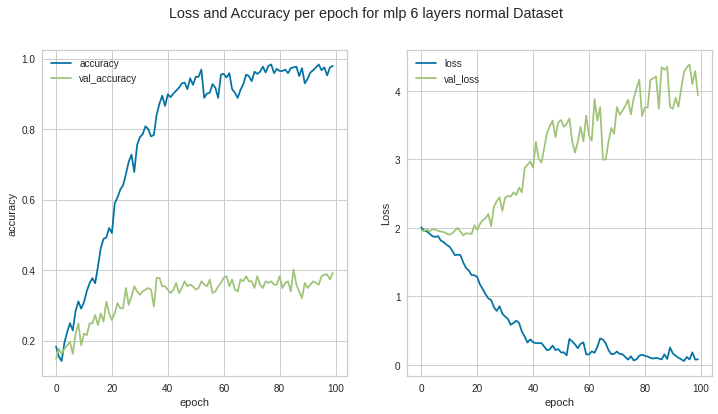

In [159]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
fig.suptitle("Loss and Accuracy per epoch for mlp 6 layers normal Dataset")
ax1.plot(hist.history['accuracy'],label= 'accuracy')
ax1.plot(hist.history['val_accuracy'],label = 'val_accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend()
ax2.plot(hist.history['loss'],label = 'loss')
ax2.plot(hist.history['val_loss'],label = 'val_loss')
_ = ax2.set_ylabel('Loss')
_ = ax2.set_xlabel('epoch')
_ =ax2.legend()


7/7 [==============================] - 0s 6ms/step


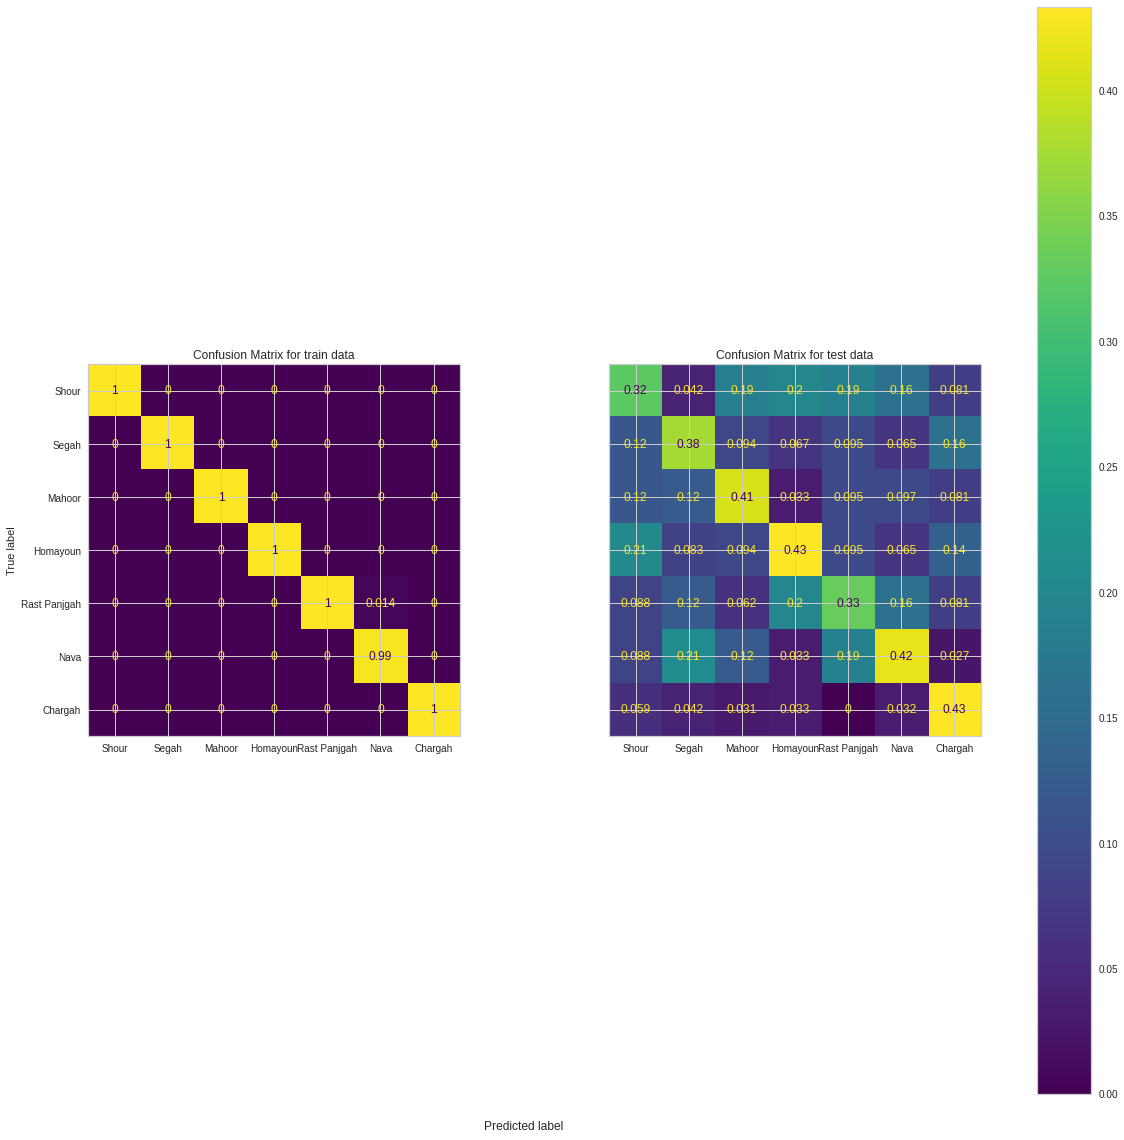

In [160]:
f, axarr = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(20, 20))
data=[input_Normal_train,input_Normal_test]
targets=[target_Normal_train,target_Normal_test]
cof=["Confusion Matrix for train data","Confusion Matrix for test data"]
for i in range(2):
    y_pred=np.argmax(model.predict(data[i]),axis=1)
    result = confusion_matrix(np.argmax(targets[i],axis=1), y_pred , normalize='pred')
    disp = ConfusionMatrixDisplay(confusion_matrix=result,display_labels=Dastagh_names)
    disp.plot(ax= axarr[i])
    disp.ax_.set_title(cof[i])
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axarr)
plt.show()

#### MLP for UnNormal spectrum dataset 

In [161]:
# one hot vector
target=keras.utils.to_categorical(Labels.values,7)# splitting the data
input_Normal_train, input_Normal_test, target_Normal_train, target_Normal_test= train_test_split(Dataset_spectrum.values, target, test_size=0.3,random_state=42)


In [162]:
#making the model
from keras.layers import Flatten,Dense,Dropout
model = Sequential()
model.add(Flatten(input_shape=(input_Normal_train.shape[1:])))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 3076)              0         
                                                                 
 dense_96 (Dense)            (None, 512)               1575424   
                                                                 
 dropout_45 (Dropout)        (None, 512)               0         
                                                                 
 dense_97 (Dense)            (None, 256)               131328    
                                                                 
 dense_98 (Dense)            (None, 64)                16448     
                                                                 
 dropout_46 (Dropout)        (None, 64)                0         
                                                                 
 dense_99 (Dense)            (None, 7)               

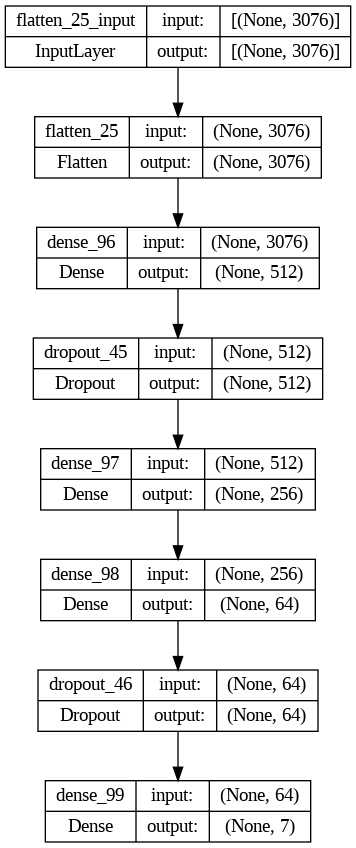

In [163]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [164]:
adam = optimizers.Adam(lr=1e-4)
model.compile(optimizer=adam,
             loss="categorical_crossentropy",
             metrics=["accuracy"])
hist = model.fit(input_Normal_train,target_Normal_train,
                 validation_data = (input_Normal_test,target_Normal_test),
                 epochs = 100,
                 batch_size = 32)

Epoch 1/100
16/16 [==============================] - 2s 25ms/step - loss: 12.3435 - accuracy: 0.1629 - val_loss: 3.1008 - val_accuracy: 0.1388
Epoch 2/100
16/16 [==============================] - 0s 15ms/step - loss: 3.3681 - accuracy: 0.1423 - val_loss: 1.9461 - val_accuracy: 0.1627
Epoch 3/100
16/16 [==============================] - 0s 18ms/step - loss: 2.0602 - accuracy: 0.1464 - val_loss: 1.9465 - val_accuracy: 0.1627
Epoch 4/100
16/16 [==============================] - 0s 23ms/step - loss: 1.9582 - accuracy: 0.1402 - val_loss: 1.9468 - val_accuracy: 0.1627
Epoch 5/100
16/16 [==============================] - 0s 18ms/step - loss: 1.9524 - accuracy: 0.1629 - val_loss: 1.9470 - val_accuracy: 0.1053
Epoch 6/100
16/16 [==============================] - 0s 16ms/step - loss: 1.9466 - accuracy: 0.1711 - val_loss: 1.9475 - val_accuracy: 0.1053
Epoch 7/100
16/16 [==============================] - 0s 20ms/step - loss: 1.9438 - accuracy: 0.1691 - val_loss: 1.9478 - val_accuracy: 0.1053
Epoch

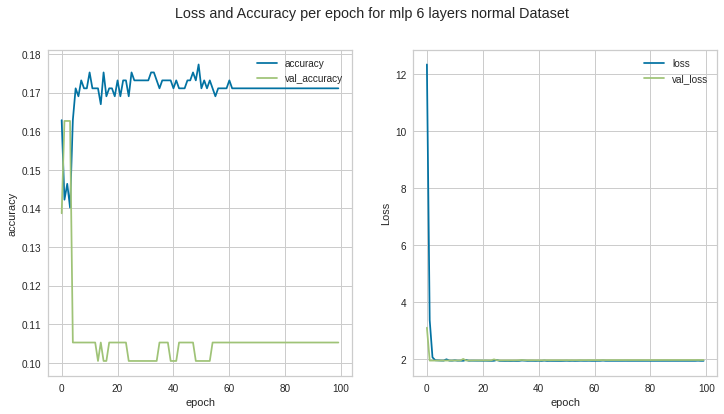

In [165]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
fig.suptitle("Loss and Accuracy per epoch for mlp 6 layers normal Dataset")
ax1.plot(hist.history['accuracy'],label= 'accuracy')
ax1.plot(hist.history['val_accuracy'],label = 'val_accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend()
ax2.plot(hist.history['loss'],label = 'loss')
ax2.plot(hist.history['val_loss'],label = 'val_loss')
_ = ax2.set_ylabel('Loss')
_ = ax2.set_xlabel('epoch')
_ =ax2.legend()


7/7 [==============================] - 0s 6ms/step


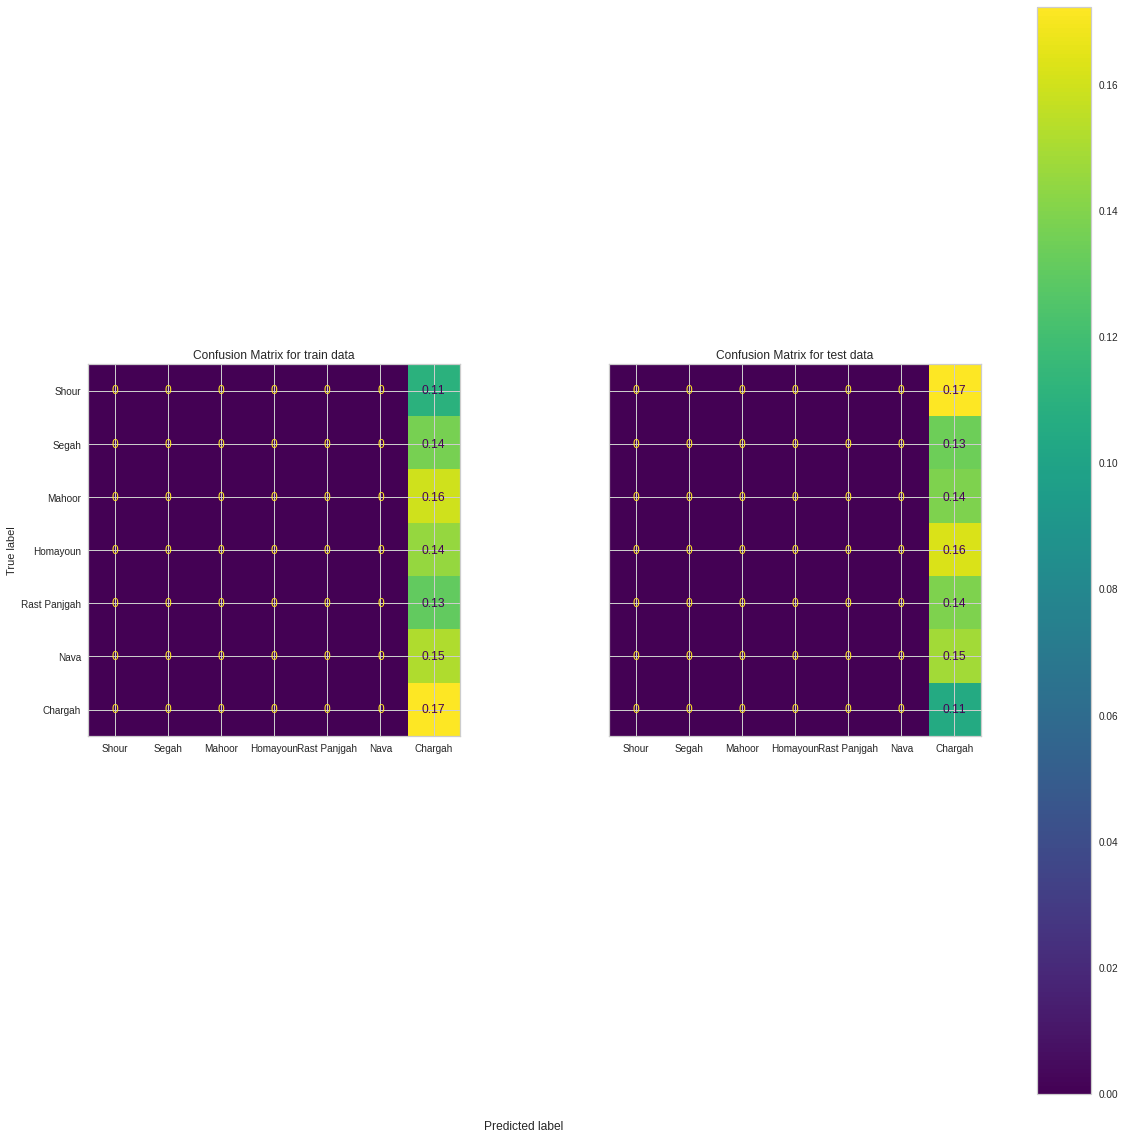

In [166]:
f, axarr = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(20, 20))
data=[input_Normal_train,input_Normal_test]
targets=[target_Normal_train,target_Normal_test]
cof=["Confusion Matrix for train data","Confusion Matrix for test data"]
for i in range(2):
    y_pred=np.argmax(model.predict(data[i]),axis=1)
    result = confusion_matrix(np.argmax(targets[i],axis=1), y_pred , normalize='pred')
    disp = ConfusionMatrixDisplay(confusion_matrix=result,display_labels=Dastagh_names)
    disp.plot(ax= axarr[i])
    disp.ax_.set_title(cof[i])
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axarr)
plt.show()

## Reduction feature Model



*   Sequential foeward selection
*   Backward Elimmination
*   PCA
*   LDA




### Sequential foeward selection



In [249]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


XGBoost classifier

In [ ]:
XGB = XGBClassifier(n_estimators=1000,eval_metric='merror')
knn = KNeighborsClassifier(n_neighbors=7)
rbf_svm = SVC(kernel='rbf', probability=True)
LR_clf = LogisticRegression(multi_class='multinomial', random_state=1)

fss = SequentialFeatureSelector(clf1,k_features='best',forward=True,n_jobs=-1)
fss.fit(Normalized_Dataset,Labels)
features = list(fss.k_feature_names_)
predictProba(XGB, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')



In [ ]:
XGB = XGBClassifier(n_estimators=1000,eval_metric='merror')
knn = KNeighborsClassifier(n_neighbors=7)
rbf_svm = SVC(kernel='rbf', probability=True)
LR_clf = LogisticRegression(multi_class='multinomial', random_state=1)

fss = SequentialFeatureSelector(LR_clf,k_features='best',forward=True,n_jobs=-1)
fss.fit(Normalized_Dataset_spectrum,Labels)
features = list(fss.k_feature_names_)
predictProba(LR_clf, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')



SVM kernel RBF

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

XGB = XGBClassifier(n_estimators=1000,eval_metric='merror')
knn = KNeighborsClassifier(n_neighbors=7)
rbf_svm = SVC(kernel='rbf', probability=True)
LR_clf = LogisticRegression(multi_class='multinomial', random_state=1)

fss = SequentialFeatureSelector(rbf_svm,k_features='best',forward=True,n_jobs=-1)
fss.fit(Normalized_Dataset,Labels)
features = list(fss.k_feature_names_)
predictProba(rbf_svm , input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names,labels = 'Normal dataset')



In [ ]:
XGB = XGBClassifier(n_estimators=1000,eval_metric='merror')
knn = KNeighborsClassifier(n_neighbors=7)
rbf_svm = SVC(kernel='rbf', probability=True)
LR_clf = LogisticRegression(multi_class='multinomial', random_state=1)

fss = SequentialFeatureSelector(rbf_svm,k_features='best',forward=True,n_jobs=-1)
fss.fit(Normalized_Dataset_spectrum,Labels)
features = list(fss.k_feature_names_)
predictProba(rbf_svm, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')



logestic regression

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

XGB = XGBClassifier(n_estimators=1000,eval_metric='merror')
knn = KNeighborsClassifier(n_neighbors=7)
rbf_svm = SVC(kernel='rbf', probability=True)
LR_clf = LogisticRegression(multi_class='multinomial', random_state=1)

fss = SequentialFeatureSelector(LR_clf,k_features='best',forward=True,n_jobs=-1)
fss.fit(Normalized_Dataset,Labels)
features = list(fss.k_feature_names_)
predictProba(LR_clf , input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names,labels = 'Normal dataset')



In [ ]:
XGB = XGBClassifier(n_estimators=1000,eval_metric='merror')
knn = KNeighborsClassifier(n_neighbors=7)
rbf_svm = SVC(kernel='rbf', probability=True)
LR_clf = LogisticRegression(multi_class='multinomial', random_state=1)

fss = SequentialFeatureSelector(LR_clf,k_features='best',forward=True,n_jobs=-1)
fss.fit(Normalized_Dataset_spectrum,Labels)
features = list(fss.k_feature_names_)
predictProba(LR_clf, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')



KNN

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

XGB = XGBClassifier(n_estimators=1000,eval_metric='merror')
knn = KNeighborsClassifier(n_neighbors=7)
rbf_svm = SVC(kernel='rbf', probability=True)
LR_clf = LogisticRegression(multi_class='multinomial', random_state=1)

fss = SequentialFeatureSelector(knn,k_features='best',forward=True,n_jobs=-1)
fss.fit(Normalized_Dataset,Labels)
features = list(fss.k_feature_names_)
predictProba(knn , input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names,labels = 'Normal dataset')



In [ ]:
XGB = XGBClassifier(n_estimators=1000,eval_metric='merror')
knn = KNeighborsClassifier(n_neighbors=7)
rbf_svm = SVC(kernel='rbf', probability=True)
LR_clf = LogisticRegression(multi_class='multinomial', random_state=1)

fss = SequentialFeatureSelector(knn,k_features='best',forward=True,n_jobs=-1)
fss.fit(Normalized_Dataset_spectrum,Labels)
features = list(fss.k_feature_names_)
predictProba(knn, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')



### Backward Elimmination

In [ ]:
"""XGBoost classifier"""

XGB = XGBClassifier(n_estimators=1000,eval_metric='merror')
knn = KNeighborsClassifier(n_neighbors=7)
rbf_svm = SVC(kernel='rbf', probability=True)
LR_clf = LogisticRegression(multi_class='multinomial', random_state=1)

fss = SequentialFeatureSelector(clf1,k_features='best',forward=False,n_jobs=-1)
fss.fit(Normalized_Dataset,Labels)
features = list(fss.k_feature_names_)
predictProba(XGB, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')


#######
fss = SequentialFeatureSelector(LR_clf,k_features='best',forward=False,n_jobs=-1)
fss.fit(Normalized_Dataset_spectrum,Labels)
features = list(fss.k_feature_names_)
predictProba(LR_clf, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')

"""SVM kernel RBF"""


fss = SequentialFeatureSelector(rbf_svm,k_features='best',forward=False,n_jobs=-1)
fss.fit(Normalized_Dataset,Labels)
features = list(fss.k_feature_names_)
predictProba(rbf_svm , input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names,labels = 'Normal dataset')

######

fss = SequentialFeatureSelector(rbf_svm,k_features='best',forward=False,n_jobs=-1)
fss.fit(Normalized_Dataset_spectrum,Labels)
features = list(fss.k_feature_names_)
predictProba(rbf_svm, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')

"""logestic regression"""

fss = SequentialFeatureSelector(LR_clf,k_features='best',forward=False,n_jobs=-1)
fss.fit(Normalized_Dataset,Labels)
features = list(fss.k_feature_names_)
predictProba(LR_clf , input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names,labels = 'Normal dataset')

#######
fss = SequentialFeatureSelector(LR_clf,k_features='best',forward=False,n_jobs=-1)
fss.fit(Normalized_Dataset_spectrum,Labels)
features = list(fss.k_feature_names_)
predictProba(LR_clf, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')

"""KNN"""


fss = SequentialFeatureSelector(knn,k_features='best',forward=False,n_jobs=-1)
fss.fit(Normalized_Dataset,Labels)
features = list(fss.k_feature_names_)
predictProba(knn , input_Normal_train, target_Normal_train,input_Normal_test, target_Normal_test,display_labels = Dastagh_names,labels = 'Normal dataset')

#######

fss = SequentialFeatureSelector(knn,k_features='best',forward=False,n_jobs=-1)
fss.fit(Normalized_Dataset_spectrum,Labels)
features = list(fss.k_feature_names_)
predictProba(knn, input_spectrum_train, target_spectrum_train,input_spectrum_test, target_spectrum_test, display_labels = Dastagh_names,labels = 'Normal spectrum dataset')

### PCA

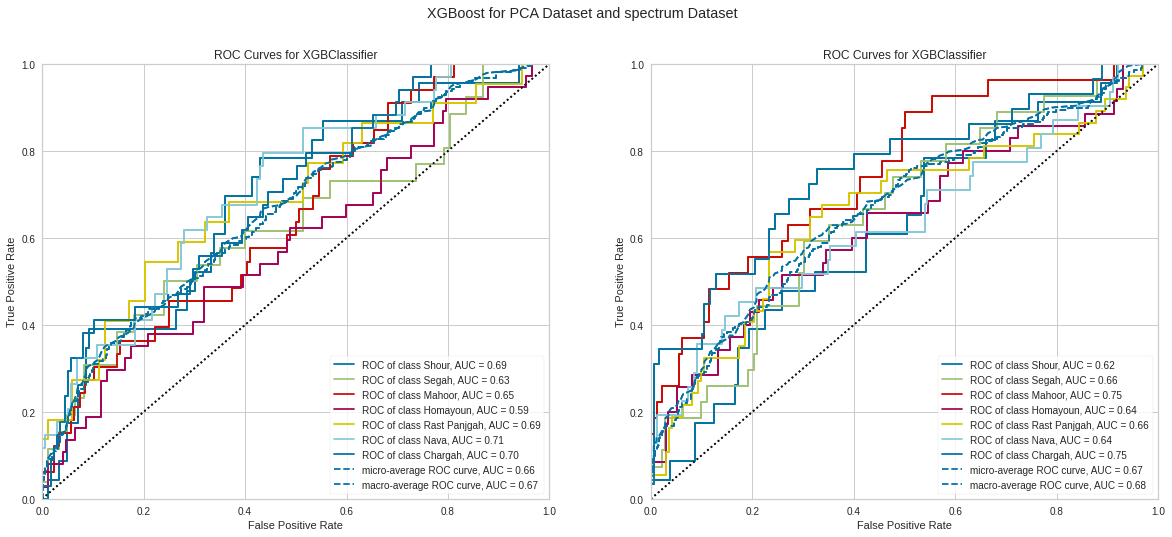

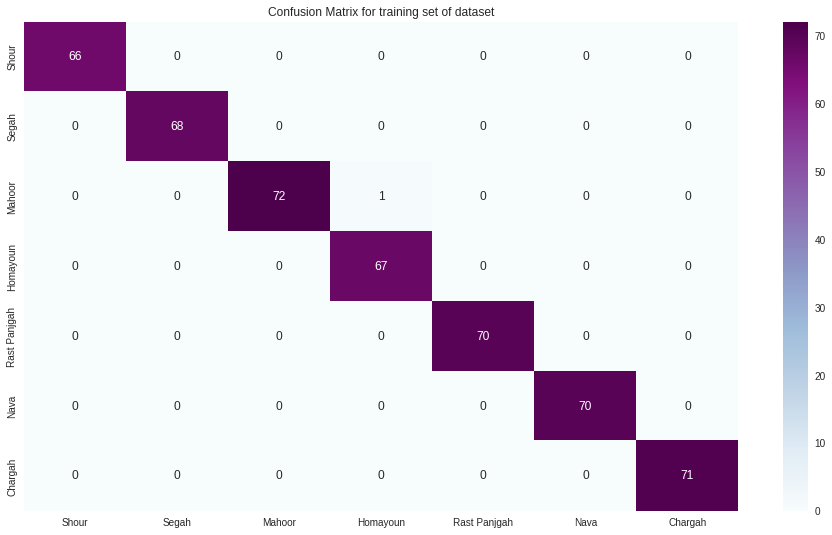

training set accuracy for dataset: 0.9979381443298969
Classification Metrics for training set of dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      1.000     1.000     1.000        68
           2      1.000     0.986     0.993        73
           3      0.985     1.000     0.993        67
           4      1.000     1.000     1.000        70
           5      1.000     1.000     1.000        70
           6      1.000     1.000     1.000        71

    accuracy                          0.998       485
   macro avg      0.998     0.998     0.998       485
weighted avg      0.998     0.998     0.998       485



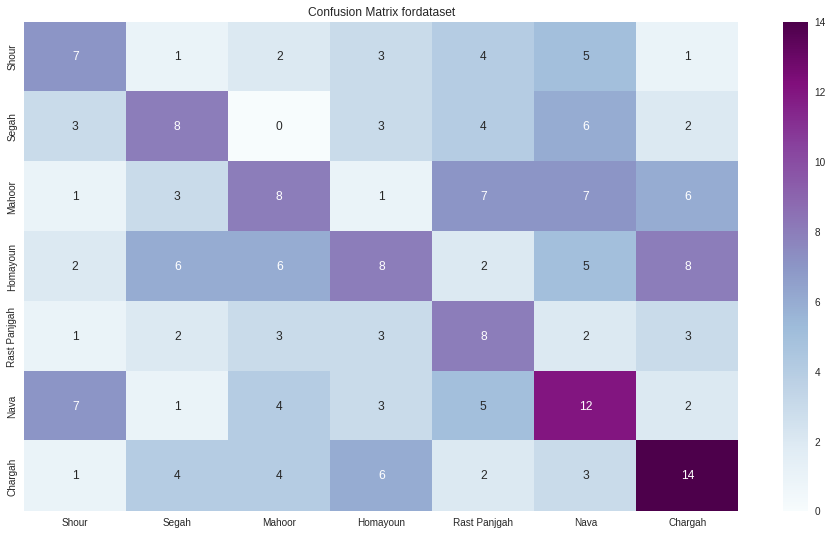

training set accuracy for dataset: 0.31100478468899523
Classification Metrics for testing set of dataset
              precision    recall  f1-score   support

           0      0.318     0.304     0.311        23
           1      0.320     0.308     0.314        26
           2      0.296     0.242     0.267        33
           3      0.296     0.216     0.250        37
           4      0.250     0.364     0.296        22
           5      0.300     0.353     0.324        34
           6      0.389     0.412     0.400        34

    accuracy                          0.311       209
   macro avg      0.310     0.314     0.309       209
weighted avg      0.312     0.311     0.309       209



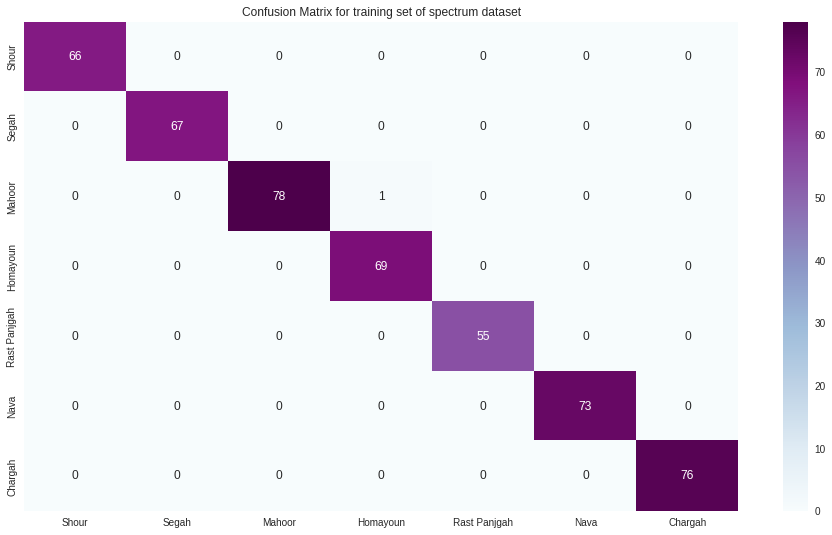

training set accuracy for spectrum dataset: 0.9979381443298969
Classification Metrics for training set of spectrum dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      1.000     1.000     1.000        67
           2      1.000     0.987     0.994        79
           3      0.986     1.000     0.993        69
           4      1.000     1.000     1.000        55
           5      1.000     1.000     1.000        73
           6      1.000     1.000     1.000        76

    accuracy                          0.998       485
   macro avg      0.998     0.998     0.998       485
weighted avg      0.998     0.998     0.998       485



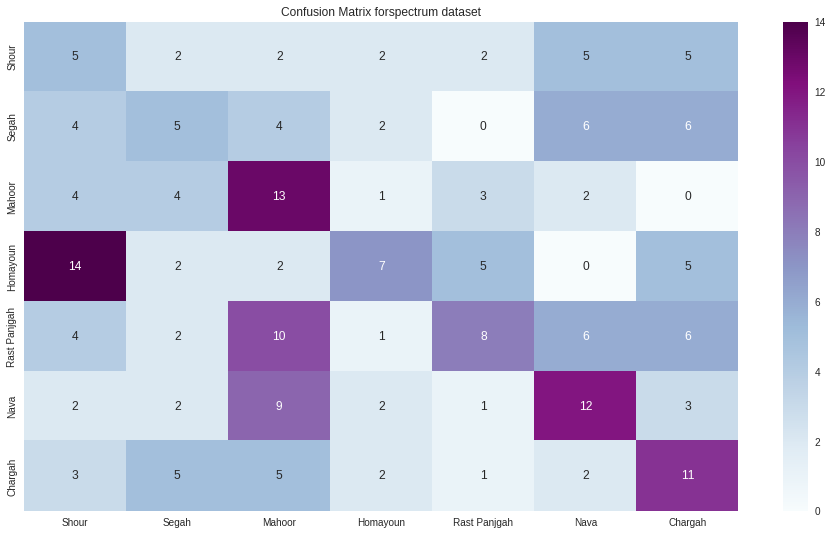

training set accuracy for spectrum dataset: 0.291866028708134
Classification Metrics for testing set of spectrum dataset
              precision    recall  f1-score   support

           0      0.139     0.217     0.169        23
           1      0.227     0.185     0.204        27
           2      0.289     0.481     0.361        27
           3      0.412     0.200     0.269        35
           4      0.400     0.216     0.281        37
           5      0.364     0.387     0.375        31
           6      0.306     0.379     0.338        29

    accuracy                          0.292       209
   macro avg      0.305     0.295     0.285       209
weighted avg      0.318     0.292     0.289       209



In [240]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('XGBoost for PCA Dataset and spectrum Dataset')
model = XGBClassifier(n_estimators=100,eval_metric='merror')
ax1 = ROC_plot(model ,input_PCA_train,  target_PCA_train,input_PCA_test, target_PCA_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model ,input_PCA_spectrum_train,  target_PCA_spectrum_train, input_PCA_spectrum_test,target_PCA_spectrum_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model , input_PCA_train, target_PCA_train, input_PCA_test, target_PCA_test,display_labels = Dastagh_names,labels = 'dataset')
predictProba(model , input_PCA_spectrum_train,  target_PCA_spectrum_train,input_PCA_spectrum_test, target_PCA_spectrum_test,display_labels = Dastagh_names,labels = 'spectrum dataset')

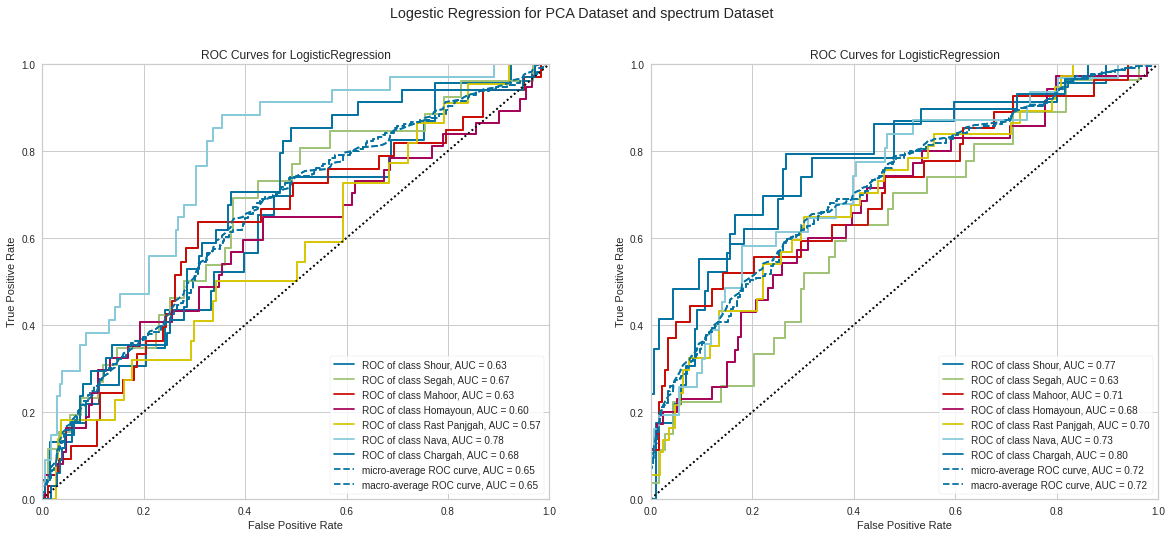

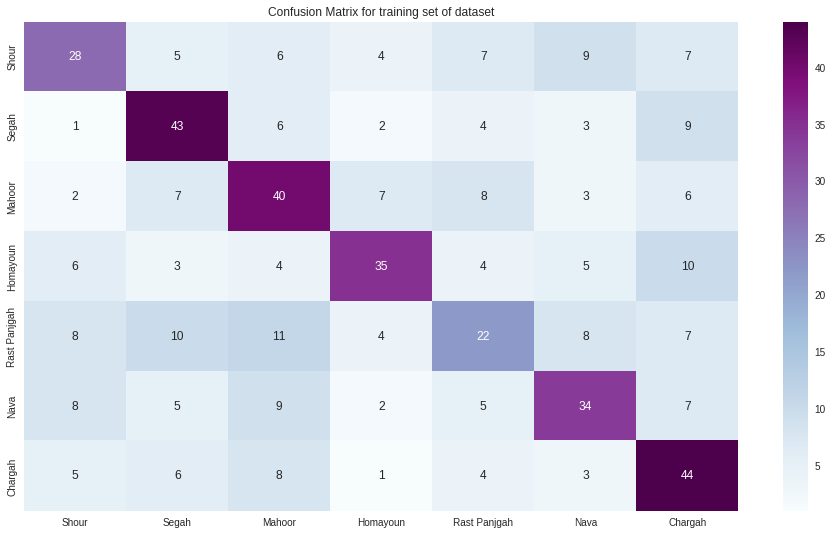

training set accuracy for dataset: 0.5072164948453608
Classification Metrics for training set of dataset
              precision    recall  f1-score   support

           0      0.483     0.424     0.452        66
           1      0.544     0.632     0.585        68
           2      0.476     0.548     0.510        73
           3      0.636     0.522     0.574        67
           4      0.407     0.314     0.355        70
           5      0.523     0.486     0.504        70
           6      0.489     0.620     0.547        71

    accuracy                          0.507       485
   macro avg      0.508     0.507     0.504       485
weighted avg      0.507     0.507     0.503       485



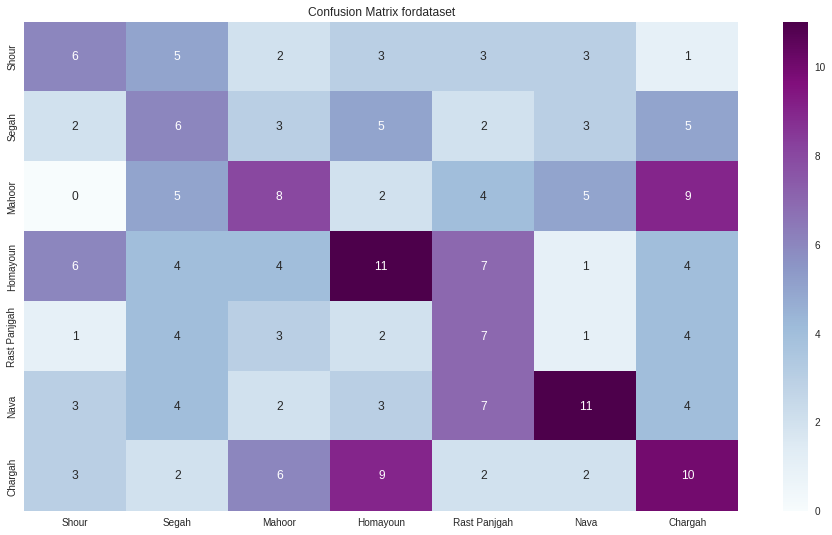

training set accuracy for dataset: 0.2822966507177033
Classification Metrics for testing set of dataset
              precision    recall  f1-score   support

           0      0.286     0.261     0.273        23
           1      0.200     0.231     0.214        26
           2      0.286     0.242     0.262        33
           3      0.314     0.297     0.306        37
           4      0.219     0.318     0.259        22
           5      0.423     0.324     0.367        34
           6      0.270     0.294     0.282        34

    accuracy                          0.282       209
   macro avg      0.285     0.281     0.280       209
weighted avg      0.293     0.282     0.285       209



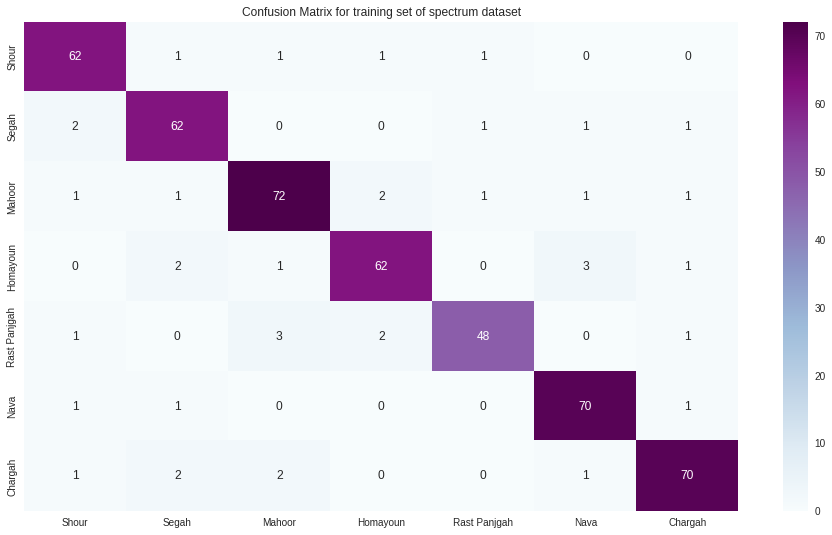

training set accuracy for spectrum dataset: 0.9195876288659793
Classification Metrics for training set of spectrum dataset
              precision    recall  f1-score   support

           0      0.912     0.939     0.925        66
           1      0.899     0.925     0.912        67
           2      0.911     0.911     0.911        79
           3      0.925     0.899     0.912        69
           4      0.941     0.873     0.906        55
           5      0.921     0.959     0.940        73
           6      0.933     0.921     0.927        76

    accuracy                          0.920       485
   macro avg      0.920     0.918     0.919       485
weighted avg      0.920     0.920     0.919       485



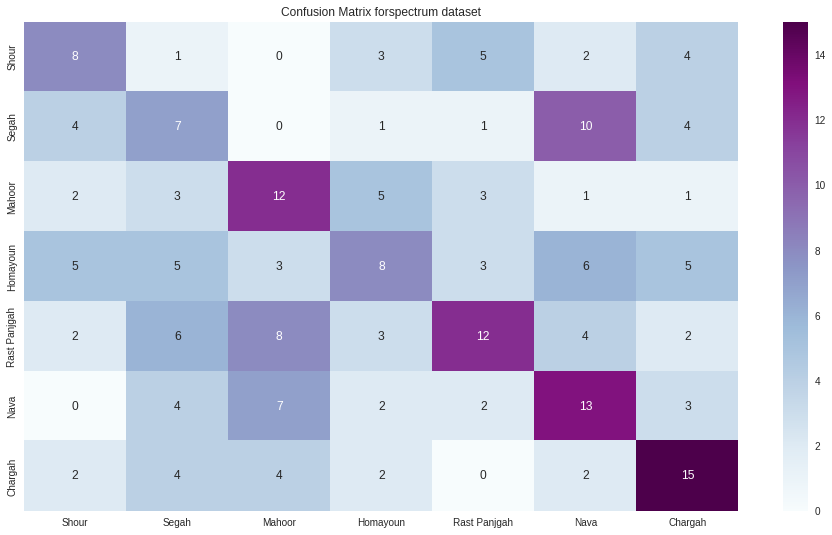

training set accuracy for spectrum dataset: 0.3588516746411483
Classification Metrics for testing set of spectrum dataset
              precision    recall  f1-score   support

           0      0.348     0.348     0.348        23
           1      0.233     0.259     0.246        27
           2      0.353     0.444     0.393        27
           3      0.333     0.229     0.271        35
           4      0.462     0.324     0.381        37
           5      0.342     0.419     0.377        31
           6      0.441     0.517     0.476        29

    accuracy                          0.359       209
   macro avg      0.359     0.363     0.356       209
weighted avg      0.364     0.359     0.356       209



In [241]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('Logestic Regression for PCA Dataset and spectrum Dataset')
model = LogisticRegression(random_state=0)
ax1 = ROC_plot(model ,input_PCA_train,  target_PCA_train,input_PCA_test, target_PCA_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model ,input_PCA_spectrum_train,  target_PCA_spectrum_train, input_PCA_spectrum_test,target_PCA_spectrum_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model , input_PCA_train, target_PCA_train, input_PCA_test, target_PCA_test,display_labels = Dastagh_names,labels = 'dataset')
predictProba(model , input_PCA_spectrum_train,  target_PCA_spectrum_train,input_PCA_spectrum_test, target_PCA_spectrum_test,display_labels = Dastagh_names,labels = 'spectrum dataset')

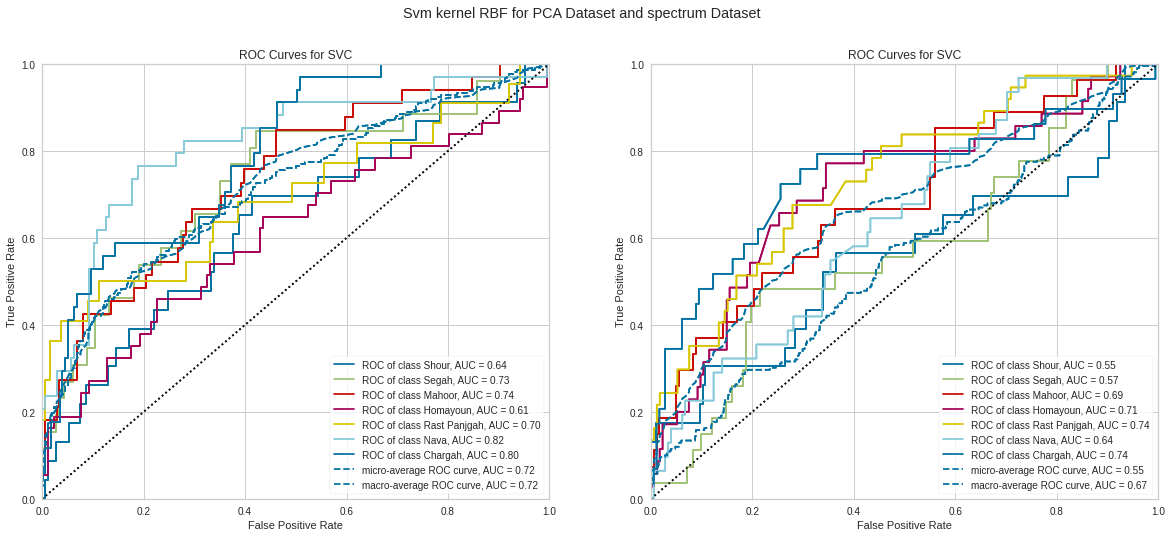

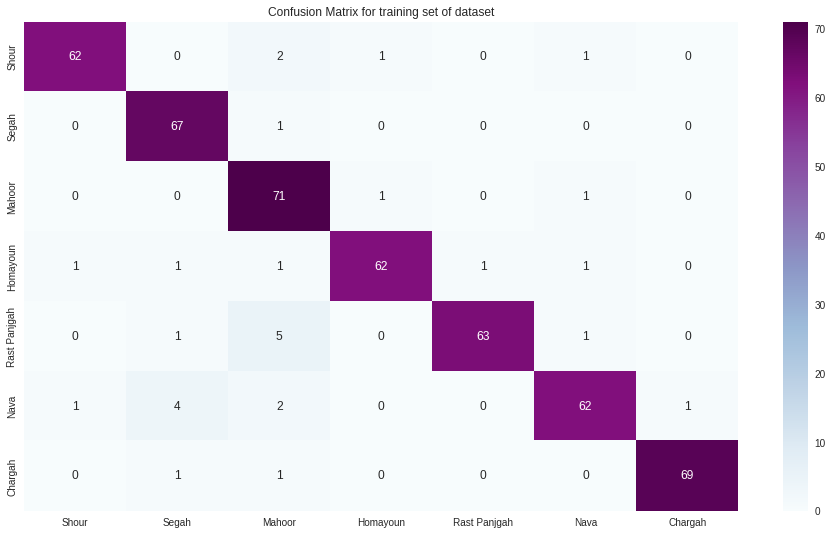

training set accuracy for dataset: 0.9402061855670103
Classification Metrics for training set of dataset
              precision    recall  f1-score   support

           0      0.969     0.939     0.954        66
           1      0.905     0.985     0.944        68
           2      0.855     0.973     0.910        73
           3      0.969     0.925     0.947        67
           4      0.984     0.900     0.940        70
           5      0.939     0.886     0.912        70
           6      0.986     0.972     0.979        71

    accuracy                          0.940       485
   macro avg      0.944     0.940     0.941       485
weighted avg      0.943     0.940     0.940       485



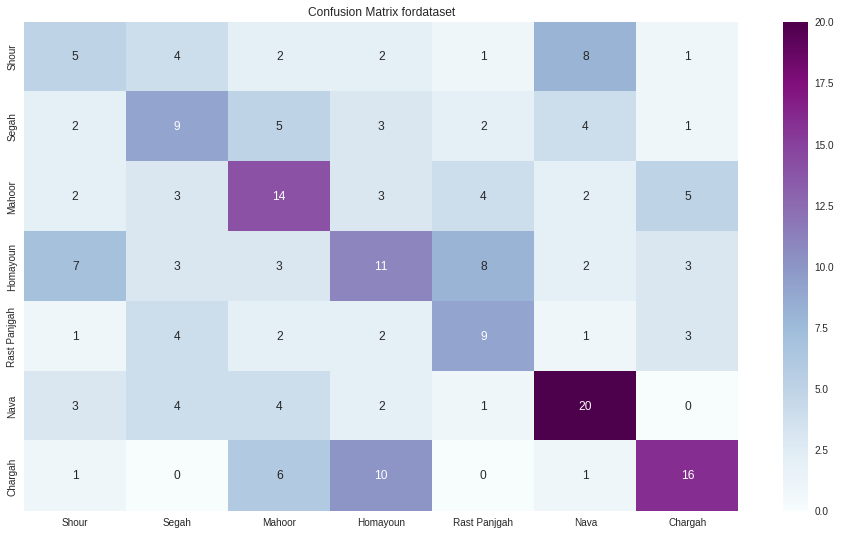

training set accuracy for dataset: 0.4019138755980861
Classification Metrics for testing set of dataset
              precision    recall  f1-score   support

           0      0.238     0.217     0.227        23
           1      0.333     0.346     0.340        26
           2      0.389     0.424     0.406        33
           3      0.333     0.297     0.314        37
           4      0.360     0.409     0.383        22
           5      0.526     0.588     0.556        34
           6      0.552     0.471     0.508        34

    accuracy                          0.402       209
   macro avg      0.390     0.393     0.390       209
weighted avg      0.401     0.402     0.400       209



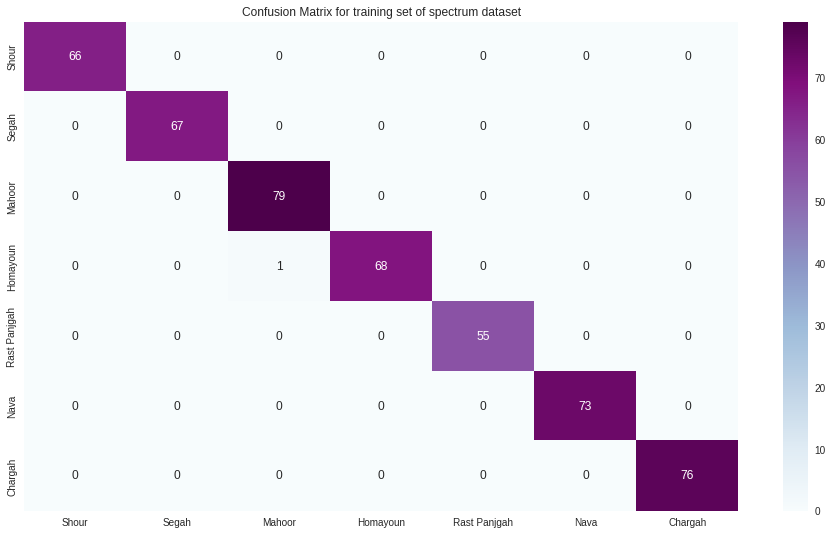

training set accuracy for spectrum dataset: 0.9979381443298969
Classification Metrics for training set of spectrum dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      1.000     1.000     1.000        67
           2      0.988     1.000     0.994        79
           3      1.000     0.986     0.993        69
           4      1.000     1.000     1.000        55
           5      1.000     1.000     1.000        73
           6      1.000     1.000     1.000        76

    accuracy                          0.998       485
   macro avg      0.998     0.998     0.998       485
weighted avg      0.998     0.998     0.998       485



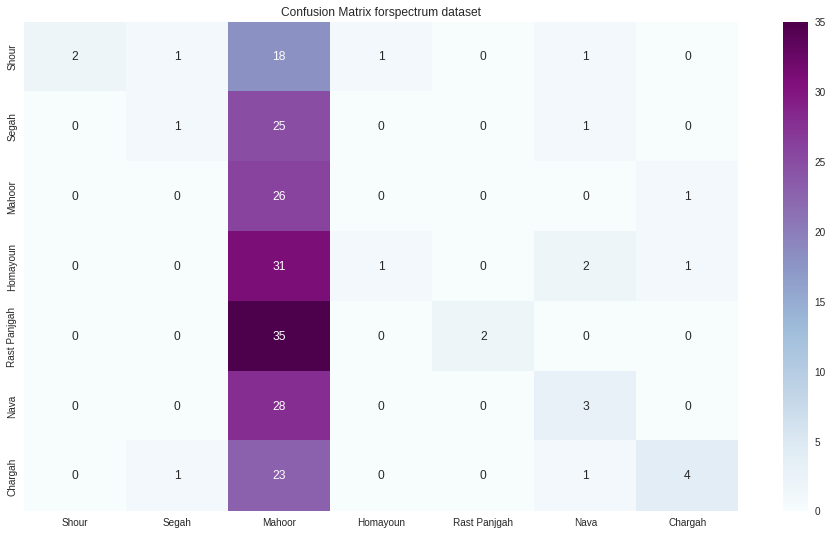

training set accuracy for spectrum dataset: 0.18660287081339713
Classification Metrics for testing set of spectrum dataset
              precision    recall  f1-score   support

           0      1.000     0.087     0.160        23
           1      0.333     0.037     0.067        27
           2      0.140     0.963     0.244        27
           3      0.500     0.029     0.054        35
           4      1.000     0.054     0.103        37
           5      0.375     0.097     0.154        31
           6      0.667     0.138     0.229        29

    accuracy                          0.187       209
   macro avg      0.574     0.201     0.144       209
weighted avg      0.580     0.187     0.140       209



In [242]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('Svm kernel RBF for PCA Dataset and spectrum Dataset')
model = svm.SVC(kernel="rbf", gamma=0.7, C=1)
ax1 = ROC_plot(model ,input_PCA_train,  target_PCA_train,input_PCA_test, target_PCA_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model ,input_PCA_spectrum_train,  target_PCA_spectrum_train, input_PCA_spectrum_test,target_PCA_spectrum_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model , input_PCA_train, target_PCA_train, input_PCA_test, target_PCA_test,display_labels = Dastagh_names,labels = 'dataset')
predictProba(model , input_PCA_spectrum_train,  target_PCA_spectrum_train,input_PCA_spectrum_test, target_PCA_spectrum_test,display_labels = Dastagh_names,labels = 'spectrum dataset')

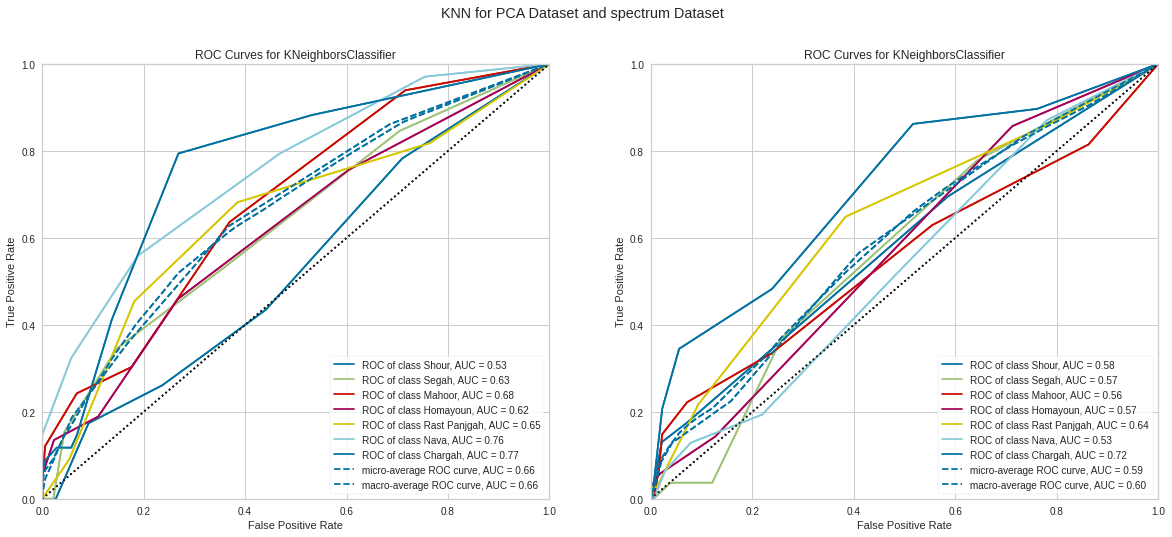

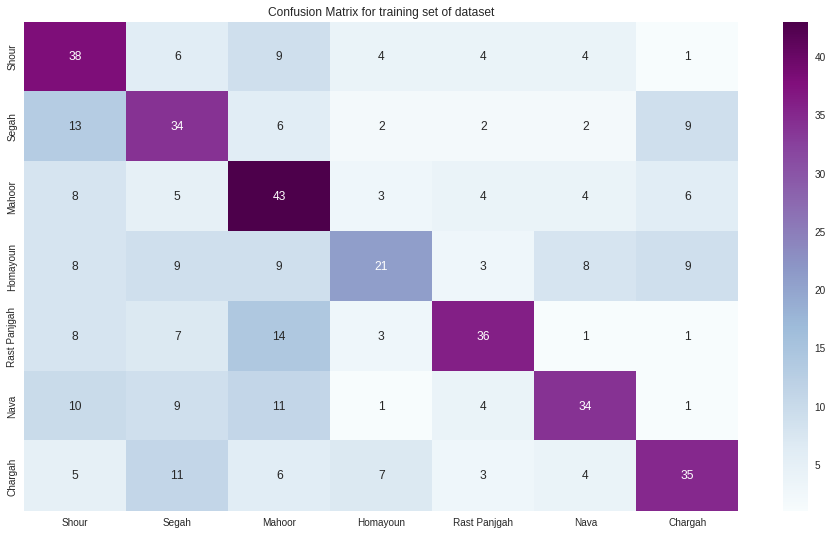

training set accuracy for dataset: 0.49690721649484537
Classification Metrics for training set of dataset
              precision    recall  f1-score   support

           0      0.422     0.576     0.487        66
           1      0.420     0.500     0.456        68
           2      0.439     0.589     0.503        73
           3      0.512     0.313     0.389        67
           4      0.643     0.514     0.571        70
           5      0.596     0.486     0.535        70
           6      0.565     0.493     0.526        71

    accuracy                          0.497       485
   macro avg      0.514     0.496     0.496       485
weighted avg      0.515     0.497     0.497       485



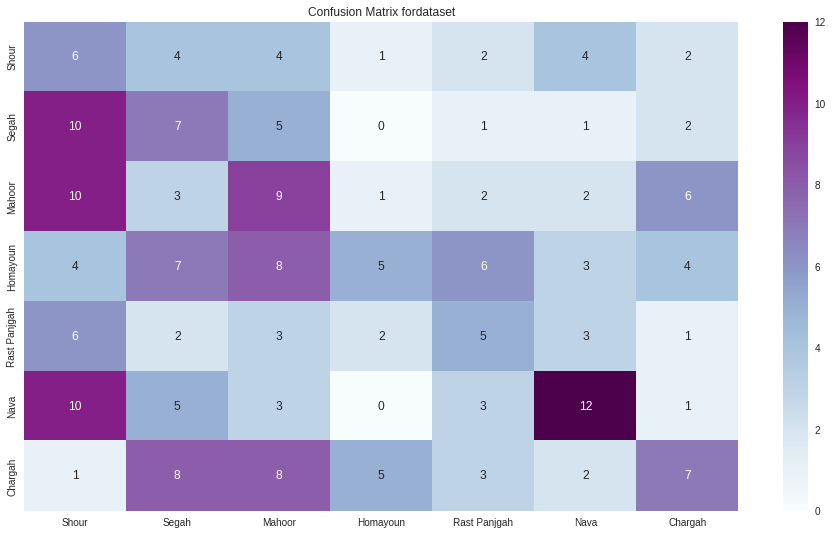

training set accuracy for dataset: 0.24401913875598086
Classification Metrics for testing set of dataset
              precision    recall  f1-score   support

           0      0.128     0.261     0.171        23
           1      0.194     0.269     0.226        26
           2      0.225     0.273     0.247        33
           3      0.357     0.135     0.196        37
           4      0.227     0.227     0.227        22
           5      0.444     0.353     0.393        34
           6      0.304     0.206     0.246        34

    accuracy                          0.244       209
   macro avg      0.269     0.246     0.244       209
weighted avg      0.283     0.244     0.248       209



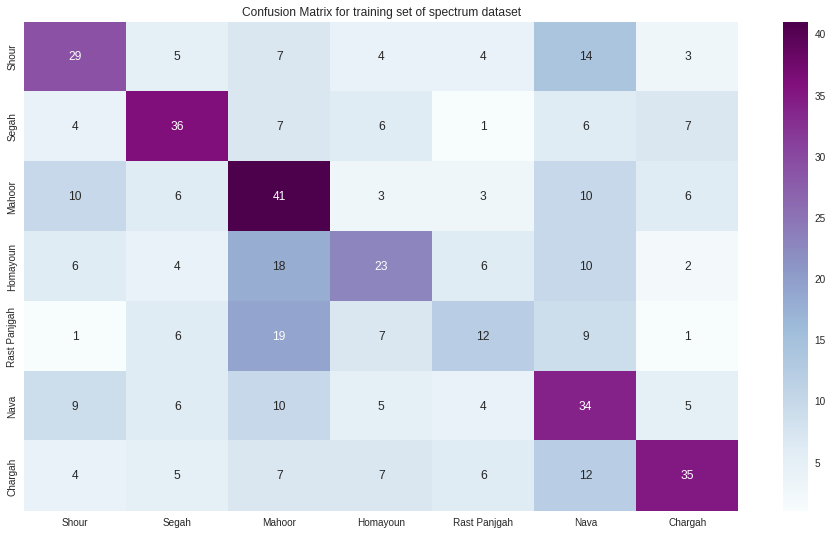

training set accuracy for spectrum dataset: 0.4329896907216495
Classification Metrics for training set of spectrum dataset
              precision    recall  f1-score   support

           0      0.460     0.439     0.450        66
           1      0.529     0.537     0.533        67
           2      0.376     0.519     0.436        79
           3      0.418     0.333     0.371        69
           4      0.333     0.218     0.264        55
           5      0.358     0.466     0.405        73
           6      0.593     0.461     0.519        76

    accuracy                          0.433       485
   macro avg      0.438     0.425     0.425       485
weighted avg      0.441     0.433     0.431       485



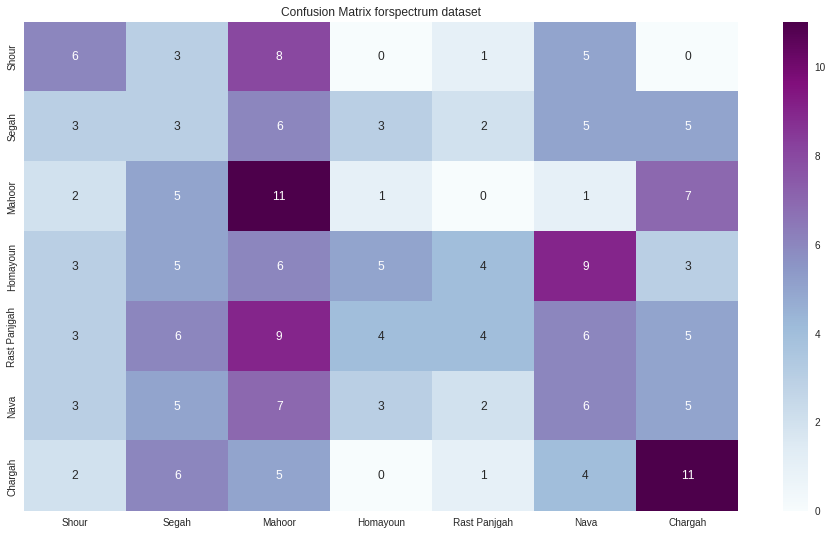

training set accuracy for spectrum dataset: 0.22009569377990432
Classification Metrics for testing set of spectrum dataset
              precision    recall  f1-score   support

           0      0.273     0.261     0.267        23
           1      0.091     0.111     0.100        27
           2      0.212     0.407     0.278        27
           3      0.312     0.143     0.196        35
           4      0.286     0.108     0.157        37
           5      0.167     0.194     0.179        31
           6      0.306     0.379     0.338        29

    accuracy                          0.220       209
   macro avg      0.235     0.229     0.217       209
weighted avg      0.239     0.220     0.212       209



In [243]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('KNN for PCA Dataset and spectrum Dataset')
model = KNeighborsClassifier(n_neighbors=10)
ax1 = ROC_plot(model ,input_PCA_train,  target_PCA_train,input_PCA_test, target_PCA_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model ,input_PCA_spectrum_train,  target_PCA_spectrum_train, input_PCA_spectrum_test,target_PCA_spectrum_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model , input_PCA_train, target_PCA_train, input_PCA_test, target_PCA_test,display_labels = Dastagh_names,labels = 'dataset')
predictProba(model , input_PCA_spectrum_train,  target_PCA_spectrum_train,input_PCA_spectrum_test, target_PCA_spectrum_test,display_labels = Dastagh_names,labels = 'spectrum dataset')

### LDA

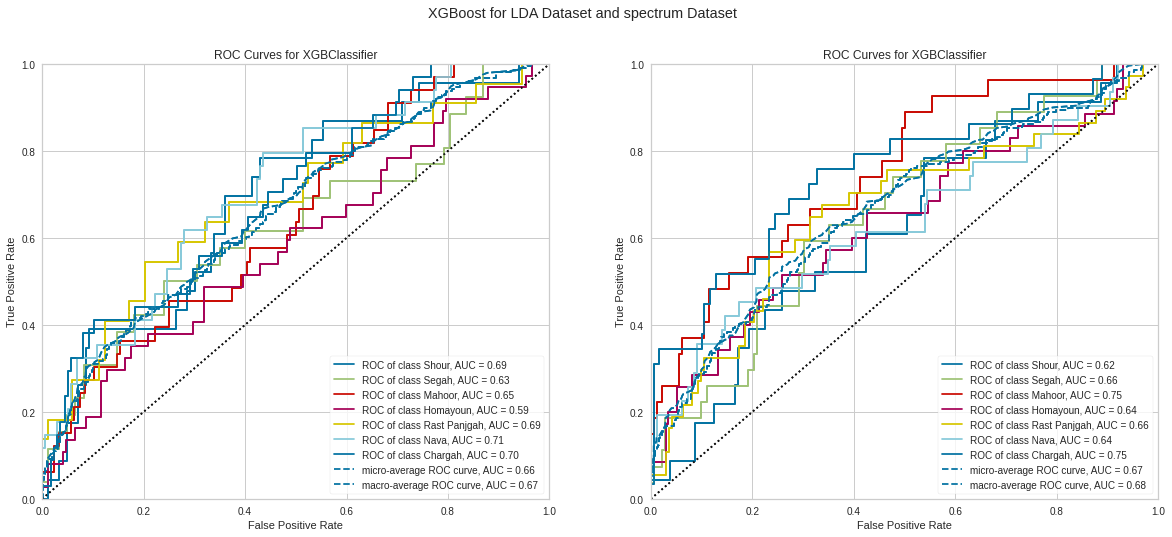

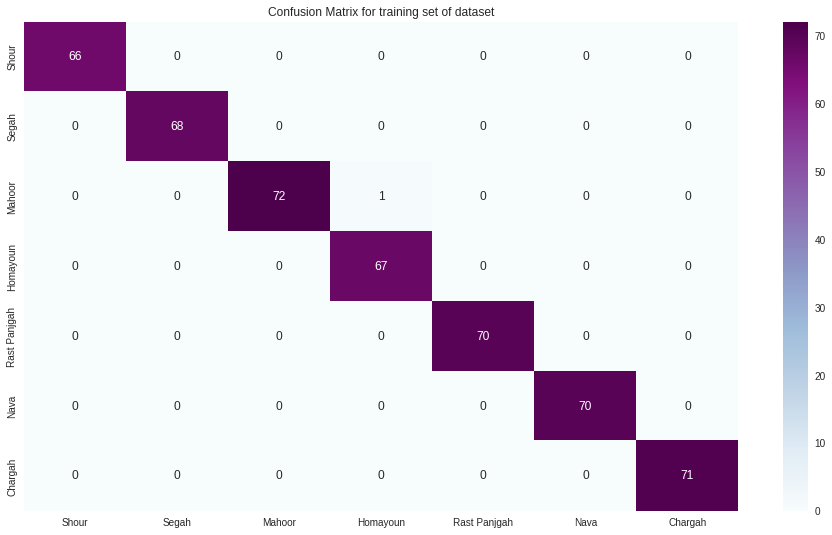

training set accuracy for dataset: 0.9979381443298969
Classification Metrics for training set of dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      1.000     1.000     1.000        68
           2      1.000     0.986     0.993        73
           3      0.985     1.000     0.993        67
           4      1.000     1.000     1.000        70
           5      1.000     1.000     1.000        70
           6      1.000     1.000     1.000        71

    accuracy                          0.998       485
   macro avg      0.998     0.998     0.998       485
weighted avg      0.998     0.998     0.998       485



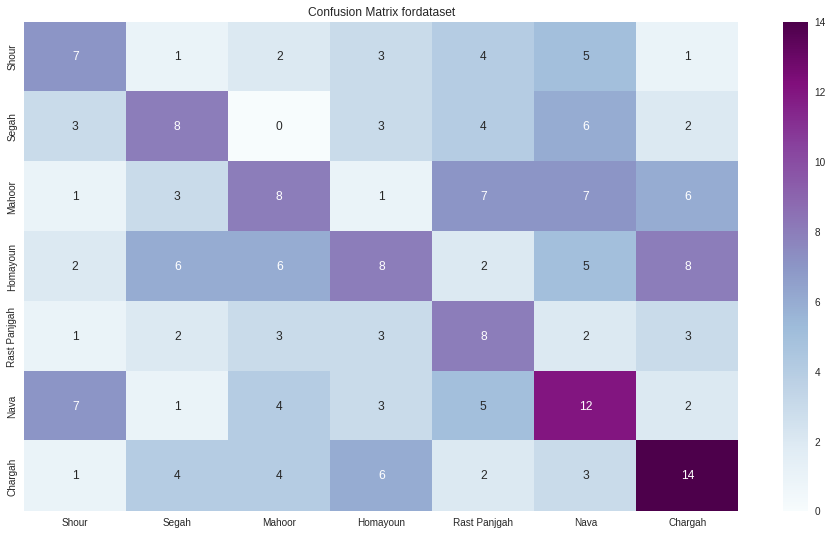

training set accuracy for dataset: 0.31100478468899523
Classification Metrics for testing set of dataset
              precision    recall  f1-score   support

           0      0.318     0.304     0.311        23
           1      0.320     0.308     0.314        26
           2      0.296     0.242     0.267        33
           3      0.296     0.216     0.250        37
           4      0.250     0.364     0.296        22
           5      0.300     0.353     0.324        34
           6      0.389     0.412     0.400        34

    accuracy                          0.311       209
   macro avg      0.310     0.314     0.309       209
weighted avg      0.312     0.311     0.309       209



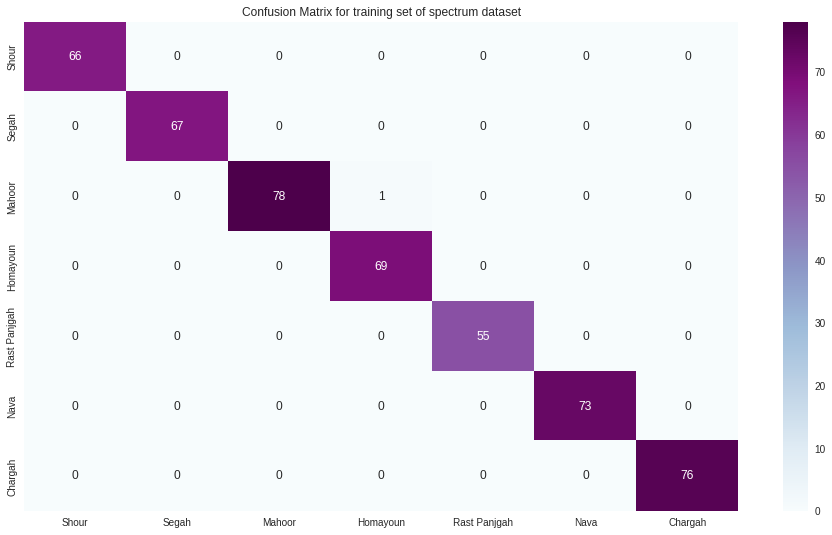

training set accuracy for spectrum dataset: 0.9979381443298969
Classification Metrics for training set of spectrum dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      1.000     1.000     1.000        67
           2      1.000     0.987     0.994        79
           3      0.986     1.000     0.993        69
           4      1.000     1.000     1.000        55
           5      1.000     1.000     1.000        73
           6      1.000     1.000     1.000        76

    accuracy                          0.998       485
   macro avg      0.998     0.998     0.998       485
weighted avg      0.998     0.998     0.998       485



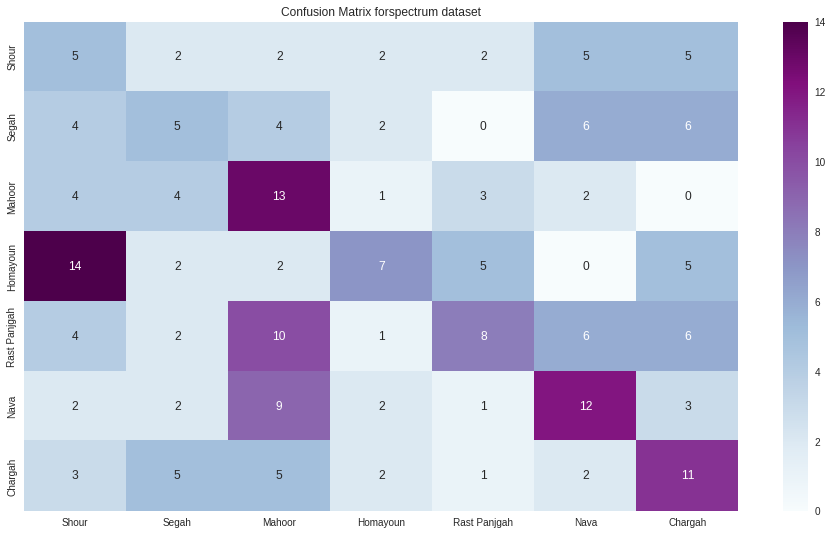

training set accuracy for spectrum dataset: 0.291866028708134
Classification Metrics for testing set of spectrum dataset
              precision    recall  f1-score   support

           0      0.139     0.217     0.169        23
           1      0.227     0.185     0.204        27
           2      0.289     0.481     0.361        27
           3      0.412     0.200     0.269        35
           4      0.400     0.216     0.281        37
           5      0.364     0.387     0.375        31
           6      0.306     0.379     0.338        29

    accuracy                          0.292       209
   macro avg      0.305     0.295     0.285       209
weighted avg      0.318     0.292     0.289       209



In [244]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('XGBoost for LDA Dataset and spectrum Dataset')
model = XGBClassifier(n_estimators=100,eval_metric='merror')
ax1 = ROC_plot(model ,input_PCA_train,  target_PCA_train,input_PCA_test, target_PCA_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model ,input_PCA_spectrum_train,  target_PCA_spectrum_train, input_PCA_spectrum_test,target_PCA_spectrum_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model , input_PCA_train, target_PCA_train, input_PCA_test, target_PCA_test,display_labels = Dastagh_names,labels = 'dataset')
predictProba(model , input_PCA_spectrum_train,  target_PCA_spectrum_train,input_PCA_spectrum_test, target_PCA_spectrum_test,display_labels = Dastagh_names,labels = 'spectrum dataset')

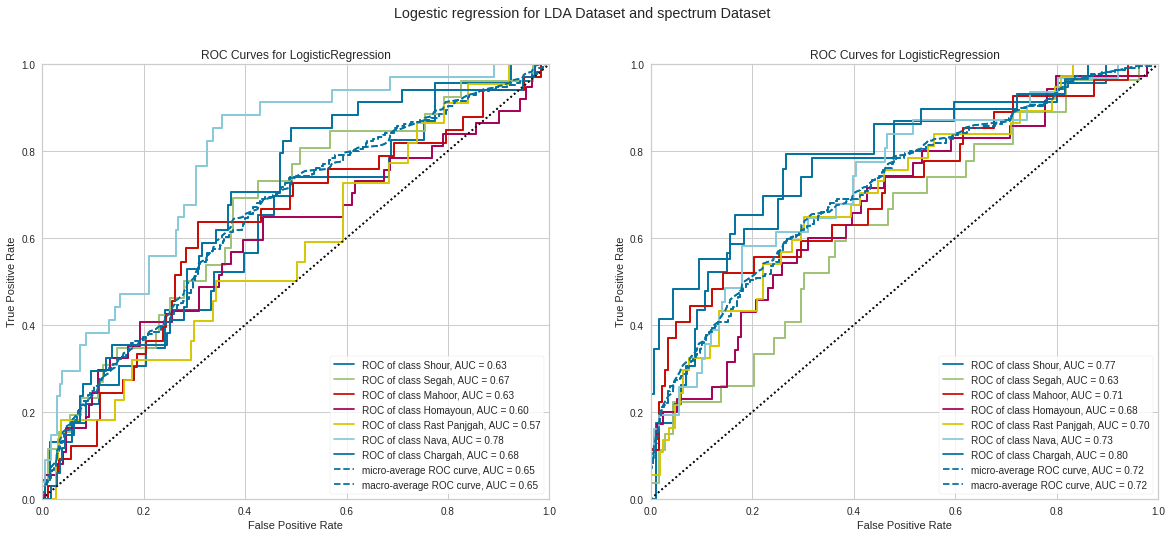

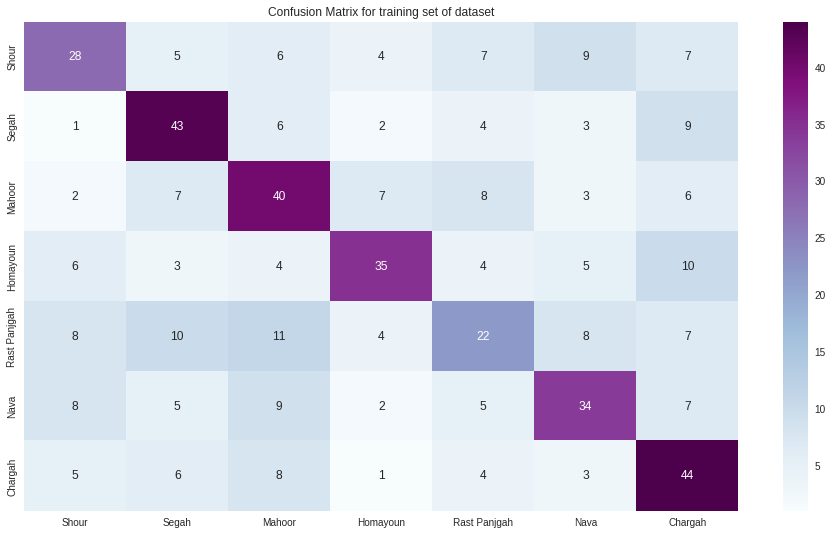

training set accuracy for dataset: 0.5072164948453608
Classification Metrics for training set of dataset
              precision    recall  f1-score   support

           0      0.483     0.424     0.452        66
           1      0.544     0.632     0.585        68
           2      0.476     0.548     0.510        73
           3      0.636     0.522     0.574        67
           4      0.407     0.314     0.355        70
           5      0.523     0.486     0.504        70
           6      0.489     0.620     0.547        71

    accuracy                          0.507       485
   macro avg      0.508     0.507     0.504       485
weighted avg      0.507     0.507     0.503       485



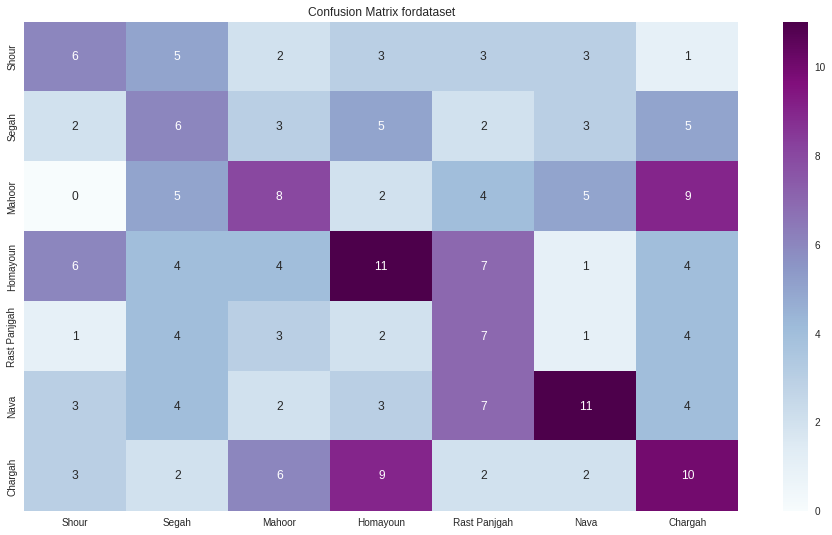

training set accuracy for dataset: 0.2822966507177033
Classification Metrics for testing set of dataset
              precision    recall  f1-score   support

           0      0.286     0.261     0.273        23
           1      0.200     0.231     0.214        26
           2      0.286     0.242     0.262        33
           3      0.314     0.297     0.306        37
           4      0.219     0.318     0.259        22
           5      0.423     0.324     0.367        34
           6      0.270     0.294     0.282        34

    accuracy                          0.282       209
   macro avg      0.285     0.281     0.280       209
weighted avg      0.293     0.282     0.285       209



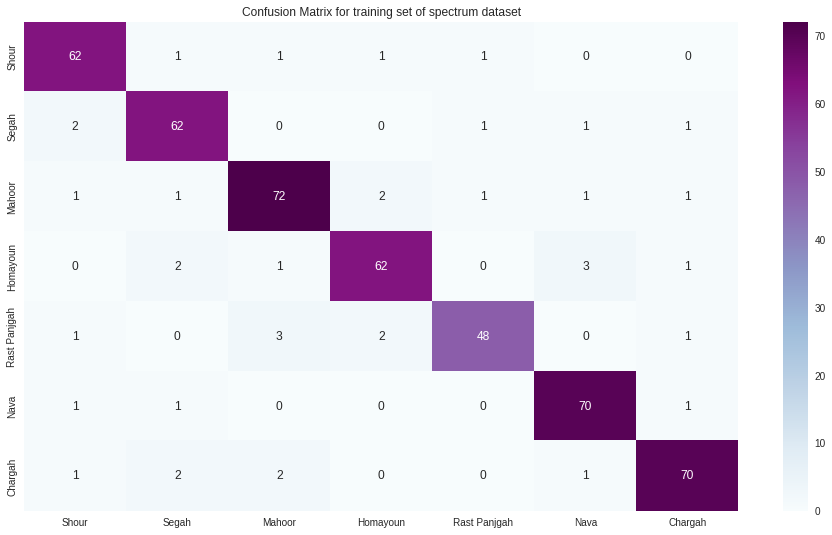

training set accuracy for spectrum dataset: 0.9195876288659793
Classification Metrics for training set of spectrum dataset
              precision    recall  f1-score   support

           0      0.912     0.939     0.925        66
           1      0.899     0.925     0.912        67
           2      0.911     0.911     0.911        79
           3      0.925     0.899     0.912        69
           4      0.941     0.873     0.906        55
           5      0.921     0.959     0.940        73
           6      0.933     0.921     0.927        76

    accuracy                          0.920       485
   macro avg      0.920     0.918     0.919       485
weighted avg      0.920     0.920     0.919       485



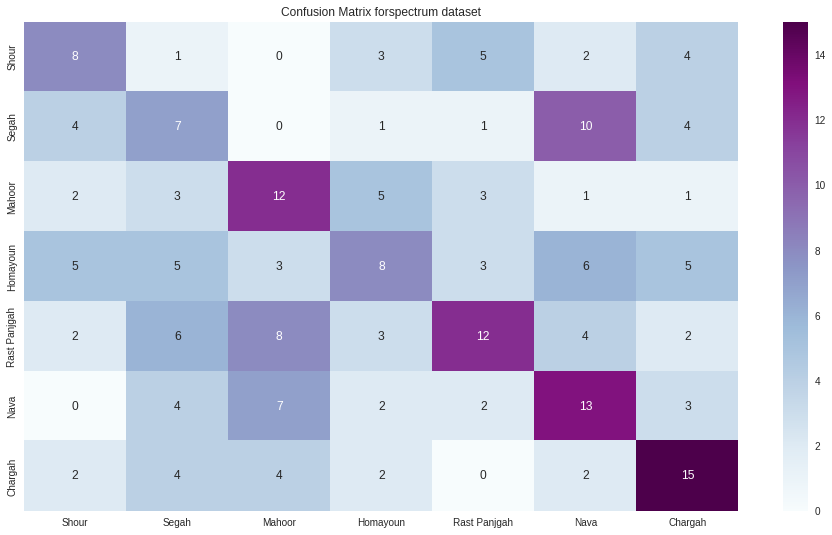

training set accuracy for spectrum dataset: 0.3588516746411483
Classification Metrics for testing set of spectrum dataset
              precision    recall  f1-score   support

           0      0.348     0.348     0.348        23
           1      0.233     0.259     0.246        27
           2      0.353     0.444     0.393        27
           3      0.333     0.229     0.271        35
           4      0.462     0.324     0.381        37
           5      0.342     0.419     0.377        31
           6      0.441     0.517     0.476        29

    accuracy                          0.359       209
   macro avg      0.359     0.363     0.356       209
weighted avg      0.364     0.359     0.356       209



In [245]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('Logestic regression for LDA Dataset and spectrum Dataset')
model = LogisticRegression(random_state=0)
ax1 = ROC_plot(model ,input_PCA_train,  target_PCA_train,input_PCA_test, target_PCA_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model ,input_PCA_spectrum_train,  target_PCA_spectrum_train, input_PCA_spectrum_test,target_PCA_spectrum_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model , input_PCA_train, target_PCA_train, input_PCA_test, target_PCA_test,display_labels = Dastagh_names,labels = 'dataset')
predictProba(model , input_PCA_spectrum_train,  target_PCA_spectrum_train,input_PCA_spectrum_test, target_PCA_spectrum_test,display_labels = Dastagh_names,labels = 'spectrum dataset')

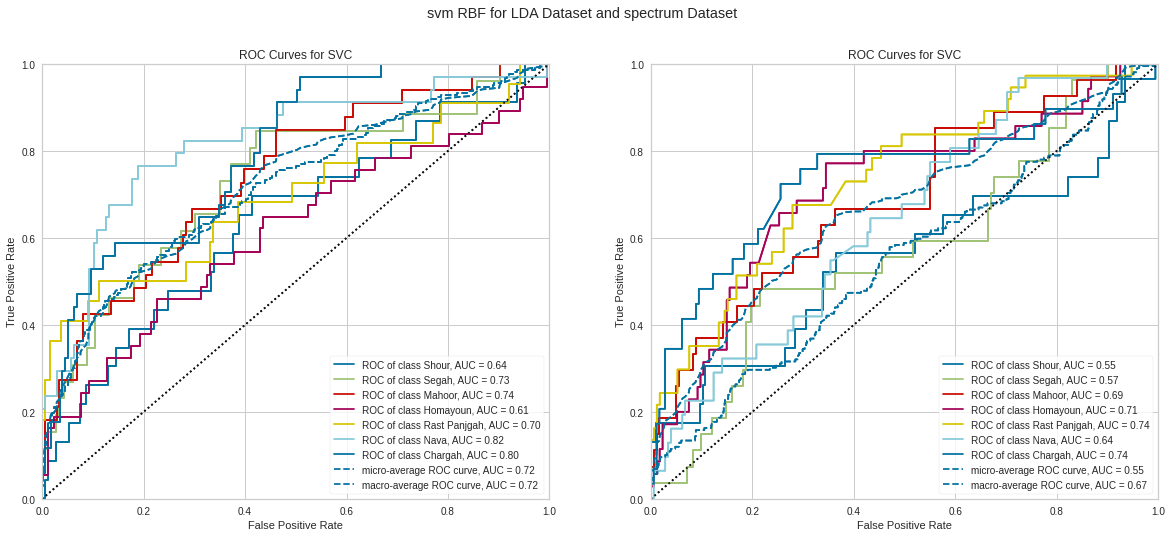

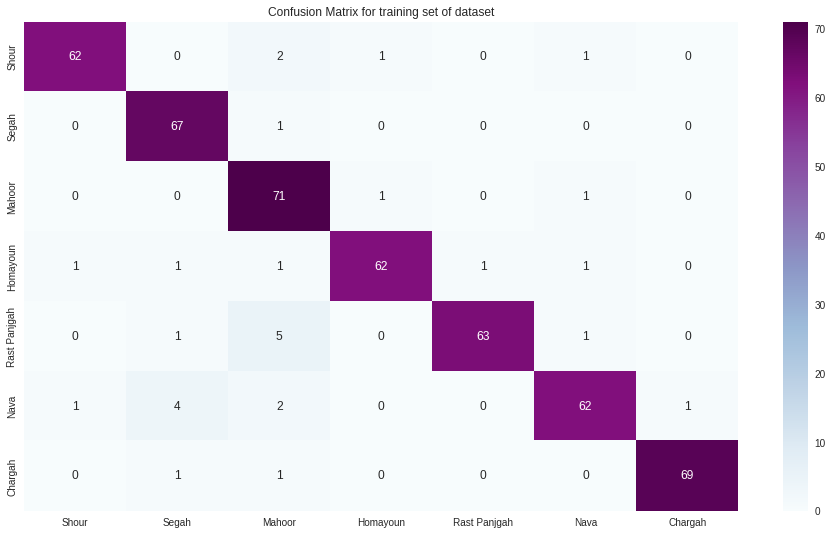

training set accuracy for dataset: 0.9402061855670103
Classification Metrics for training set of dataset
              precision    recall  f1-score   support

           0      0.969     0.939     0.954        66
           1      0.905     0.985     0.944        68
           2      0.855     0.973     0.910        73
           3      0.969     0.925     0.947        67
           4      0.984     0.900     0.940        70
           5      0.939     0.886     0.912        70
           6      0.986     0.972     0.979        71

    accuracy                          0.940       485
   macro avg      0.944     0.940     0.941       485
weighted avg      0.943     0.940     0.940       485



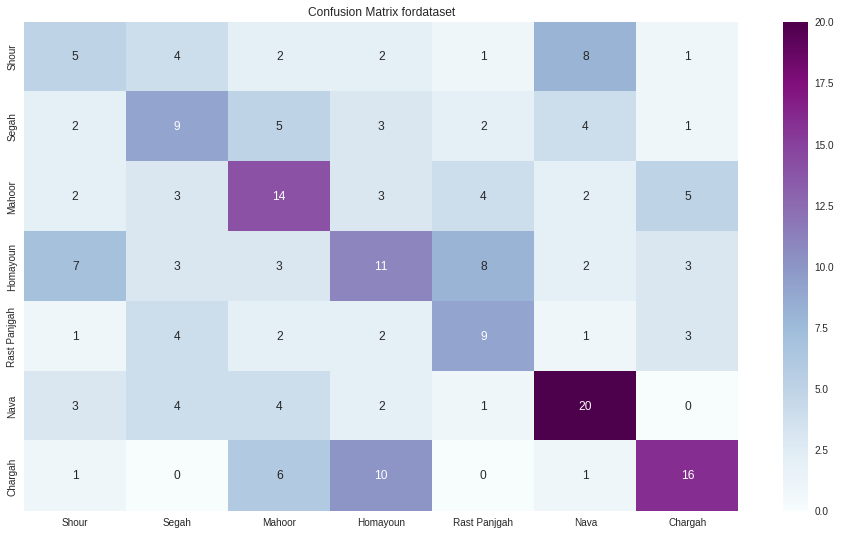

training set accuracy for dataset: 0.4019138755980861
Classification Metrics for testing set of dataset
              precision    recall  f1-score   support

           0      0.238     0.217     0.227        23
           1      0.333     0.346     0.340        26
           2      0.389     0.424     0.406        33
           3      0.333     0.297     0.314        37
           4      0.360     0.409     0.383        22
           5      0.526     0.588     0.556        34
           6      0.552     0.471     0.508        34

    accuracy                          0.402       209
   macro avg      0.390     0.393     0.390       209
weighted avg      0.401     0.402     0.400       209



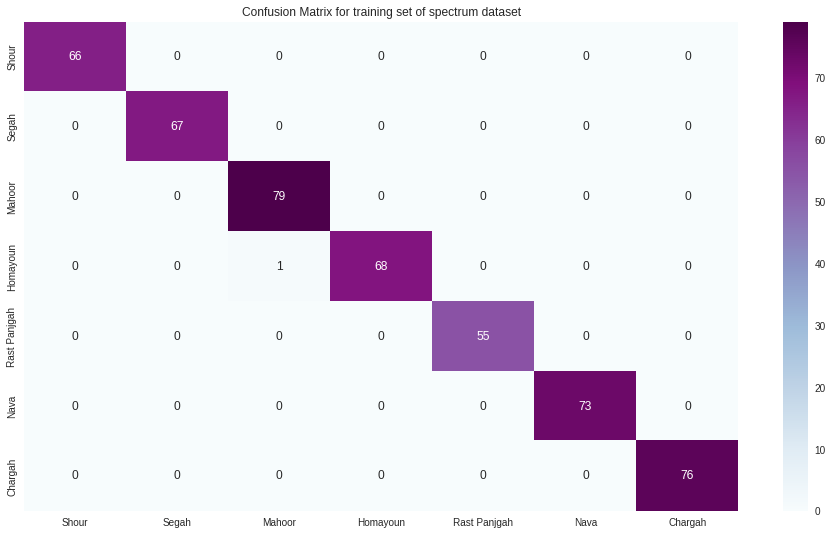

training set accuracy for spectrum dataset: 0.9979381443298969
Classification Metrics for training set of spectrum dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      1.000     1.000     1.000        67
           2      0.988     1.000     0.994        79
           3      1.000     0.986     0.993        69
           4      1.000     1.000     1.000        55
           5      1.000     1.000     1.000        73
           6      1.000     1.000     1.000        76

    accuracy                          0.998       485
   macro avg      0.998     0.998     0.998       485
weighted avg      0.998     0.998     0.998       485



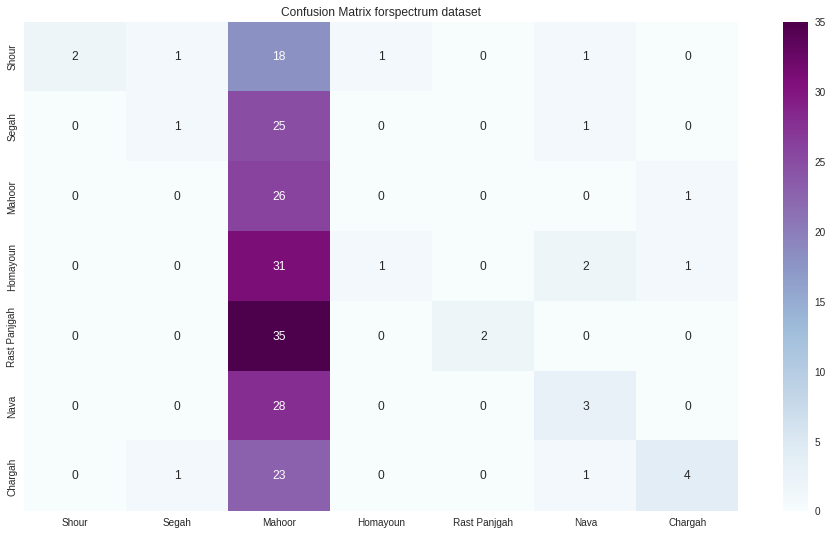

training set accuracy for spectrum dataset: 0.18660287081339713
Classification Metrics for testing set of spectrum dataset
              precision    recall  f1-score   support

           0      1.000     0.087     0.160        23
           1      0.333     0.037     0.067        27
           2      0.140     0.963     0.244        27
           3      0.500     0.029     0.054        35
           4      1.000     0.054     0.103        37
           5      0.375     0.097     0.154        31
           6      0.667     0.138     0.229        29

    accuracy                          0.187       209
   macro avg      0.574     0.201     0.144       209
weighted avg      0.580     0.187     0.140       209



In [246]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('svm RBF for LDA Dataset and spectrum Dataset')
model = svm.SVC(kernel="rbf", gamma=0.7, C=1)
ax1 = ROC_plot(model ,input_PCA_train,  target_PCA_train,input_PCA_test, target_PCA_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model ,input_PCA_spectrum_train,  target_PCA_spectrum_train, input_PCA_spectrum_test,target_PCA_spectrum_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model , input_PCA_train, target_PCA_train, input_PCA_test, target_PCA_test,display_labels = Dastagh_names,labels = 'dataset')
predictProba(model , input_PCA_spectrum_train,  target_PCA_spectrum_train,input_PCA_spectrum_test, target_PCA_spectrum_test,display_labels = Dastagh_names,labels = 'spectrum dataset')

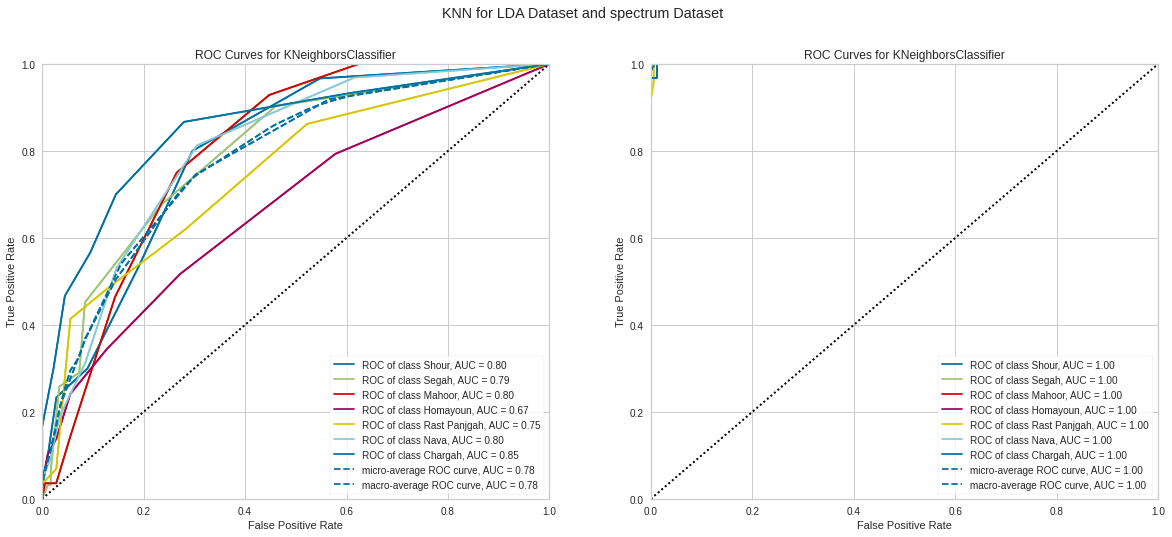

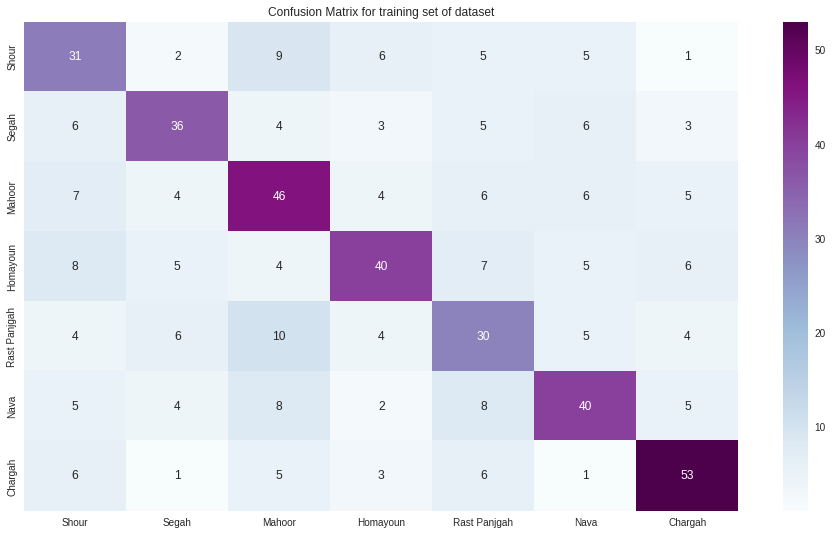

training set accuracy for dataset: 0.5690721649484536
Classification Metrics for training set of dataset
              precision    recall  f1-score   support

           0      0.463     0.525     0.492        59
           1      0.621     0.571     0.595        63
           2      0.535     0.590     0.561        78
           3      0.645     0.533     0.584        75
           4      0.448     0.476     0.462        63
           5      0.588     0.556     0.571        72
           6      0.688     0.707     0.697        75

    accuracy                          0.569       485
   macro avg      0.570     0.565     0.566       485
weighted avg      0.575     0.569     0.570       485



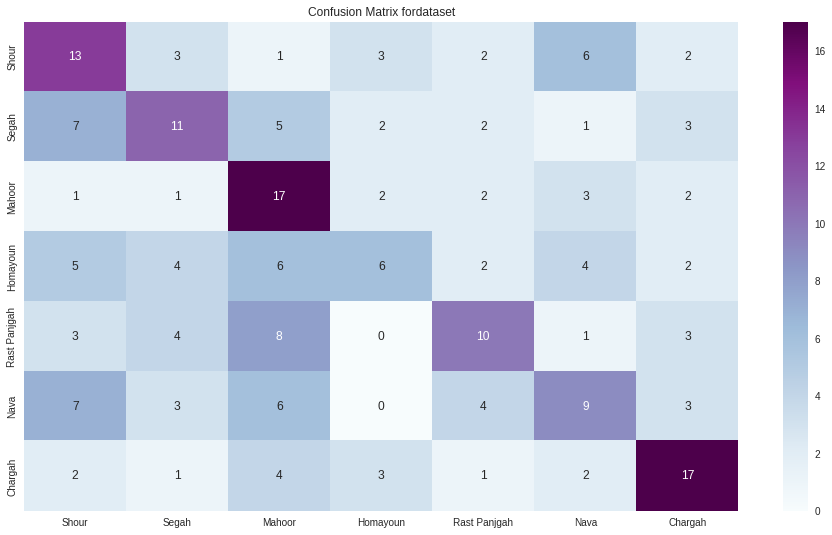

training set accuracy for dataset: 0.39712918660287083
Classification Metrics for testing set of dataset
              precision    recall  f1-score   support

           0      0.342     0.433     0.382        30
           1      0.407     0.355     0.379        31
           2      0.362     0.607     0.453        28
           3      0.375     0.207     0.267        29
           4      0.435     0.345     0.385        29
           5      0.346     0.281     0.310        32
           6      0.531     0.567     0.548        30

    accuracy                          0.397       209
   macro avg      0.400     0.399     0.389       209
weighted avg      0.400     0.397     0.388       209



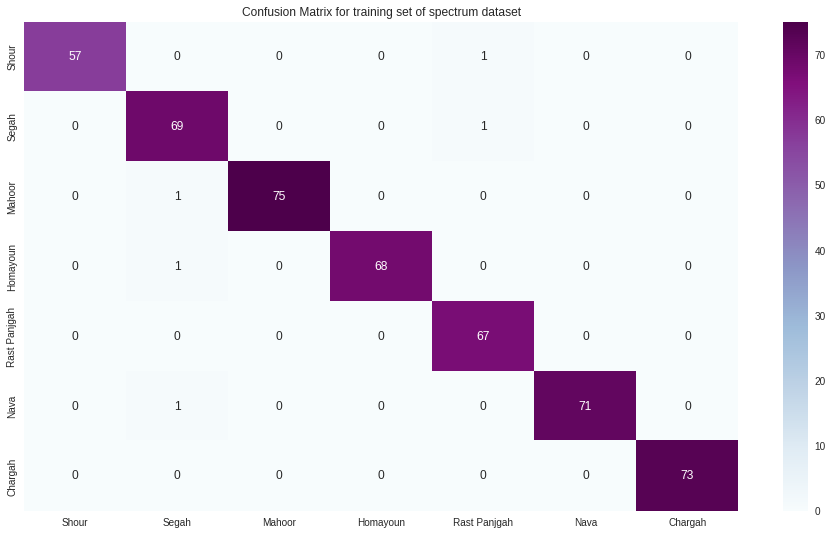

training set accuracy for spectrum dataset: 0.9896907216494846
Classification Metrics for training set of spectrum dataset
              precision    recall  f1-score   support

           0      1.000     0.983     0.991        58
           1      0.958     0.986     0.972        70
           2      1.000     0.987     0.993        76
           3      1.000     0.986     0.993        69
           4      0.971     1.000     0.985        67
           5      1.000     0.986     0.993        72
           6      1.000     1.000     1.000        73

    accuracy                          0.990       485
   macro avg      0.990     0.990     0.990       485
weighted avg      0.990     0.990     0.990       485



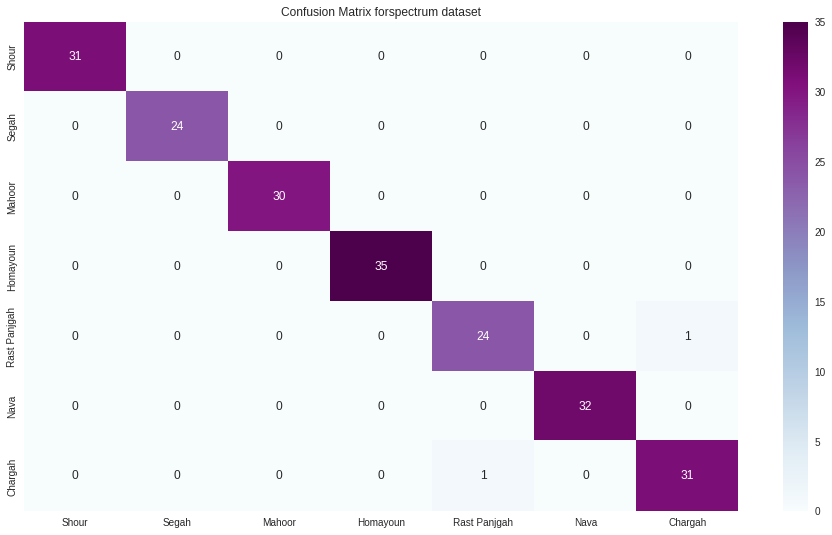

training set accuracy for spectrum dataset: 0.9904306220095693
Classification Metrics for testing set of spectrum dataset
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        31
           1      1.000     1.000     1.000        24
           2      1.000     1.000     1.000        30
           3      1.000     1.000     1.000        35
           4      0.960     0.960     0.960        25
           5      1.000     1.000     1.000        32
           6      0.969     0.969     0.969        32

    accuracy                          0.990       209
   macro avg      0.990     0.990     0.990       209
weighted avg      0.990     0.990     0.990       209



In [248]:
fig, [ax1,ax2] = plt.subplots(1,2 ,figsize  = (20,8))
fig.suptitle('KNN for LDA Dataset and spectrum Dataset')
model = KNeighborsClassifier(n_neighbors=10)
ax1 = ROC_plot(model ,input_LDA_train,  target_LDA_train,input_LDA_test, target_LDA_test,display_labels = Dastagh_names ,ax = ax1)
ax2 = ROC_plot(model ,input_LDA_spectrum_train,  target_LDA_spectrum_train, input_LDA_spectrum_test,target_LDA_spectrum_test,display_labels = Dastagh_names ,ax = ax2)
predictProba(model , input_LDA_train, target_LDA_train, input_LDA_test, target_LDA_test,display_labels = Dastagh_names,labels = 'dataset')
predictProba(model , input_LDA_spectrum_train,  target_LDA_spectrum_train,input_LDA_spectrum_test, target_LDA_spectrum_test,display_labels = Dastagh_names,labels = 'spectrum dataset')